In [ ]:
# imported libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns

In [ ]:
# function to add a column for gender
def map_gender(val):
    responses = str(val).split(",")

    cleaned_responses = []

    for r in responses:
        cleaned_responses.append(r.strip().lower())

    for response in cleaned_responses:
        if "female" in response:
            return "Female"
        elif "male" in response:
            return "Male"
        elif "man" in response:
            return "Male"
        elif "woman" in response:
            return "Female"
        elif "f" in response:
            return "Female"
        elif "women" in response:
            return "Female"


    return "Other"

In [ ]:
def average_list(values):
    total = 0
    for i in range(0, len(values)):
        total += values[i]
    return total / len(values)

In [ ]:
# function to create graphs for male vs female
def lineplot_gender(q, begOverall, endOverall, band_factor=1):

    # --- compute averages & std ---
    avg_beg = np.mean(begOverall)
    avg_end = np.mean(endOverall)
    std_beg = np.std(begOverall, ddof=1)
    std_end = np.std(endOverall, ddof=1)

    # --- x-axis points ---
    x = np.linspace(0, 1, 50)  # span entire axis

    plt.figure(figsize=(6,4))

    # Beginning line + shaded region
    plt.plot(x, [avg_beg]*len(x), color="blue", label="Male")
    plt.fill_between(x,
                     [avg_beg - band_factor*std_beg]*len(x),
                     [avg_beg + band_factor*std_beg]*len(x),
                     alpha=0.2, color="blue")

    # End line + shaded region
    plt.plot(x, [avg_end]*len(x), color="#fc03df", label="Female")
    plt.fill_between(x,
                     [avg_end - band_factor*std_end]*len(x),
                     [avg_end + band_factor*std_end]*len(x),
                     alpha=0.2, color="#fc03df")

    # Formatting
    plt.xticks([])
    plt.ylabel("Mean Score")
    plt.xlabel("Gender")
    plt.title(f"{q}: Male vs Female")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def lineplot_beg_to_end_two(q, maleBeg, maleEnd, femaleBeg, femaleEnd, band_factor=1):
    # --- compute averages ---
    maleAvgBeg = np.mean(maleBeg)
    maleAvgEnd = np.mean(maleEnd)
    femaleAvgBeg = np.mean(femaleBeg)
    femaleAvgEnd = np.mean(femaleEnd)

    # --- compute standard deviations ---
    maleSTDBeg = np.std(maleBeg, ddof=1) if len(maleBeg) > 1 else 0
    maleSTDEnd = np.std(maleEnd, ddof=1) if len(maleEnd) > 1 else 0
    femaleSTDBeg = np.std(femaleBeg, ddof=1) if len(femaleBeg) > 1 else 0
    femaleSTDEnd = np.std(femaleEnd, ddof=1) if len(femaleEnd) > 1 else 0

    # --- dataframe for plotting ---
    dfMale = pd.DataFrame({"x": [0, 1], "y": [maleAvgBeg, maleAvgEnd]})
    sd_overallMale = np.asarray([maleSTDBeg, maleSTDEnd], dtype=float)

    dfFemale = pd.DataFrame({"x": [0, 1], "y": [femaleAvgBeg, femaleAvgEnd]})
    sd_overallFemale = np.asarray([femaleSTDBeg, femaleSTDEnd], dtype=float)

    # --- one combined plot ---
    plt.figure(figsize=(6,4))

    # Male line + band
    sns.lineplot(data=dfMale, x="x", y="y", marker="o", color="blue", label="Male")
    x_o, y_o = dfMale["x"].to_numpy(dtype=float), dfMale["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overallMale, y_o + band_factor*sd_overallMale,
                     alpha=0.2, color="blue")

    # Female line + band
    sns.lineplot(data=dfFemale, x="x", y="y", marker="o", color="#fc03df", label="Female")
    x_o, y_o = dfFemale["x"].to_numpy(dtype=float), dfFemale["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overallFemale, y_o + band_factor*sd_overallFemale,
                     alpha=0.2, color="#fc03df")

    # --- formatting ---
    plt.xticks([0, 1], ["Beginning", "End"])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to use Kruskal-Wallis test
def UTest(data1, data2, *args):
    h_stat, p_value = kruskal(data1, data2, *args)

    print(f"Kruskal-Wallis H-Statistic: {h_stat}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists")

In [ ]:
# function to use Mann whitney test
def UTest(data1, data2):
    u_value, p_value = mannwhitneyu(data1, data2)

    print(f"Mann-Whitney U-Value: {u_value}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists")

In [ ]:
# reads file
data = pd.read_excel('updateDataset.xlsx', header = 1)

In [ ]:
# calls function to create new column for gender
data["Gender"] = data["Q24"].apply(map_gender)

In [ ]:
data.head()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Gender
0,2022-10-05 11:23:26,2022-10-05 11:23:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
1,2022-12-01 17:33:00,2022-12-01 17:36:48,End,Student 1,4.0,NaN,male,5,5.0,5.0,...,3.0,2.0,4.0,4.0,3.0,4.0,3.0,NaN,NaN,Male
2,2022-10-05 11:22:17,2022-10-05 11:25:34,Beginning,Student 1,8.0,NaN,Male,5,5.0,5.0,...,3.0,3.0,3.0,3.0,3.0,5.0,3.0,NaN,NaN,Male
3,2022-12-03 16:03:10,2022-12-03 16:07:19,End,Student 2,9.0,middle eastern,male,5,NaN,NaN,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,NaN,NaN,Male
4,2022-10-05 11:33:24,2022-10-05 11:42:06,Beginning,Student 2,9.0,Middle Eastern,Man,5,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,Male


In [ ]:
# START OF QUESTION 3

In [ ]:
# overall Q3_1 Test Beginning vs End
begQ3_1overallALL = data[data["B/E?"] == "Beginning"]["Q3_1"].dropna()

endQ3_1overallALL = data[data["B/E?"] == "End"]["Q3_1"].dropna()

UTest(begQ3_1overallALL, endQ3_1overallALL)

Mann-Whitney U-Value: 1618.0
P-value: 0.848179361137989
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_1
# mean for Q3_1
Q3_1_result = data.groupby(["Gender", "B/E?"])["Q3_1"].mean()
print("Q3_1 Mean")
print(Q3_1_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()
male_beginning_Q3_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()
other_beginning_Q3_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()

female_end_Q3_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_1"].dropna()
male_end_Q3_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_1"].dropna()
other_end_Q3_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_1"].dropna()

# Q3_1: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_1 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_1, male_beginning_Q3_1, other_beginning_Q3_1)

# Q3_1: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_1 3 Genders in the End:")
kruskalTest(female_end_Q3_1, male_end_Q3_1, other_end_Q3_1)

# Q3_1: U-Test comparing genders in the beginning
print()
print("Q3_1 Genders in the Beginning:")
UTest(female_beginning_Q3_1, male_beginning_Q3_1)

# Q3_1: U-Test comparing genders in the end
print()
print("Q3_1 Genders in the End:")
UTest(female_end_Q3_1, male_end_Q3_1)

# Q3_1 U-Test comparing females in the beginning vs end
print()
print("Q3_1 Females:")
UTest(female_beginning_Q3_1, female_end_Q3_1)

# Q3_1 U-Test comparing males in the beginning vs end
print()
print("Q3_1 Males:")
UTest(male_beginning_Q3_1, male_end_Q3_1)

# Q3_1 U-Test comparing other genders in the beginning vs end
print()
print("Q3_1 Males:")
UTest(other_beginning_Q3_1, other_end_Q3_1)

Q3_1 Mean
Gender  B/E?     
Female  Beginning    3.863636
        End          3.909091
Male    Beginning    3.921053
        End          3.733333
Other   Beginning    2.000000
        End               NaN
Name: Q3_1, dtype: float64 

Q3_1 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.0418599994727997
P-value: 0.21850857950758998
Fail to reject the null hypothesis: No significant differences exists

Q3_1 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q3_1 Genders in the Beginning:
Mann-Whitney U-Value: 386.5
P-value: 0.6157136077912797
Fail to reject the null hypothesis: No significant differences exists

Q3_1 Genders in the End:
Mann-Whitney U-Value: 364.5
P-value: 0.5052133256867815
Fail to reject the null hypothesis: No significant differences exists

Q3_1 Females:
Mann-Whitney U-Value: 222.0
P-value: 0.6253077318119238
Fail to reject the null hypothesis: No significant differenc

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q3_2 Test Beginning vs End
begQ3_2overallALL = data[data["B/E?"] == "Beginning"]["Q3_2"].dropna()

endQ3_2overallALL = data[data["B/E?"] == "End"]["Q3_2"].dropna()

UTest(begQ3_2overallALL, endQ3_2overallALL)

Mann-Whitney U-Value: 1542.0
P-value: 0.6497610910241853
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_2
# mean for Q3_2
Q3_2_result = data.groupby(["Gender", "B/E?"])["Q3_2"].mean()
print("Q3_2 Mean")
print(Q3_2_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()
male_beginning_Q3_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()
other_beginning_Q3_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()

female_end_Q3_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_2"].dropna()
male_end_Q3_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_2"].dropna()
other_end_Q3_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_2"].dropna()

# Q3_2: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_2 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_2, male_beginning_Q3_2, other_beginning_Q3_2)

# Q3_2: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_2 3 Genders in the End:")
kruskalTest(female_end_Q3_2, male_end_Q3_2, other_end_Q3_2)

# Q3_2: U-Test comparing genders in the beginning
print()
print("Q3_2 Genders in the Beginning:")
UTest(female_beginning_Q3_2, male_beginning_Q3_2)

# Q3_2: U-Test comparing genders in the end
print()
print("Q3_2 Genders in the End:")
UTest(female_end_Q3_2, male_end_Q3_2)

# Q3_2 U-Test comparing females in the beginning vs end
print()
print("Q3_2 Females:")
UTest(female_beginning_Q3_2, female_end_Q3_2)

# Q3_2 U-Test comparing males in the beginning vs end
print()
print("Q3_2 Males:")
UTest(male_beginning_Q3_2, male_end_Q3_2)

# Q3_2 U-Test comparing other genders in the beginning vs end
print()
print("Q3_2 Males:")
UTest(other_beginning_Q3_2, other_end_Q3_2)

Q3_2 Mean
Gender  B/E?     
Female  Beginning    4.272727
        End          4.227273
Male    Beginning    4.210526
        End          4.266667
Other   Beginning    2.000000
        End          5.000000
Name: Q3_2, dtype: float64 

Q3_2 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.1779793805319585
P-value: 0.20413174387588554
Fail to reject the null hypothesis: No significant differences exists

Q3_2 3 Genders in the End:
Kruskal-Wallis H-Statistic: 0.8908890371126272
P-value: 0.6405394810533023
Fail to reject the null hypothesis: No significant differences exists

Q3_2 Genders in the Beginning:
Mann-Whitney U-Value: 426.0
P-value: 0.900777312670608
Fail to reject the null hypothesis: No significant differences exists

Q3_2 Genders in the End:
Mann-Whitney U-Value: 321.0
P-value: 0.8641199936094976
Fail to reject the null hypothesis: No significant differences exists

Q3_2 Females:
Mann-Whitney U-Value: 245.0
P-value: 0.9493741871549931
Fail to reject the null hypothe

In [ ]:
# overall Q3_3 Test Beginning vs End
begQ3_3overallALL = data[data["B/E?"] == "Beginning"]["Q3_3"].dropna()

endQ3_3overallALL = data[data["B/E?"] == "End"]["Q3_3"].dropna()

UTest(begQ3_3overallALL, endQ3_3overallALL)

Mann-Whitney U-Value: 1688.0
P-value: 0.6669594239146501
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_3
# mean for Q3_3
Q3_3_result = data.groupby(["Gender", "B/E?"])["Q3_3"].mean()
print("Q3_3 Mean")
print(Q3_3_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()
male_beginning_Q3_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()
other_beginning_Q3_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()

female_end_Q3_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_3"].dropna()
male_end_Q3_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_3"].dropna()
other_end_Q3_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_3"].dropna()

# Q3_3: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_3 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_3, male_beginning_Q3_3, other_beginning_Q3_3)

# Q3_3: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_3 3 Genders in the End:")
kruskalTest(female_end_Q3_3, male_end_Q3_3, other_end_Q3_3)

# Q3_3: U-Test comparing genders in the beginning
print()
print("Q3_3 Genders in the Beginning:")
UTest(female_beginning_Q3_3, male_beginning_Q3_3)

# Q3_3: U-Test comparing genders in the end
print()
print("Q3_3 Genders in the End:")
UTest(female_end_Q3_3, male_end_Q3_3)

# Q3_3 U-Test comparing females in the beginning vs end
print()
print("Q3_3 Females:")
UTest(female_beginning_Q3_3, female_end_Q3_3)

# Q3_3 U-Test comparing males in the beginning vs end
print()
print("Q3_3 Males:")
UTest(male_beginning_Q3_3, male_end_Q3_3)

# Q3_3 U-Test comparing other genders in the beginning vs end
print()
print("Q3_3 Males:")
UTest(other_beginning_Q3_3, other_end_Q3_3)

Q3_3 Mean
Gender  B/E?     
Female  Beginning    4.318182
        End          4.136364
Male    Beginning    4.000000
        End          4.033333
Other   Beginning    4.000000
        End          5.000000
Name: Q3_3, dtype: float64 

Q3_3 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.031312015338313
P-value: 0.36216476902137973
Fail to reject the null hypothesis: No significant differences exists

Q3_3 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.3650977101529735
P-value: 0.5053273433352041
Fail to reject the null hypothesis: No significant differences exists

Q3_3 Genders in the Beginning:
Mann-Whitney U-Value: 500.5
P-value: 0.17553371065529233
Fail to reject the null hypothesis: No significant differences exists

Q3_3 Genders in the End:
Mann-Whitney U-Value: 348.5
P-value: 0.723640179476376
Fail to reject the null hypothesis: No significant differences exists

Q3_3 Females:
Mann-Whitney U-Value: 276.0
P-value: 0.39575500238066696
Fail to reject the null hypoth

In [ ]:
# overall Q3_4 Test Beginning vs End
begQ3_4overallALL = data[data["B/E?"] == "Beginning"]["Q3_4"].dropna()

endQ3_4overallALL = data[data["B/E?"] == "End"]["Q3_4"].dropna()

UTest(begQ3_4overallALL, endQ3_4overallALL)

Mann-Whitney U-Value: 1494.0
P-value: 0.4626911769477504
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_4
# mean for Q3_4
Q3_4_result = data.groupby(["Gender", "B/E?"])["Q3_4"].mean()
print("Q3_4 Mean")
print(Q3_4_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()
male_beginning_Q3_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()
other_beginning_Q3_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()

female_end_Q3_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_4"].dropna()
male_end_Q3_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_4"].dropna()
other_end_Q3_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_4"].dropna()

# Q3_4: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_4 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_4, male_beginning_Q3_4, other_beginning_Q3_4)

# Q3_4: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_4 3 Genders in the End:")
kruskalTest(female_end_Q3_4, male_end_Q3_4, other_end_Q3_4)

# Q3_4: U-Test comparing genders in the beginning
print()
print("Q3_4 Genders in the Beginning:")
UTest(female_beginning_Q3_4, male_beginning_Q3_4)

# Q3_4: U-Test comparing genders in the end
print()
print("Q3_4 Genders in the End:")
UTest(female_end_Q3_4, male_end_Q3_4)

# Q3_4 U-Test comparing females in the beginning vs end
print()
print("Q3_4 Females:")
UTest(female_beginning_Q3_4, female_end_Q3_4)

# Q3_4 U-Test comparing males in the beginning vs end
print()
print("Q3_4 Males:")
UTest(male_beginning_Q3_4, male_end_Q3_4)

# Q3_4 U-Test comparing other genders in the beginning vs end
print()
print("Q3_4 Males:")
UTest(other_beginning_Q3_4, other_end_Q3_4)

Q3_4 Mean
Gender  B/E?     
Female  Beginning    4.227273
        End          4.090909
Male    Beginning    3.894737
        End          4.166667
Other   Beginning    1.000000
        End          5.000000
Name: Q3_4, dtype: float64 

Q3_4 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 4.358326950286339
P-value: 0.11313613225346851
Fail to reject the null hypothesis: No significant differences exists

Q3_4 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.3491108934049012
P-value: 0.5093828180924445
Fail to reject the null hypothesis: No significant differences exists

Q3_4 Genders in the Beginning:
Mann-Whitney U-Value: 488.0
P-value: 0.26017202769154923
Fail to reject the null hypothesis: No significant differences exists

Q3_4 Genders in the End:
Mann-Whitney U-Value: 313.5
P-value: 0.7516714603604615
Fail to reject the null hypothesis: No significant differences exists

Q3_4 Females:
Mann-Whitney U-Value: 262.5
P-value: 0.6155306430161886
Fail to reject the null hypoth

In [ ]:
# overall Q3_5 Test Beginning vs End
begQ3_5overallALL = data[data["B/E?"] == "Beginning"]["Q3_5"].dropna()

endQ3_5overallALL = data[data["B/E?"] == "End"]["Q3_5"].dropna()

UTest(begQ3_5overallALL, endQ3_5overallALL)

Mann-Whitney U-Value: 1470.0
P-value: 0.3705600799719846
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_5
# mean for Q3_5
Q3_5_result = data.groupby(["Gender", "B/E?"])["Q3_5"].mean()
print("Q3_5 Mean")
print(Q3_5_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()
male_beginning_Q3_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()
other_beginning_Q3_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()

female_end_Q3_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_5"].dropna()
male_end_Q3_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_5"].dropna()
other_end_Q3_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_5"].dropna()

# Q3_5: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_5 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_5, male_beginning_Q3_5, other_beginning_Q3_5)

# Q3_5: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_5 3 Genders in the End:")
kruskalTest(female_end_Q3_5, male_end_Q3_5, other_end_Q3_5)

# Q3_5: U-Test comparing genders in the beginning
print()
print("Q3_5 Genders in the Beginning:")
UTest(female_beginning_Q3_5, male_beginning_Q3_5)

# Q3_5: U-Test comparing genders in the end
print()
print("Q3_5 Genders in the End:")
UTest(female_end_Q3_5, male_end_Q3_5)

# Q3_5 U-Test comparing females in the beginning vs end
print()
print("Q3_5 Females:")
UTest(female_beginning_Q3_5, female_end_Q3_5)

# Q3_5 U-Test comparing males in the beginning vs end
print()
print("Q3_5 Males:")
UTest(male_beginning_Q3_5, male_end_Q3_5)

# Q3_5 U-Test comparing other genders in the beginning vs end
print()
print("Q3_5 Males:")
UTest(other_beginning_Q3_5, other_end_Q3_5)

Q3_5 Mean
Gender  B/E?     
Female  Beginning    4.136364
        End          4.363636
Male    Beginning    4.078947
        End          4.166667
Other   Beginning    4.000000
        End          4.000000
Name: Q3_5, dtype: float64 

Q3_5 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.16343176183537675
P-value: 0.9215337468275536
Fail to reject the null hypothesis: No significant differences exists

Q3_5 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.261379688356429
P-value: 0.5322245223506945
Fail to reject the null hypothesis: No significant differences exists

Q3_5 Genders in the Beginning:
Mann-Whitney U-Value: 435.5
P-value: 0.777006620752818
Fail to reject the null hypothesis: No significant differences exists

Q3_5 Genders in the End:
Mann-Whitney U-Value: 381.0
P-value: 0.3125686293665133
Fail to reject the null hypothesis: No significant differences exists

Q3_5 Females:
Mann-Whitney U-Value: 204.0
P-value: 0.34095886288014754
Fail to reject the null hypothe

In [ ]:
# overall Q3_6 Test Beginning vs End
begQ3_6overallALL = data[data["B/E?"] == "Beginning"]["Q3_6"].dropna()

endQ3_6overallALL = data[data["B/E?"] == "End"]["Q3_6"].dropna()

UTest(begQ3_6overallALL, endQ3_6overallALL)

Mann-Whitney U-Value: 1715.0
P-value: 0.4226967120338836
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_6
# mean for Q3_6
Q3_6_result = data.groupby(["Gender", "B/E?"])["Q3_6"].mean()
print("Q3_6 Mean")
print(Q3_6_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()
male_beginning_Q3_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()
other_beginning_Q3_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()

female_end_Q3_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_6"].dropna()
male_end_Q3_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_6"].dropna()
other_end_Q3_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_6"].dropna()

# Q3_6: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_6 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_6, male_beginning_Q3_6, other_beginning_Q3_6)

# Q3_6: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_6 3 Genders in the End:")
kruskalTest(female_end_Q3_6, male_end_Q3_6, other_end_Q3_6)

# Q3_6: U-Test comparing genders in the beginning
print()
print("Q3_6 Genders in the Beginning:")
UTest(female_beginning_Q3_6, male_beginning_Q3_6)

# Q3_6: U-Test comparing genders in the end
print()
print("Q3_6 Genders in the End:")
UTest(female_end_Q3_6, male_end_Q3_6)

# Q3_6 U-Test comparing females in the beginning vs end
print()
print("Q3_6 Females:")
UTest(female_beginning_Q3_6, female_end_Q3_6)

# Q3_6 U-Test comparing males in the beginning vs end
print()
print("Q3_6 Males:")
UTest(male_beginning_Q3_6, male_end_Q3_6)

# Q3_6 U-Test comparing other genders in the beginning vs end
print()
print("Q3_6 Males:")
UTest(other_beginning_Q3_6, other_end_Q3_6)

Q3_6 Mean
Gender  B/E?     
Female  Beginning    4.272727
        End          4.095238
Male    Beginning    4.210526
        End          4.066667
Other   Beginning    4.000000
        End          5.000000
Name: Q3_6, dtype: float64 

Q3_6 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.3857252230634448
P-value: 0.8245952562363064
Fail to reject the null hypothesis: No significant differences exists

Q3_6 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.2040142699046528
P-value: 0.5477112018064725
Fail to reject the null hypothesis: No significant differences exists

Q3_6 Genders in the Beginning:
Mann-Whitney U-Value: 431.5
P-value: 0.8227069491043054
Fail to reject the null hypothesis: No significant differences exists

Q3_6 Genders in the End:
Mann-Whitney U-Value: 313.0
P-value: 0.9757221600931747
Fail to reject the null hypothesis: No significant differences exists

Q3_6 Females:
Mann-Whitney U-Value: 260.5
P-value: 0.44764392443716783
Fail to reject the null hypoth

In [ ]:
# overall Q3_7 Test Beginning vs End
begQ3_7overallALL = data[data["B/E?"] == "Beginning"]["Q3_7"].dropna()

endQ3_7overallALL = data[data["B/E?"] == "End"]["Q3_7"].dropna()

UTest(begQ3_7overallALL, endQ3_7overallALL)

Mann-Whitney U-Value: 1819.0
P-value: 0.2185818798442669
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_7
# mean for Q3_7
Q3_7_result = data.groupby(["Gender", "B/E?"])["Q3_7"].mean()
print("Q3_7 Mean")
print(Q3_7_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()
male_beginning_Q3_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()
other_beginning_Q3_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()

female_end_Q3_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_7"].dropna()
male_end_Q3_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_7"].dropna()
other_end_Q3_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_7"].dropna()

# Q3_7: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_7 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_7, male_beginning_Q3_7, other_beginning_Q3_7)

# Q3_7: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_7 3 Genders in the End:")
kruskalTest(female_end_Q3_7, male_end_Q3_7, other_end_Q3_7)

# Q3_7: U-Test comparing genders in the beginning
print()
print("Q3_7 Genders in the Beginning:")
UTest(female_beginning_Q3_7, male_beginning_Q3_7)

# Q3_7: U-Test comparing genders in the end
print()
print("Q3_7 Genders in the End:")
UTest(female_end_Q3_7, male_end_Q3_7)

# Q3_7 U-Test comparing females in the beginning vs end
print()
print("Q3_7 Females:")
UTest(female_beginning_Q3_7, female_end_Q3_7)

# Q3_7 U-Test comparing males in the beginning vs end
print()
print("Q3_7 Males:")
UTest(male_beginning_Q3_7, male_end_Q3_7)

# Q3_7 U-Test comparing other genders in the beginning vs end
print()
print("Q3_7 Males:")
UTest(other_beginning_Q3_7, other_end_Q3_7)

Q3_7 Mean
Gender  B/E?     
Female  Beginning    4.363636
        End          4.136364
Male    Beginning    4.157895
        End          4.033333
Other   Beginning    3.000000
        End          5.000000
Name: Q3_7, dtype: float64 

Q3_7 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.8666259554279008
P-value: 0.23851740897448112
Fail to reject the null hypothesis: No significant differences exists

Q3_7 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.6015988764651858
P-value: 0.4489698969094451
Fail to reject the null hypothesis: No significant differences exists

Q3_7 Genders in the Beginning:
Mann-Whitney U-Value: 468.0
P-value: 0.4077362494266754
Fail to reject the null hypothesis: No significant differences exists

Q3_7 Genders in the End:
Mann-Whitney U-Value: 353.0
P-value: 0.6573099995193875
Fail to reject the null hypothesis: No significant differences exists

Q3_7 Females:
Mann-Whitney U-Value: 287.5
P-value: 0.2531520170696736
Fail to reject the null hypoth

In [ ]:
# overall Q3_8 Test Beginning vs End
begQ3_8overallALL = data[data["B/E?"] == "Beginning"]["Q3_8"].dropna()

endQ3_8overallALL = data[data["B/E?"] == "End"]["Q3_8"].dropna()

UTest(begQ3_8overallALL, endQ3_8overallALL)

Mann-Whitney U-Value: 1892.0
P-value: 0.05581002678190413
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_8
# mean for Q3_8
Q3_8_result = data.groupby(["Gender", "B/E?"])["Q3_8"].mean()
print("Q3_8 Mean")
print(Q3_8_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()
male_beginning_Q3_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()
other_beginning_Q3_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()

female_end_Q3_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_8"].dropna()
male_end_Q3_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_8"].dropna()
other_end_Q3_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_8"].dropna()

# Q3_8: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_8 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_8, male_beginning_Q3_8, other_beginning_Q3_8)

# Q3_8: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_8 3 Genders in the End:")
kruskalTest(female_end_Q3_8, male_end_Q3_8, other_end_Q3_8)

# Q3_8: U-Test comparing genders in the beginning
print()
print("Q3_8 Genders in the Beginning:")
UTest(female_beginning_Q3_8, male_beginning_Q3_8)

# Q3_8: U-Test comparing genders in the end
print()
print("Q3_8 Genders in the End:")
UTest(female_end_Q3_8, male_end_Q3_8)

# Q3_8 U-Test comparing females in the beginning vs end
print()
print("Q3_8 Females:")
UTest(female_beginning_Q3_8, female_end_Q3_8)

# Q3_8 U-Test comparing males in the beginning vs end
print()
print("Q3_8 Males:")
UTest(male_beginning_Q3_8, male_end_Q3_8)

# Q3_8 U-Test comparing other genders in the beginning vs end
print()
print("Q3_8 Males:")
UTest(other_beginning_Q3_8, other_end_Q3_8)

Q3_8 Mean
Gender  B/E?     
Female  Beginning    4.454545
        End          4.047619
Male    Beginning    4.236842
        End          4.033333
Other   Beginning    4.000000
        End          5.000000
Name: Q3_8, dtype: float64 

Q3_8 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.4337584297178159
P-value: 0.4882736779485337
Fail to reject the null hypothesis: No significant differences exists

Q3_8 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.5527886092402161
P-value: 0.4600618672042971
Fail to reject the null hypothesis: No significant differences exists

Q3_8 Genders in the Beginning:
Mann-Whitney U-Value: 475.0
P-value: 0.33474879750537945
Fail to reject the null hypothesis: No significant differences exists

Q3_8 Genders in the End:
Mann-Whitney U-Value: 312.5
P-value: 0.9673804838085671
Fail to reject the null hypothesis: No significant differences exists

Q3_8 Females:
Mann-Whitney U-Value: 301.0
P-value: 0.06692882477220963
Fail to reject the null hypot

In [ ]:
# overall Q3_9 Test Beginning vs End
begQ3_9overallALL = data[data["B/E?"] == "Beginning"]["Q3_9"].dropna()

endQ3_9overallALL = data[data["B/E?"] == "End"]["Q3_9"].dropna()

UTest(begQ3_9overallALL, endQ3_9overallALL)

Mann-Whitney U-Value: 1618.0
P-value: 0.9952124723459694
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_9
# mean for Q3_9
Q3_9_result = data.groupby(["Gender", "B/E?"])["Q3_9"].mean()
print("Q3_9 Mean")
print(Q3_9_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()
male_beginning_Q3_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()
other_beginning_Q3_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()

female_end_Q3_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_9"].dropna()
male_end_Q3_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_9"].dropna()
other_end_Q3_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_9"].dropna()

# Q3_9: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_9 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_9, male_beginning_Q3_9, other_beginning_Q3_9)

# Q3_9: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_9 3 Genders in the End:")
kruskalTest(female_end_Q3_9, male_end_Q3_9, other_end_Q3_9)

# Q3_9: U-Test comparing genders in the beginning
print()
print("Q3_9 Genders in the Beginning:")
UTest(female_beginning_Q3_9, male_beginning_Q3_9)

# Q3_9: U-Test comparing genders in the end
print()
print("Q3_9 Genders in the End:")
UTest(female_end_Q3_9, male_end_Q3_9)

# Q3_9 U-Test comparing females in the beginning vs end
print()
print("Q3_9 Females:")
UTest(female_beginning_Q3_9, female_end_Q3_9)

# Q3_9 U-Test comparing males in the beginning vs end
print()
print("Q3_9 Males:")
UTest(male_beginning_Q3_9, male_end_Q3_9)

# Q3_9 U-Test comparing other genders in the beginning vs end
print()
print("Q3_9 Males:")
UTest(other_beginning_Q3_9, other_end_Q3_9)

Q3_9 Mean
Gender  B/E?     
Female  Beginning    3.909091
        End          3.863636
Male    Beginning    3.973684
        End          3.866667
Other   Beginning    2.000000
        End          5.000000
Name: Q3_9, dtype: float64 

Q3_9 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.353518791689269
P-value: 0.18697891998314192
Fail to reject the null hypothesis: No significant differences exists

Q3_9 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.7581950657060956
P-value: 0.41515740859265327
Fail to reject the null hypothesis: No significant differences exists

Q3_9 Genders in the Beginning:
Mann-Whitney U-Value: 398.0
P-value: 0.7508399925577968
Fail to reject the null hypothesis: No significant differences exists

Q3_9 Genders in the End:
Mann-Whitney U-Value: 339.5
P-value: 0.8601175695063619
Fail to reject the null hypothesis: No significant differences exists

Q3_9 Females:
Mann-Whitney U-Value: 239.0
P-value: 0.9503327237678858
Fail to reject the null hypoth

In [ ]:
# overall Q3_10 Test Beginning vs End
begQ3_10overallALL = data[data["B/E?"] == "Beginning"]["Q3_10"].dropna()

endQ3_10overallALL = data[data["B/E?"] == "End"]["Q3_10"].dropna()

UTest(begQ3_10overallALL, endQ3_10overallALL)

Mann-Whitney U-Value: 1561.0
P-value: 0.7361579149875177
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_10
# mean for Q3_10
Q3_10_result = data.groupby(["Gender", "B/E?"])["Q3_10"].mean()
print("Q3_10 Mean")
print(Q3_10_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()
male_beginning_Q3_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()
other_beginning_Q3_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()

female_end_Q3_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_10"].dropna()
male_end_Q3_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_10"].dropna()
other_end_Q3_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_10"].dropna()

# Q3_10: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_10 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_10, male_beginning_Q3_10, other_beginning_Q3_10)

# Q3_10: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_10 3 Genders in the End:")
kruskalTest(female_end_Q3_10, male_end_Q3_10, other_end_Q3_10)

# Q3_10: U-Test comparing genders in the beginning
print()
print("Q3_10 Genders in the Beginning:")
UTest(female_beginning_Q3_10, male_beginning_Q3_10)

# Q3_10: U-Test comparing genders in the end
print()
print("Q3_10 Genders in the End:")
UTest(female_end_Q3_10, male_end_Q3_10)

# Q3_10 U-Test comparing females in the beginning vs end
print()
print("Q3_10 Females:")
UTest(female_beginning_Q3_10, female_end_Q3_10)

# Q3_10 U-Test comparing males in the beginning vs end
print()
print("Q3_10 Males:")
UTest(male_beginning_Q3_10, male_end_Q3_10)

# Q3_10 U-Test comparing other genders in the beginning vs end
print()
print("Q3_10 Males:")
UTest(other_beginning_Q3_10, other_end_Q3_10)

Q3_10 Mean
Gender  B/E?     
Female  Beginning    4.181818
        End          4.227273
Male    Beginning    4.184211
        End          4.266667
Other   Beginning    2.000000
        End          5.000000
Name: Q3_10, dtype: float64 

Q3_10 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.086261592614172
P-value: 0.21371096744020815
Fail to reject the null hypothesis: No significant differences exists

Q3_10 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.2359097787915334
P-value: 0.5390457192059979
Fail to reject the null hypothesis: No significant differences exists

Q3_10 Genders in the Beginning:
Mann-Whitney U-Value: 400.0
P-value: 0.7728505553031368
Fail to reject the null hypothesis: No significant differences exists

Q3_10 Genders in the End:
Mann-Whitney U-Value: 323.0
P-value: 0.8957560577297558
Fail to reject the null hypothesis: No significant differences exists

Q3_10 Females:
Mann-Whitney U-Value: 235.5
P-value: 0.8796902473826069
Fail to reject the null 

In [ ]:
# overall Q6_11 Test Beginning vs End
begQ6_11overallALL = data[data["B/E?"] == "Beginning"]["Q6_11"].dropna()

endQ6_11overallALL = data[data["B/E?"] == "End"]["Q6_11"].dropna()

UTest(begQ6_11overallALL, endQ6_11overallALL)

Mann-Whitney U-Value: 1290.5
P-value: 0.16920524871990728
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_11
# mean for Q3_11
Q3_11_result = data.groupby(["Gender", "B/E?"])["Q3_11"].mean()
print("Q3_11 Mean")
print(Q3_11_result, "\n")

# creates dataframes for all genders
female_beginning_Q3_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()
male_beginning_Q3_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()
other_beginning_Q3_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()

female_end_Q3_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_11"].dropna()
male_end_Q3_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_11"].dropna()
other_end_Q3_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q3_11"].dropna()

# Q3_11: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q3_11 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q3_11, male_beginning_Q3_11, other_beginning_Q3_11)

# Q3_11: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q3_11 3 Genders in the End:")
kruskalTest(female_end_Q3_11, male_end_Q3_11, other_end_Q3_11)

# Q3_11: U-Test comparing genders in the beginning
print()
print("Q3_11 Genders in the Beginning:")
UTest(female_beginning_Q3_11, male_beginning_Q3_11)

# Q3_11: U-Test comparing genders in the end
print()
print("Q3_11 Genders in the End:")
UTest(female_end_Q3_11, male_end_Q3_11)

# Q3_11 U-Test comparing females in the beginning vs end
print()
print("Q3_11 Females:")
UTest(female_beginning_Q3_11, female_end_Q3_11)

# Q3_11 U-Test comparing males in the beginning vs end
print()
print("Q3_11 Males:")
UTest(male_beginning_Q3_11, male_end_Q3_11)

# Q3_11 U-Test comparing other genders in the beginning vs end
print()
print("Q3_11 Males:")
UTest(other_beginning_Q3_11, other_end_Q3_11)

Q3_11 Mean
Gender  B/E?     
Female  Beginning    4.136364
        End          3.863636
Male    Beginning    3.921053
        End          4.033333
Other   Beginning    2.000000
        End          5.000000
Name: Q3_11, dtype: float64 

Q3_11 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.715186794240421
P-value: 0.1560477237379006
Fail to reject the null hypothesis: No significant differences exists

Q3_11 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.6193228044986954
P-value: 0.4450087196675432
Fail to reject the null hypothesis: No significant differences exists

Q3_11 Genders in the Beginning:
Mann-Whitney U-Value: 473.0
P-value: 0.3609307295857441
Fail to reject the null hypothesis: No significant differences exists

Q3_11 Genders in the End:
Mann-Whitney U-Value: 304.5
P-value: 0.6254667625093902
Fail to reject the null hypothesis: No significant differences exists

Q3_11 Females:
Mann-Whitney U-Value: 277.5
P-value: 0.3842198522592861
Fail to reject the null h

In [ ]:
# START OF QUESTION 6

In [ ]:
# overall Q6_1 Test Beginning vs End
begQ6_1overallALL = data[data["B/E?"] == "Beginning"]["Q6_1"].dropna()

endQ6_1overallALL = data[data["B/E?"] == "End"]["Q6_1"].dropna()

UTest(begQ6_1overallALL, endQ6_1overallALL)

Mann-Whitney U-Value: 1307.5
P-value: 0.2058447900351641
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_1
# mean for Q6_1
Q6_1_result = data.groupby(["Gender", "B/E?"])["Q6_1"].mean()
print("Q6_1 Mean")
print(Q6_1_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()
male_beginning_Q6_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()
other_beginning_Q6_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()

female_end_Q6_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_1"].dropna()
male_end_Q6_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_1"].dropna()
other_end_Q6_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_1"].dropna()

# Q6_1: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_1 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_1, male_beginning_Q6_1, other_beginning_Q6_1)

# Q6_1: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_1 3 Genders in the End:")
kruskalTest(female_end_Q6_1, male_end_Q6_1, other_end_Q6_1)

# Q6_1: U-Test comparing genders in the beginning
print()
print("Q6_1 Genders in the Beginning:")
UTest(female_beginning_Q6_1, male_beginning_Q6_1)

# Q6_1: U-Test comparing genders in the end
print()
print("Q6_1 Genders in the End:")
UTest(female_end_Q6_1, male_end_Q6_1)

# Q6_1 U-Test comparing females in the beginning vs end
print()
print("Q6_1 Females:")
UTest(female_beginning_Q6_1, female_end_Q6_1)

# Q6_1 U-Test comparing males in the beginning vs end
print()
print("Q6_1 Males:")
UTest(male_beginning_Q6_1, male_end_Q6_1)

# Q6_1 U-Test comparing other genders in the beginning vs end
print()
print("Q6_1 Males:")
UTest(other_beginning_Q6_1, other_end_Q6_1)

Q6_1 Mean
Gender  B/E?     
Female  Beginning    2.900000
        End          3.185185
Male    Beginning    3.166667
        End          3.300000
Other   Beginning    1.000000
        End          5.000000
Name: Q6_1, dtype: float64 

Q6_1 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 5.689483833718229
P-value: 0.058149272150213205
Fail to reject the null hypothesis: No significant differences exists

Q6_1 3 Genders in the End:
Kruskal-Wallis H-Statistic: 2.869789072770079
P-value: 0.23814047784602804
Fail to reject the null hypothesis: No significant differences exists

Q6_1 Genders in the Beginning:
Mann-Whitney U-Value: 251.5
P-value: 0.3209100093121585
Fail to reject the null hypothesis: No significant differences exists

Q6_1 Genders in the End:
Mann-Whitney U-Value: 374.0
P-value: 0.5978679068469037
Fail to reject the null hypothesis: No significant differences exists

Q6_1 Females:
Mann-Whitney U-Value: 227.5
P-value: 0.34071948342608716
Fail to reject the null hypot

In [ ]:
# overall Q6_2 Test Beginning vs End
begQ6_2overallALL = data[data["B/E?"] == "Beginning"]["Q6_2"].dropna()

endQ6_2overallALL = data[data["B/E?"] == "End"]["Q6_2"].dropna()

UTest(begQ6_2overallALL, endQ6_2overallALL)

Mann-Whitney U-Value: 1350.0
P-value: 0.31581935816222173
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_2
# mean for Q6_2
Q6_2_result = data.groupby(["Gender", "B/E?"])["Q6_2"].mean()
print("Q6_2 Mean")
print(Q6_2_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()
male_beginning_Q6_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()
other_beginning_Q6_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()

female_end_Q6_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_2"].dropna()
male_end_Q6_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_2"].dropna()
other_end_Q6_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_2"].dropna()

# Q6_2: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_2 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_2, male_beginning_Q6_2, other_beginning_Q6_2)

# Q6_2: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_2 3 Genders in the End:")
kruskalTest(female_end_Q6_2, male_end_Q6_2, other_end_Q6_2)

# Q6_2: U-Test comparing genders in the beginning
print()
print("Q6_2 Genders in the Beginning:")
UTest(female_beginning_Q6_2, male_beginning_Q6_2)

# Q6_2: U-Test comparing genders in the end
print()
print("Q6_2 Genders in the End:")
UTest(female_end_Q6_2, male_end_Q6_2)

# Q6_2 U-Test comparing females in the beginning vs end
print()
print("Q6_2 Females:")
UTest(female_beginning_Q6_2, female_end_Q6_2)

# Q6_2 U-Test comparing males in the beginning vs end
print()
print("Q6_2 Males:")
UTest(male_beginning_Q6_2, male_end_Q6_2)

# Q6_2 U-Test comparing other genders in the beginning vs end
print()
print("Q6_2 Males:")
UTest(other_beginning_Q6_2, other_end_Q6_2)

Q6_2 Mean
Gender  B/E?     
Female  Beginning    4.100000
        End          4.259259
Male    Beginning    4.000000
        End          4.066667
Other   Beginning    3.000000
        End          5.000000
Name: Q6_2, dtype: float64 

Q6_2 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.047931873479292
P-value: 0.21784620719459594
Fail to reject the null hypothesis: No significant differences exists

Q6_2 3 Genders in the End:
Kruskal-Wallis H-Statistic: 2.0340066622462296
P-value: 0.36167714450162064
Fail to reject the null hypothesis: No significant differences exists

Q6_2 Genders in the Beginning:
Mann-Whitney U-Value: 317.0
P-value: 0.7294331235893008
Fail to reject the null hypothesis: No significant differences exists

Q6_2 Genders in the End:
Mann-Whitney U-Value: 454.5
P-value: 0.40012603084305853
Fail to reject the null hypothesis: No significant differences exists

Q6_2 Females:
Mann-Whitney U-Value: 245.0
P-value: 0.56976312714238
Fail to reject the null hypothe

In [ ]:
# overall Q6_3 Test Beginning vs End
begQ6_3overallALL = data[data["B/E?"] == "Beginning"]["Q6_3"].dropna()

endQ6_3overallALL = data[data["B/E?"] == "End"]["Q6_3"].dropna()

UTest(begQ6_3overallALL, endQ6_3overallALL)

Mann-Whitney U-Value: 1253.0
P-value: 0.09745202141988409
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_3
# mean for Q6_3
Q6_3_result = data.groupby(["Gender", "B/E?"])["Q6_3"].mean()
print("Q6_3 Mean")
print(Q6_3_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()
male_beginning_Q6_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()
other_beginning_Q6_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()

female_end_Q6_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_3"].dropna()
male_end_Q6_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_3"].dropna()
other_end_Q6_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_3"].dropna()

# Q6_3: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_3 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_3, male_beginning_Q6_3, other_beginning_Q6_3)

# Q6_3: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_3 3 Genders in the End:")
kruskalTest(female_end_Q6_3, male_end_Q6_3, other_end_Q6_3)

# Q6_3: U-Test comparing genders in the beginning
print()
print("Q6_3 Genders in the Beginning:")
UTest(female_beginning_Q6_3, male_beginning_Q6_3)

# Q6_3: U-Test comparing genders in the end
print()
print("Q6_3 Genders in the End:")
UTest(female_end_Q6_3, male_end_Q6_3)

# Q6_3 U-Test comparing females in the beginning vs end
print()
print("Q6_3 Females:")
UTest(female_beginning_Q6_3, female_end_Q6_3)

# Q6_3 U-Test comparing males in the beginning vs end
print()
print("Q6_3 Males:")
UTest(male_beginning_Q6_3, male_end_Q6_3)

# Q6_3 U-Test comparing other genders in the beginning vs end
print()
print("Q6_3 Males:")
UTest(other_beginning_Q6_3, other_end_Q6_3)

Q6_3 Mean
Gender  B/E?     
Female  Beginning    3.350000
        End          3.222222
Male    Beginning    3.100000
        End          3.600000
Other   Beginning    2.500000
        End          5.000000
Name: Q6_3, dtype: float64 

Q6_3 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.5887926084459885
P-value: 0.7449811937401596
Fail to reject the null hypothesis: No significant differences exists

Q6_3 3 Genders in the End:
Kruskal-Wallis H-Statistic: 4.108030303030307
P-value: 0.1282190497532886
Fail to reject the null hypothesis: No significant differences exists

Q6_3 Genders in the Beginning:
Mann-Whitney U-Value: 329.0
P-value: 0.527345193624752
Fail to reject the null hypothesis: No significant differences exists

Q6_3 Genders in the End:
Mann-Whitney U-Value: 330.0
P-value: 0.19829219193157777
Fail to reject the null hypothesis: No significant differences exists

Q6_3 Females:
Mann-Whitney U-Value: 268.5
P-value: 0.9802852717384333
Fail to reject the null hypothes

In [ ]:
# overall Q6_4 Test Beginning vs End
begQ6_4overallALL = data[data["B/E?"] == "Beginning"]["Q6_4"].dropna()

endQ6_4overallALL = data[data["B/E?"] == "End"]["Q6_4"].dropna()

UTest(begQ6_4overallALL, endQ6_4overallALL)

Mann-Whitney U-Value: 1574.0
P-value: 0.6699327859455662
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_4
# mean for Q6_4
Q6_4_result = data.groupby(["Gender", "B/E?"])["Q6_4"].mean()
print("Q6_4 Mean")
print(Q6_4_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()
male_beginning_Q6_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()
other_beginning_Q6_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()

female_end_Q6_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_4"].dropna()
male_end_Q6_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_4"].dropna()
other_end_Q6_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_4"].dropna()

# Q6_4: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_4 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_4, male_beginning_Q6_4, other_beginning_Q6_4)

# Q6_4: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_4 3 Genders in the End:")
kruskalTest(female_end_Q6_4, male_end_Q6_4, other_end_Q6_4)

# Q6_4: U-Test comparing genders in the beginning
print()
print("Q6_4 Genders in the Beginning:")
UTest(female_beginning_Q6_4, male_beginning_Q6_4)

# Q6_4: U-Test comparing genders in the end
print()
print("Q6_4 Genders in the End:")
UTest(female_end_Q6_4, male_end_Q6_4)

# Q6_4 U-Test comparing females in the beginning vs end
print()
print("Q6_4 Females:")
UTest(female_beginning_Q6_4, female_end_Q6_4)

# Q6_4 U-Test comparing males in the beginning vs end
print()
print("Q6_4 Males:")
UTest(male_beginning_Q6_4, male_end_Q6_4)

# Q6_4 U-Test comparing other genders in the beginning vs end
print()
print("Q6_4 Males:")
UTest(other_beginning_Q6_4, other_end_Q6_4)

Q6_4 Mean
Gender  B/E?     
Female  Beginning    4.500000
        End          4.333333
Male    Beginning    4.166667
        End          4.166667
Other   Beginning    4.000000
        End          5.000000
Name: Q6_4, dtype: float64 

Q6_4 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.832167572278062
P-value: 0.14718223205235095
Fail to reject the null hypothesis: No significant differences exists

Q6_4 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.5073183011471827
P-value: 0.47064125089329
Fail to reject the null hypothesis: No significant differences exists

Q6_4 Genders in the Beginning:
Mann-Whitney U-Value: 378.5
P-value: 0.08916451995743614
Fail to reject the null hypothesis: No significant differences exists

Q6_4 Genders in the End:
Mann-Whitney U-Value: 446.5
P-value: 0.4795619573027239
Fail to reject the null hypothesis: No significant differences exists

Q6_4 Females:
Mann-Whitney U-Value: 318.0
P-value: 0.2494490498721731
Fail to reject the null hypothes

In [ ]:
# overall Q6_5 Test Beginning vs End
begQ6_5overallALL = data[data["B/E?"] == "Beginning"]["Q6_5"].dropna()

endQ6_5overallALL = data[data["B/E?"] == "End"]["Q6_5"].dropna()

UTest(begQ6_5overallALL, endQ6_5overallALL)

Mann-Whitney U-Value: 1312.5
P-value: 0.21988938025315807
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_5
# mean for Q6_5
Q6_5_result = data.groupby(["Gender", "B/E?"])["Q6_5"].mean()
print("Q6_5 Mean")
print(Q6_5_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()
male_beginning_Q6_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()
other_beginning_Q6_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()

female_end_Q6_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_5"].dropna()
male_end_Q6_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_5"].dropna()
other_end_Q6_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_5"].dropna()

# Q6_5: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_5 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_5, male_beginning_Q6_5, other_beginning_Q6_5)

# Q6_5: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_5 3 Genders in the End:")
kruskalTest(female_end_Q6_5, male_end_Q6_5, other_end_Q6_5)

# Q6_5: U-Test comparing genders in the beginning
print()
print("Q6_5 Genders in the Beginning:")
UTest(female_beginning_Q6_5, male_beginning_Q6_5)

# Q6_5: U-Test comparing genders in the end
print()
print("Q6_5 Genders in the End:")
UTest(female_end_Q6_5, male_end_Q6_5)

# Q6_5 U-Test comparing females in the beginning vs end
print()
print("Q6_5 Females:")
UTest(female_beginning_Q6_5, female_end_Q6_5)

# Q6_5 U-Test comparing males in the beginning vs end
print()
print("Q6_5 Males:")
UTest(male_beginning_Q6_5, male_end_Q6_5)

# Q6_5 U-Test comparing other genders in the beginning vs end
print()
print("Q6_5 Males:")
UTest(other_beginning_Q6_5, other_end_Q6_5)

Q6_5 Mean
Gender  B/E?     
Female  Beginning    3.750000
        End          4.074074
Male    Beginning    3.866667
        End          3.933333
Other   Beginning    2.000000
        End          5.000000
Name: Q6_5, dtype: float64 

Q6_5 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.7235725614591537
P-value: 0.15539480356045873
Fail to reject the null hypothesis: No significant differences exists

Q6_5 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.6057273158019447
P-value: 0.44804408029091347
Fail to reject the null hypothesis: No significant differences exists

Q6_5 Genders in the Beginning:
Mann-Whitney U-Value: 289.0
P-value: 0.8274125653252614
Fail to reject the null hypothesis: No significant differences exists

Q6_5 Genders in the End:
Mann-Whitney U-Value: 430.0
P-value: 0.6789459032883454
Fail to reject the null hypothesis: No significant differences exists

Q6_5 Females:
Mann-Whitney U-Value: 231.0
P-value: 0.38022849912195744
Fail to reject the null hypo

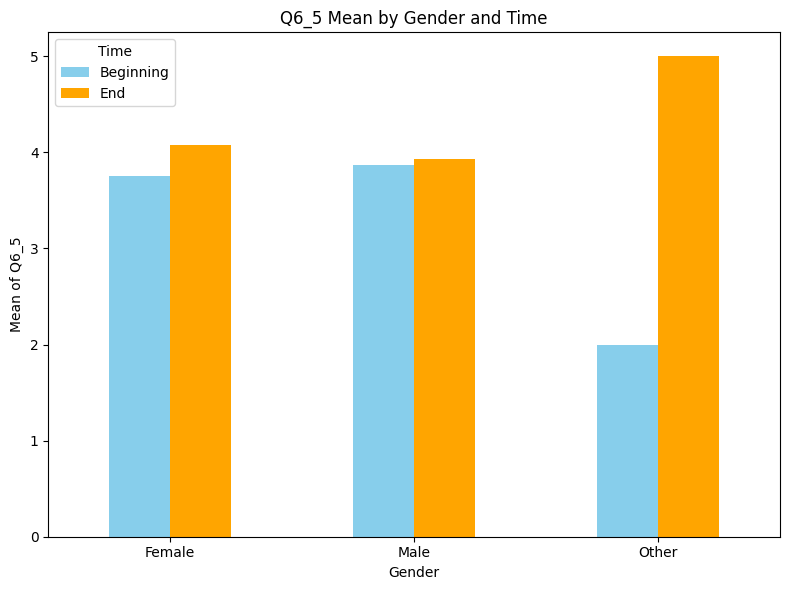

In [ ]:
# Q6_5: Bar plot to compare genders mean
grouped = data.groupby(["Gender", "B/E?"])["Q6_5"].mean().unstack()

# Plot
grouped.plot(kind='bar', figsize=(8, 6), color=["skyblue", "orange"])

plt.title("Q6_5 Mean by Gender and Time")
plt.xlabel("Gender")
plt.ylabel("Mean of Q6_5")
plt.legend(title="Time")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# overall Q6_6 Test Beginning vs End
begQ6_6overallALL = data[data["B/E?"] == "Beginning"]["Q6_6"].dropna()

endQ6_6overallALL = data[data["B/E?"] == "End"]["Q6_6"].dropna()

UTest(begQ6_6overallALL, endQ6_6overallALL)

Mann-Whitney U-Value: 1424.0
P-value: 0.5987679321476047
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_6
# mean for Q6_6
Q6_6_result = data.groupby(["Gender", "B/E?"])["Q6_6"].mean()
print("Q6_6 Mean")
print(Q6_6_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()
male_beginning_Q6_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()
other_beginning_Q6_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()

female_end_Q6_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_6"].dropna()
male_end_Q6_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_6"].dropna()
other_end_Q6_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_6"].dropna()

# Q6_6: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_6 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_6, male_beginning_Q6_6, other_beginning_Q6_6)

# Q6_6: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_6 3 Genders in the End:")
kruskalTest(female_end_Q6_6, male_end_Q6_6, other_end_Q6_6)

# Q6_6: U-Test comparing genders in the beginning
print()
print("Q6_6 Genders in the Beginning:")
UTest(female_beginning_Q6_6, male_beginning_Q6_6)

# Q6_6: U-Test comparing genders in the end
print()
print("Q6_6 Genders in the End:")
UTest(female_end_Q6_6, male_end_Q6_6)

# Q6_6 U-Test comparing females in the beginning vs end
print()
print("Q6_6 Females:")
UTest(female_beginning_Q6_6, female_end_Q6_6)

# Q6_6 U-Test comparing males in the beginning vs end
print()
print("Q6_6 Males:")
UTest(male_beginning_Q6_6, male_end_Q6_6)

# Q6_6 U-Test comparing other genders in the beginning vs end
print()
print("Q6_6 Males:")
UTest(other_beginning_Q6_6, other_end_Q6_6)

Q6_6 Mean
Gender  B/E?     
Female  Beginning    3.850000
        End          4.000000
Male    Beginning    3.900000
        End          3.866667
Other   Beginning    2.000000
        End          4.000000
Name: Q6_6, dtype: float64 

Q6_6 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 4.150547445255467
P-value: 0.12552206456110557
Fail to reject the null hypothesis: No significant differences exists

Q6_6 3 Genders in the End:
Kruskal-Wallis H-Statistic: 0.29332592819279635
P-value: 0.8635849875197438
Fail to reject the null hypothesis: No significant differences exists

Q6_6 Genders in the Beginning:
Mann-Whitney U-Value: 301.0
P-value: 0.9916104616768362
Fail to reject the null hypothesis: No significant differences exists

Q6_6 Genders in the End:
Mann-Whitney U-Value: 437.0
P-value: 0.5966815029498302
Fail to reject the null hypothesis: No significant differences exists

Q6_6 Females:
Mann-Whitney U-Value: 253.0
P-value: 0.7081419479563298
Fail to reject the null hypoth

In [ ]:
# overall Q6_7 Test Beginning vs End
begQ6_7overallALL = data[data["B/E?"] == "Beginning"]["Q6_7"].dropna()

endQ6_7overallALL = data[data["B/E?"] == "End"]["Q6_7"].dropna()

UTest(begQ6_7overallALL, endQ6_7overallALL)

Mann-Whitney U-Value: 1158.0
P-value: 0.041425304047591156
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q6_7
# mean for Q6_7
Q6_7_result = data.groupby(["Gender", "B/E?"])["Q6_7"].mean()
print("Q6_7 Mean")
print(Q6_7_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()
male_beginning_Q6_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()
other_beginning_Q6_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()

female_end_Q6_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_7"].dropna()
male_end_Q6_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_7"].dropna()
other_end_Q6_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_7"].dropna()

# Q6_7: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_7 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_7, male_beginning_Q6_7, other_beginning_Q6_7)

# Q6_7: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_7 3 Genders in the End:")
kruskalTest(female_end_Q6_7, male_end_Q6_7, other_end_Q6_7)

# Q6_7: U-Test comparing genders in the beginning
print()
print("Q6_7 Genders in the Beginning:")
UTest(female_beginning_Q6_7, male_beginning_Q6_7)

# Q6_7: U-Test comparing genders in the end
print()
print("Q6_7 Genders in the End:")
UTest(female_end_Q6_7, male_end_Q6_7)

# Q6_7 U-Test comparing females in the beginning vs end
print()
print("Q6_7 Females:")
UTest(female_beginning_Q6_7, female_end_Q6_7)

# Q6_7 U-Test comparing males in the beginning vs end
print()
print("Q6_7 Males:")
UTest(male_beginning_Q6_7, male_end_Q6_7)

# Q6_7 U-Test comparing other genders in the beginning vs end
print()
print("Q6_7 Males:")
UTest(other_beginning_Q6_7, other_end_Q6_7)

Q6_7 Mean
Gender  B/E?     
Female  Beginning    3.250000
        End          3.629630
Male    Beginning    3.466667
        End          3.758621
Other   Beginning    1.500000
        End          5.000000
Name: Q6_7, dtype: float64 

Q6_7 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 5.475086797518728
P-value: 0.06472916548455783
Fail to reject the null hypothesis: No significant differences exists

Q6_7 3 Genders in the End:
Kruskal-Wallis H-Statistic: 2.0854188754583256
P-value: 0.3524983147017582
Fail to reject the null hypothesis: No significant differences exists

Q6_7 Genders in the Beginning:
Mann-Whitney U-Value: 253.5
P-value: 0.340651074282027
Fail to reject the null hypothesis: No significant differences exists

Q6_7 Genders in the End:
Mann-Whitney U-Value: 372.0
P-value: 0.7432002814875036
Fail to reject the null hypothesis: No significant differences exists

Q6_7 Females:
Mann-Whitney U-Value: 201.5
P-value: 0.12719948878151624
Fail to reject the null hypothe

In [ ]:
# overall Q6_8 Test Beginning vs End
begQ6_8overallALL = data[data["B/E?"] == "Beginning"]["Q6_8"].dropna()

endQ6_8overallALL = data[data["B/E?"] == "End"]["Q6_8"].dropna()

UTest(begQ6_8overallALL, endQ6_8overallALL)

Mann-Whitney U-Value: 1205.5
P-value: 0.07680574181950627
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_8
# mean for Q6_8
Q6_8_result = data.groupby(["Gender", "B/E?"])["Q6_8"].mean()
print("Q6_8 Mean")
print(Q6_8_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()
male_beginning_Q6_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()
other_beginning_Q6_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()

female_end_Q6_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_8"].dropna()
male_end_Q6_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_8"].dropna()
other_end_Q6_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_8"].dropna()

# Q6_8: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_8 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_8, male_beginning_Q6_8, other_beginning_Q6_8)

# Q6_8: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_8 3 Genders in the End:")
kruskalTest(female_end_Q6_8, male_end_Q6_8, other_end_Q6_8)

# Q6_8: U-Test comparing genders in the beginning
print()
print("Q6_8 Genders in the Beginning:")
UTest(female_beginning_Q6_8, male_beginning_Q6_8)

# Q6_8: U-Test comparing genders in the end
print()
print("Q6_8 Genders in the End:")
UTest(female_end_Q6_8, male_end_Q6_8)

# Q6_8 U-Test comparing females in the beginning vs end
print()
print("Q6_8 Females:")
UTest(female_beginning_Q6_8, female_end_Q6_8)

# Q6_8 U-Test comparing males in the beginning vs end
print()
print("Q6_8 Males:")
UTest(male_beginning_Q6_8, male_end_Q6_8)

# Q6_8 U-Test comparing other genders in the beginning vs end
print()
print("Q6_8 Males:")
UTest(other_beginning_Q6_8, other_end_Q6_8)

Q6_8 Mean
Gender  B/E?     
Female  Beginning    4.300000
        End          4.333333
Male    Beginning    3.724138
        End          4.100000
Other   Beginning    4.000000
        End          5.000000
Name: Q6_8, dtype: float64 

Q6_8 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 6.102324243409018
P-value: 0.0473039195245689
Reject the null hypothesis: Significant differences exists

Q6_8 3 Genders in the End:
Kruskal-Wallis H-Statistic: 3.2409627140456903
P-value: 0.19780346207833846
Fail to reject the null hypothesis: No significant differences exists

Q6_8 Genders in the Beginning:
Mann-Whitney U-Value: 402.0
P-value: 0.01595188381264468
Reject the null hypothesis: Significant differences exists

Q6_8 Genders in the End:
Mann-Whitney U-Value: 489.0
P-value: 0.15078417698216273
Fail to reject the null hypothesis: No significant differences exists

Q6_8 Females:
Mann-Whitney U-Value: 252.5
P-value: 0.6883038119527788
Fail to reject the null hypothesis: No significant 

Q6_8: Male Beginning Avg: 3.7241379310344827
Q6_8 Female Beginning Average: 4.3
0.7832977028690032
0.714142842854285


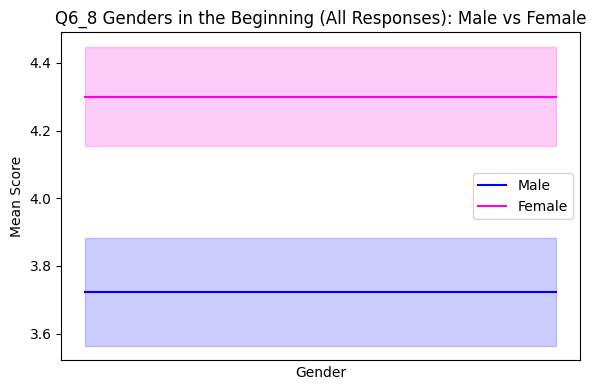

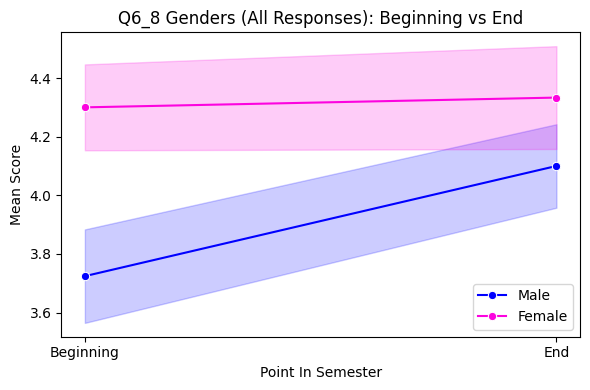

In [ ]:
# Q6_8: graphs and calculates genders in the beginning vs end
male_beginning_Q6_8 = male_beginning_Q6_8.tolist()
female_beginning_Q6_8 = female_beginning_Q6_8.tolist()

Q6_8_MalelBEGAvg   = average_list(male_beginning_Q6_8)
Q6_8_FemaleBEGAvg   = average_list(female_beginning_Q6_8)

Q6_8_MaleBEGSTD = np.std(male_beginning_Q6_8)
Q6_8_FemaleBEGSTD = np.std(female_beginning_Q6_8)

print(f"Q6_8: Male Beginning Avg: {Q6_8_MalelBEGAvg}")
print(f"Q6_8 Female Beginning Average: {Q6_8_FemaleBEGAvg}")
print(Q6_8_MaleBEGSTD)
print(Q6_8_FemaleBEGSTD)

lineplot_gender("Q6_8 Genders in the Beginning (All Responses)",
    begOverall=male_beginning_Q6_8,
    endOverall=female_beginning_Q6_8, band_factor=0.20
)
lineplot_beg_to_end_two("Q6_8 Genders (All Responses)", male_beginning_Q6_8, male_end_Q6_8, female_beginning_Q6_8, female_end_Q6_8, band_factor=0.2)


In [ ]:
# overall Q6_9 Test Beginning vs End
begQ6_9overallALL = data[data["B/E?"] == "Beginning"]["Q6_9"].dropna()

endQ6_9overallALL = data[data["B/E?"] == "End"]["Q6_9"].dropna()

UTest(begQ6_9overallALL, endQ6_9overallALL)

Mann-Whitney U-Value: 1409.5
P-value: 0.5352843888659455
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_9
# mean for Q6_9
Q6_9_result = data.groupby(["Gender", "B/E?"])["Q6_9"].mean()
print("Q6_9 Mean")
print(Q6_9_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()
male_beginning_Q6_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()
other_beginning_Q6_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()

female_end_Q6_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_9"].dropna()
male_end_Q6_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_9"].dropna()
other_end_Q6_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_9"].dropna()

# Q6_9: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_9 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_9, male_beginning_Q6_9, other_beginning_Q6_9)

# Q6_9: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_9 3 Genders in the End:")
kruskalTest(female_end_Q6_9, male_end_Q6_9, other_end_Q6_9)

# Q6_9: U-Test comparing genders in the beginning
print()
print("Q6_9 Genders in the Beginning:")
UTest(female_beginning_Q6_9, male_beginning_Q6_9)

# Q6_9: U-Test comparing genders in the end
print()
print("Q6_9 Genders in the End:")
UTest(female_end_Q6_9, male_end_Q6_9)

# Q6_9 U-Test comparing females in the beginning vs end
print()
print("Q6_9 Females:")
UTest(female_beginning_Q6_9, female_end_Q6_9)

# Q6_9 U-Test comparing males in the beginning vs end
print()
print("Q6_9 Males:")
UTest(male_beginning_Q6_9, male_end_Q6_9)

# Q6_9 U-Test comparing other genders in the beginning vs end
print()
print("Q6_9 Males:")
UTest(other_beginning_Q6_9, other_end_Q6_9)

Q6_9 Mean
Gender  B/E?     
Female  Beginning    4.050000
        End          4.074074
Male    Beginning    3.700000
        End          3.966667
Other   Beginning    3.000000
        End          5.000000
Name: Q6_9, dtype: float64 

Q6_9 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.036973726964677
P-value: 0.36114098255929145
Fail to reject the null hypothesis: No significant differences exists

Q6_9 3 Genders in the End:
Kruskal-Wallis H-Statistic: 2.0424115880205336
P-value: 0.36016039899031244
Fail to reject the null hypothesis: No significant differences exists

Q6_9 Genders in the Beginning:
Mann-Whitney U-Value: 347.0
P-value: 0.3358852311558196
Fail to reject the null hypothesis: No significant differences exists

Q6_9 Genders in the End:
Mann-Whitney U-Value: 436.5
P-value: 0.591519337358392
Fail to reject the null hypothesis: No significant differences exists

Q6_9 Females:
Mann-Whitney U-Value: 280.0
P-value: 0.8262191390978675
Fail to reject the null hypothe

In [ ]:
# overall Q6_10 Test Beginning vs End
begQ6_10overallALL = data[data["B/E?"] == "Beginning"]["Q6_10"].dropna()

endQ6_10overallALL = data[data["B/E?"] == "End"]["Q6_10"].dropna()

UTest(begQ6_10overallALL, endQ6_10overallALL)

Mann-Whitney U-Value: 1441.0
P-value: 0.6704652640818416
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_10
# mean for Q6_10
Q6_10_result = data.groupby(["Gender", "B/E?"])["Q6_10"].mean()
print("Q6_10 Mean")
print(Q6_10_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()
male_beginning_Q6_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()
other_beginning_Q6_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()

female_end_Q6_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_10"].dropna()
male_end_Q6_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_10"].dropna()
other_end_Q6_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_10"].dropna()

# Q6_10: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_10 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_10, male_beginning_Q6_10, other_beginning_Q6_10)

# Q6_10: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_10 3 Genders in the End:")
kruskalTest(female_end_Q6_10, male_end_Q6_10, other_end_Q6_10)

# Q6_10: U-Test comparing genders in the beginning
print()
print("Q6_10 Genders in the Beginning:")
UTest(female_beginning_Q6_10, male_beginning_Q6_10)

# Q6_10: U-Test comparing genders in the end
print()
print("Q6_10 Genders in the End:")
UTest(female_end_Q6_10, male_end_Q6_10)

# Q6_10 U-Test comparing females in the beginning vs end
print()
print("Q6_10 Females:")
UTest(female_beginning_Q6_10, female_end_Q6_10)

# Q6_10 U-Test comparing males in the beginning vs end
print()
print("Q6_10 Males:")
UTest(male_beginning_Q6_10, male_end_Q6_10)

# Q6_10 U-Test comparing other genders in the beginning vs end
print()
print("Q6_10 Males:")
UTest(other_beginning_Q6_10, other_end_Q6_10)

Q6_10 Mean
Gender  B/E?     
Female  Beginning    4.150000
        End          3.962963
Male    Beginning    3.800000
        End          4.066667
Other   Beginning    4.000000
        End          5.000000
Name: Q6_10, dtype: float64 

Q6_10 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.3266184112843111
P-value: 0.5151437939990102
Fail to reject the null hypothesis: No significant differences exists

Q6_10 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.8098453177257383
P-value: 0.40457317404237525
Fail to reject the null hypothesis: No significant differences exists

Q6_10 Genders in the Beginning:
Mann-Whitney U-Value: 353.5
P-value: 0.2613039695649698
Fail to reject the null hypothesis: No significant differences exists

Q6_10 Genders in the End:
Mann-Whitney U-Value: 374.5
P-value: 0.6097263879602404
Fail to reject the null hypothesis: No significant differences exists

Q6_10 Females:
Mann-Whitney U-Value: 302.0
P-value: 0.465320658396735
Fail to reject the null 

In [ ]:
# overall Q6_11 Test Beginning vs End
begQ6_11overallALL = data[data["B/E?"] == "Beginning"]["Q6_11"].dropna()

endQ6_11overallALL = data[data["B/E?"] == "End"]["Q6_11"].dropna()

UTest(begQ6_11overallALL, endQ6_11overallALL)

Mann-Whitney U-Value: 1290.5
P-value: 0.16920524871990728
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_11
# mean for Q6_11
Q6_11_result = data.groupby(["Gender", "B/E?"])["Q6_11"].mean()
print("Q6_11 Mean")
print(Q6_11_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()
male_beginning_Q6_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()
other_beginning_Q6_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()

female_end_Q6_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_11"].dropna()
male_end_Q6_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_11"].dropna()
other_end_Q6_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_11"].dropna()

# Q6_11: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_11 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_11, male_beginning_Q6_11, other_beginning_Q6_11)

# Q6_11: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_11 3 Genders in the End:")
kruskalTest(female_end_Q6_11, male_end_Q6_11, other_end_Q6_11)

# Q6_11: U-Test comparing genders in the beginning
print()
print("Q6_11 Genders in the Beginning:")
UTest(female_beginning_Q6_11, male_beginning_Q6_11)

# Q6_11: U-Test comparing genders in the end
print()
print("Q6_11 Genders in the End:")
UTest(female_end_Q6_11, male_end_Q6_11)

# Q6_11 U-Test comparing females in the beginning vs end
print()
print("Q6_11 Females:")
UTest(female_beginning_Q6_11, female_end_Q6_11)

# Q6_11 U-Test comparing males in the beginning vs end
print()
print("Q6_11 Males:")
UTest(male_beginning_Q6_11, male_end_Q6_11)

# Q6_11 U-Test comparing other genders in the beginning vs end
print()
print("Q6_11 Males:")
UTest(other_beginning_Q6_11, other_end_Q6_11)

Q6_11 Mean
Gender  B/E?     
Female  Beginning    3.800000
        End          4.074074
Male    Beginning    3.833333
        End          4.000000
Other   Beginning    3.000000
        End          5.000000
Name: Q6_11, dtype: float64 

Q6_11 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.5792682926829125
P-value: 0.27537151033742846
Fail to reject the null hypothesis: No significant differences exists

Q6_11 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.6619108969618537
P-value: 0.4356328626606665
Fail to reject the null hypothesis: No significant differences exists

Q6_11 Genders in the Beginning:
Mann-Whitney U-Value: 272.0
P-value: 0.5631744479478934
Fail to reject the null hypothesis: No significant differences exists

Q6_11 Genders in the End:
Mann-Whitney U-Value: 432.0
P-value: 0.6530234292305758
Fail to reject the null hypothesis: No significant differences exists

Q6_11 Females:
Mann-Whitney U-Value: 214.0
P-value: 0.2032817045098989
Fail to reject the null

In [ ]:
# overall Q6_12 Test Beginning vs End
begQ6_12overallALL = data[data["B/E?"] == "Beginning"]["Q6_12"].dropna()

endQ6_12overallALL = data[data["B/E?"] == "End"]["Q6_12"].dropna()

UTest(begQ6_12overallALL, endQ6_12overallALL)

Mann-Whitney U-Value: 1509.5
P-value: 0.9948365419836523
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_12
# mean for Q6_12
Q6_12_result = data.groupby(["Gender", "B/E?"])["Q6_12"].mean()
print("Q6_12 Mean")
print(Q6_12_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()
male_beginning_Q6_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()
other_beginning_Q6_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()

female_end_Q6_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_12"].dropna()
male_end_Q6_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_12"].dropna()
other_end_Q6_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_12"].dropna()

# Q6_12: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_12 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_12, male_beginning_Q6_12, other_beginning_Q6_12)

# Q6_12: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_12 3 Genders in the End:")
kruskalTest(female_end_Q6_12, male_end_Q6_12, other_end_Q6_12)

# Q6_12: U-Test comparing genders in the beginning
print()
print("Q6_12 Genders in the Beginning:")
UTest(female_beginning_Q6_12, male_beginning_Q6_12)

# Q6_12: U-Test comparing genders in the end
print()
print("Q6_12 Genders in the End:")
UTest(female_end_Q6_12, male_end_Q6_12)

# Q6_12 U-Test comparing females in the beginning vs end
print()
print("Q6_12 Females:")
UTest(female_beginning_Q6_12, female_end_Q6_12)

# Q6_12 U-Test comparing males in the beginning vs end
print()
print("Q6_12 Males:")
UTest(male_beginning_Q6_12, male_end_Q6_12)

# Q6_12 U-Test comparing other genders in the beginning vs end
print()
print("Q6_12 Males:")
UTest(other_beginning_Q6_12, other_end_Q6_12)

Q6_12 Mean
Gender  B/E?     
Female  Beginning    4.300000
        End          4.259259
Male    Beginning    4.166667
        End          4.133333
Other   Beginning    4.000000
        End          4.000000
Name: Q6_12, dtype: float64 

Q6_12 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.9588960205391037
P-value: 0.6191250481705168
Fail to reject the null hypothesis: No significant differences exists

Q6_12 3 Genders in the End:
Kruskal-Wallis H-Statistic: 0.41999156906081325
P-value: 0.810587662970631
Fail to reject the null hypothesis: No significant differences exists

Q6_12 Genders in the Beginning:
Mann-Whitney U-Value: 332.0
P-value: 0.4955855465512551
Fail to reject the null hypothesis: No significant differences exists

Q6_12 Genders in the End:
Mann-Whitney U-Value: 433.5
P-value: 0.6308518348426119
Fail to reject the null hypothesis: No significant differences exists

Q6_12 Females:
Mann-Whitney U-Value: 277.5
P-value: 0.8689581153372049
Fail to reject the null 

In [ ]:
# overall Q6_13 Test Beginning vs End
begQ6_13overallALL = data[data["B/E?"] == "Beginning"]["Q6_13"].dropna()

endQ6_13overallALL = data[data["B/E?"] == "End"]["Q6_13"].dropna()

UTest(begQ6_13overallALL, endQ6_13overallALL)

Mann-Whitney U-Value: 1443.5
P-value: 0.6792808029304449
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_13
# mean for Q6_13
Q6_13_result = data.groupby(["Gender", "B/E?"])["Q6_13"].mean()
print("Q6_13 Mean")
print(Q6_13_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()
male_beginning_Q6_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()
other_beginning_Q6_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()

female_end_Q6_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_13"].dropna()
male_end_Q6_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_13"].dropna()
other_end_Q6_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_13"].dropna()

# Q6_13: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_13 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_13, male_beginning_Q6_13, other_beginning_Q6_13)

# Q6_13: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_13 3 Genders in the End:")
kruskalTest(female_end_Q6_13, male_end_Q6_13, other_end_Q6_13)

# Q6_13: U-Test comparing genders in the beginning
print()
print("Q6_13 Genders in the Beginning:")
UTest(female_beginning_Q6_13, male_beginning_Q6_13)

# Q6_13: U-Test comparing genders in the end
print()
print("Q6_13 Genders in the End:")
UTest(female_end_Q6_13, male_end_Q6_13)

# Q6_13 U-Test comparing females in the beginning vs end
print()
print("Q6_13 Females:")
UTest(female_beginning_Q6_13, female_end_Q6_13)

# Q6_13 U-Test comparing males in the beginning vs end
print()
print("Q6_13 Males:")
UTest(male_beginning_Q6_13, male_end_Q6_13)

# Q6_13 U-Test comparing other genders in the beginning vs end
print()
print("Q6_13 Males:")
UTest(other_beginning_Q6_13, other_end_Q6_13)

Q6_13 Mean
Gender  B/E?     
Female  Beginning    4.250000
        End          4.296296
Male    Beginning    3.966667
        End          4.000000
Other   Beginning    4.000000
        End          5.000000
Name: Q6_13, dtype: float64 

Q6_13 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.1751054852320642
P-value: 0.5556855275822435
Fail to reject the null hypothesis: No significant differences exists

Q6_13 3 Genders in the End:
Kruskal-Wallis H-Statistic: 4.090522934426923
P-value: 0.12934636572178018
Fail to reject the null hypothesis: No significant differences exists

Q6_13 Genders in the Beginning:
Mann-Whitney U-Value: 348.0
P-value: 0.31262952277357436
Fail to reject the null hypothesis: No significant differences exists

Q6_13 Genders in the End:
Mann-Whitney U-Value: 500.0
P-value: 0.10274463769924196
Fail to reject the null hypothesis: No significant differences exists

Q6_13 Females:
Mann-Whitney U-Value: 255.0
P-value: 0.7324598246901179
Fail to reject the nul

In [ ]:
# overall Q6_14 Test Beginning vs End
begQ6_14overallALL = data[data["B/E?"] == "Beginning"]["Q6_14"].dropna()

endQ6_14overallALL = data[data["B/E?"] == "End"]["Q6_14"].dropna()

UTest(begQ6_14overallALL, endQ6_14overallALL)

Mann-Whitney U-Value: 1511.0
P-value: 0.9872076278130304
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_14
# mean for Q6_14
Q6_14_result = data.groupby(["Gender", "B/E?"])["Q6_14"].mean()
print("Q6_14 Mean")
print(Q6_14_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()
male_beginning_Q6_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()
other_beginning_Q6_14 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()

female_end_Q6_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_14"].dropna()
male_end_Q6_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_14"].dropna()
other_end_Q6_14 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_14"].dropna()

# Q6_14: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_14 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_14, male_beginning_Q6_14, other_beginning_Q6_14)

# Q6_14: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_14 3 Genders in the End:")
kruskalTest(female_end_Q6_14, male_end_Q6_14, other_end_Q6_14)

# Q6_14: U-Test comparing genders in the beginning
print()
print("Q6_14 Genders in the Beginning:")
UTest(female_beginning_Q6_14, male_beginning_Q6_14)

# Q6_14: U-Test comparing genders in the end
print()
print("Q6_14 Genders in the End:")
UTest(female_end_Q6_14, male_end_Q6_14)

# Q6_14 U-Test comparing females in the beginning vs end
print()
print("Q6_14 Females:")
UTest(female_beginning_Q6_14, female_end_Q6_14)

# Q6_14 U-Test comparing males in the beginning vs end
print()
print("Q6_14 Males:")
UTest(male_beginning_Q6_14, male_end_Q6_14)

# Q6_14 U-Test comparing other genders in the beginning vs end
print()
print("Q6_14 Males:")
UTest(other_beginning_Q6_14, other_end_Q6_14)

Q6_14 Mean
Gender  B/E?     
Female  Beginning    4.200000
        End          4.296296
Male    Beginning    4.133333
        End          4.033333
Other   Beginning    4.500000
        End          4.000000
Name: Q6_14, dtype: float64 

Q6_14 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.49741468332023797
P-value: 0.7798081573538579
Fail to reject the null hypothesis: No significant differences exists

Q6_14 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.4899678329659443
P-value: 0.4747419353985115
Fail to reject the null hypothesis: No significant differences exists

Q6_14 Genders in the Beginning:
Mann-Whitney U-Value: 318.0
P-value: 0.71036523646574
Fail to reject the null hypothesis: No significant differences exists

Q6_14 Genders in the End:
Mann-Whitney U-Value: 473.5
P-value: 0.24536960473962988
Fail to reject the null hypothesis: No significant differences exists

Q6_14 Females:
Mann-Whitney U-Value: 254.0
P-value: 0.7184474777546421
Fail to reject the null 

In [ ]:
# overall Q6_15 Test Beginning vs End
begQ6_15overallALL = data[data["B/E?"] == "Beginning"]["Q6_15"].dropna()

endQ6_15overallALL = data[data["B/E?"] == "End"]["Q6_15"].dropna()

UTest(begQ6_15overallALL, endQ6_15overallALL)

Mann-Whitney U-Value: 1272.0
P-value: 0.14006753656269316
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_15
# mean for Q6_15
Q6_15_result = data.groupby(["Gender", "B/E?"])["Q6_15"].mean()
print("Q6_15 Mean")
print(Q6_15_result, "\n")

# creates dataframes for all genders
female_beginning_Q6_15 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()
male_beginning_Q6_15 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()
other_beginning_Q6_15 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()

female_end_Q6_15 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_15"].dropna()
male_end_Q6_15 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_15"].dropna()
other_end_Q6_15 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q6_15"].dropna()

# Q6_15: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q6_15 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q6_15, male_beginning_Q6_15, other_beginning_Q6_15)

# Q6_15: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q6_15 3 Genders in the End:")
kruskalTest(female_end_Q6_15, male_end_Q6_15, other_end_Q6_15)

# Q6_15: U-Test comparing genders in the beginning
print()
print("Q6_15 Genders in the Beginning:")
UTest(female_beginning_Q6_15, male_beginning_Q6_15)

# Q6_15: U-Test comparing genders in the end
print()
print("Q6_15 Genders in the End:")
UTest(female_end_Q6_15, male_end_Q6_15)

# Q6_15 U-Test comparing females in the beginning vs end
print()
print("Q6_15 Females:")
UTest(female_beginning_Q6_15, female_end_Q6_15)

# Q6_15 U-Test comparing males in the beginning vs end
print()
print("Q6_15 Males:")
UTest(male_beginning_Q6_15, male_end_Q6_15)

# Q6_15 U-Test comparing other genders in the beginning vs end
print()
print("Q6_15 Males:")
UTest(other_beginning_Q6_15, other_end_Q6_15)

Q6_15 Mean
Gender  B/E?     
Female  Beginning    3.000000
        End          2.740741
Male    Beginning    2.800000
        End          3.433333
Other   Beginning    1.000000
        End          5.000000
Name: Q6_15, dtype: float64 

Q6_15 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 4.912288096765309
P-value: 0.08576501996075067
Fail to reject the null hypothesis: No significant differences exists

Q6_15 3 Genders in the End:
Kruskal-Wallis H-Statistic: 8.171158978269169
P-value: 0.016813393313644155
Reject the null hypothesis: Significant differences exists

Q6_15 Genders in the Beginning:
Mann-Whitney U-Value: 333.0
P-value: 0.5036676161564395
Fail to reject the null hypothesis: No significant differences exists

Q6_15 Genders in the End:
Mann-Whitney U-Value: 263.0
P-value: 0.016065526914358336
Reject the null hypothesis: Significant differences exists

Q6_15 Females:
Mann-Whitney U-Value: 307.0
P-value: 0.4043241641835148
Fail to reject the null hypothesis: No sign

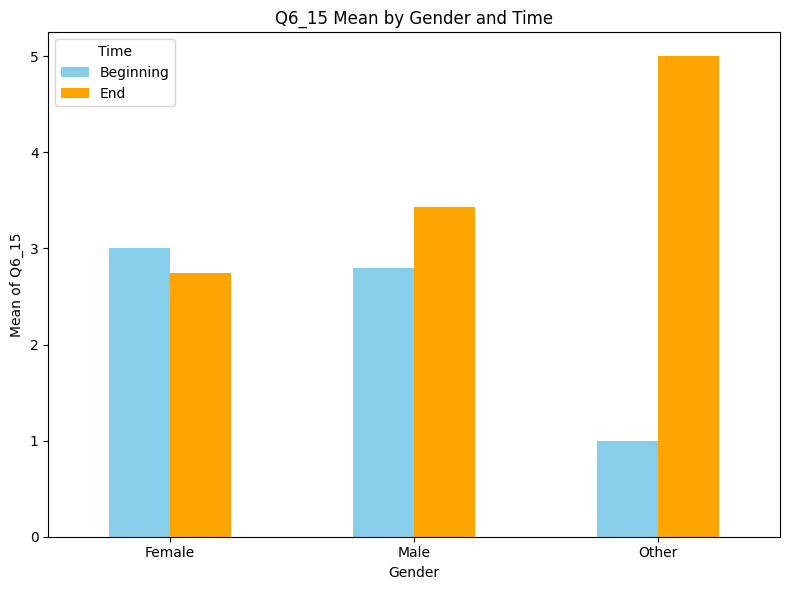

In [ ]:
# Q6_15: Bar plot to compare genders mean
grouped = data.groupby(["Gender", "B/E?"])["Q6_15"].mean().unstack()

# Plot
grouped.plot(kind='bar', figsize=(8, 6), color=["skyblue", "orange"])

plt.title("Q6_15 Mean by Gender and Time")
plt.xlabel("Gender")
plt.ylabel("Mean of Q6_15")
plt.legend(title="Time")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# START OF QUESTION 5

In [ ]:
# overall Q5_1 Test Beginning vs End
begQ5_1overallALL = data[data["B/E?"] == "Beginning"]["Q5_1"].dropna()

endQ5_1overallALL = data[data["B/E?"] == "End"]["Q5_1"].dropna()

UTest(begQ5_1overallALL, endQ5_1overallALL)

Mann-Whitney U-Value: 1282.5
P-value: 0.3068153127931367
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_1
# mean for Q5_1
Q5_1_result = data.groupby(["Gender", "B/E?"])["Q5_1"].mean()
print("Q5_1 Mean")
print(Q5_1_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()
male_beginning_Q5_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()
other_beginning_Q5_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()

female_end_Q5_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_1"].dropna()
male_end_Q5_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_1"].dropna()
other_end_Q5_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_1"].dropna()

# Q5_1: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_1 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_1, male_beginning_Q5_1, other_beginning_Q5_1)

# Q5_1: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_1 3 Genders in the End:")
kruskalTest(female_end_Q5_1, male_end_Q5_1, other_end_Q5_1)

# Q5_1: U-Test comparing genders in the beginning
print()
print("Q5_1 Genders in the Beginning:")
UTest(female_beginning_Q5_1, male_beginning_Q5_1)

# Q5_1: U-Test comparing genders in the end
print()
print("Q5_1 Genders in the End:")
UTest(female_end_Q5_1, male_end_Q5_1)

# Q5_1 U-Test comparing females in the beginning vs end
print()
print("Q5_1 Females:")
UTest(female_beginning_Q5_1, female_end_Q5_1)

# Q5_1 U-Test comparing males in the beginning vs end
print()
print("Q5_1 Males:")
UTest(male_beginning_Q5_1, male_end_Q5_1)

# Q5_1 U-Test comparing other genders in the beginning vs end
print()
print("Q5_1 Males:")
UTest(other_beginning_Q5_1, other_end_Q5_1)

Q5_1 Mean
Gender  B/E?     
Female  Beginning    4.280000
        End          4.565217
Male    Beginning    4.392857
        End          4.392857
Other   Beginning    4.000000
        End          5.000000
Name: Q5_1, dtype: float64 

Q5_1 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.1656638212402763
P-value: 0.558315027430544
Fail to reject the null hypothesis: No significant differences exists

Q5_1 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.2567763048369571
P-value: 0.5334509500359212
Fail to reject the null hypothesis: No significant differences exists

Q5_1 Genders in the Beginning:
Mann-Whitney U-Value: 329.0
P-value: 0.6866019047490554
Fail to reject the null hypothesis: No significant differences exists

Q5_1 Genders in the End:
Mann-Whitney U-Value: 357.0
P-value: 0.45918128255357704
Fail to reject the null hypothesis: No significant differences exists

Q5_1 Females:
Mann-Whitney U-Value: 238.5
P-value: 0.2620381517554129
Fail to reject the null hypothe

In [ ]:
# overall Q5_2 Test Beginning vs End
begQ5_2overallALL = data[data["B/E?"] == "Beginning"]["Q5_2"].dropna()

endQ5_2overallALL = data[data["B/E?"] == "End"]["Q5_2"].dropna()

UTest(begQ5_2overallALL, endQ5_2overallALL)

Mann-Whitney U-Value: 1354.0
P-value: 0.6035441883875337
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_2
# mean for Q5_2
Q5_2_result = data.groupby(["Gender", "B/E?"])["Q5_2"].mean()
print("Q5_2 Mean")
print(Q5_2_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()
male_beginning_Q5_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()
other_beginning_Q5_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()

female_end_Q5_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_2"].dropna()
male_end_Q5_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_2"].dropna()
other_end_Q5_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_2"].dropna()

# Q5_2: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_2 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_2, male_beginning_Q5_2, other_beginning_Q5_2)

# Q5_2: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_2 3 Genders in the End:")
kruskalTest(female_end_Q5_2, male_end_Q5_2, other_end_Q5_2)

# Q5_2: U-Test comparing genders in the beginning
print()
print("Q5_2 Genders in the Beginning:")
UTest(female_beginning_Q5_2, male_beginning_Q5_2)

# Q5_2: U-Test comparing genders in the end
print()
print("Q5_2 Genders in the End:")
UTest(female_end_Q5_2, male_end_Q5_2)

# Q5_2 U-Test comparing females in the beginning vs end
print()
print("Q5_2 Females:")
UTest(female_beginning_Q5_2, female_end_Q5_2)

# Q5_2 U-Test comparing males in the beginning vs end
print()
print("Q5_2 Males:")
UTest(male_beginning_Q5_2, male_end_Q5_2)

# Q5_2 U-Test comparing other genders in the beginning vs end
print()
print("Q5_2 Males:")
UTest(other_beginning_Q5_2, other_end_Q5_2)

Q5_2 Mean
Gender  B/E?     
Female  Beginning    4.400000
        End          4.434783
Male    Beginning    4.285714
        End          4.357143
Other   Beginning    4.000000
        End          4.000000
Name: Q5_2, dtype: float64 

Q5_2 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.1387019918040475
P-value: 0.5658925861539771
Fail to reject the null hypothesis: No significant differences exists

Q5_2 3 Genders in the End:
Kruskal-Wallis H-Statistic: 0.5902691511387226
P-value: 0.7444313984452671
Fail to reject the null hypothesis: No significant differences exists

Q5_2 Genders in the Beginning:
Mann-Whitney U-Value: 400.0
P-value: 0.32419697973695405
Fail to reject the null hypothesis: No significant differences exists

Q5_2 Genders in the End:
Mann-Whitney U-Value: 332.0
P-value: 0.8418477698212438
Fail to reject the null hypothesis: No significant differences exists

Q5_2 Females:
Mann-Whitney U-Value: 287.0
P-value: 1.0
Fail to reject the null hypothesis: No signif

In [ ]:
# overall Q5_3 Test Beginning vs End
begQ5_3overallALL = data[data["B/E?"] == "Beginning"]["Q5_3"].dropna()

endQ5_3overallALL = data[data["B/E?"] == "End"]["Q5_3"].dropna()

UTest(begQ5_3overallALL, endQ5_3overallALL)

Mann-Whitney U-Value: 1276.0
P-value: 0.37457362231072844
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_3
# mean for Q5_3
Q5_3_result = data.groupby(["Gender", "B/E?"])["Q5_3"].mean()
print("Q5_3 Mean")
print(Q5_3_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()
male_beginning_Q5_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()
other_beginning_Q5_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()

female_end_Q5_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_3"].dropna()
male_end_Q5_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_3"].dropna()
other_end_Q5_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_3"].dropna()

# Q5_3: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_3 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_3, male_beginning_Q5_3, other_beginning_Q5_3)

# Q5_3: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_3 3 Genders in the End:")
kruskalTest(female_end_Q5_3, male_end_Q5_3, other_end_Q5_3)

# Q5_3: U-Test comparing genders in the beginning
print()
print("Q5_3 Genders in the Beginning:")
UTest(female_beginning_Q5_3, male_beginning_Q5_3)

# Q5_3: U-Test comparing genders in the end
print()
print("Q5_3 Genders in the End:")
UTest(female_end_Q5_3, male_end_Q5_3)

# Q5_3 U-Test comparing females in the beginning vs end
print()
print("Q5_3 Females:")
UTest(female_beginning_Q5_3, female_end_Q5_3)

# Q5_3 U-Test comparing males in the beginning vs end
print()
print("Q5_3 Males:")
UTest(male_beginning_Q5_3, male_end_Q5_3)

# Q5_3 U-Test comparing other genders in the beginning vs end
print()
print("Q5_3 Males:")
UTest(other_beginning_Q5_3, other_end_Q5_3)

Q5_3 Mean
Gender  B/E?     
Female  Beginning    4.280000
        End          4.478261
Male    Beginning    4.259259
        End          4.321429
Other   Beginning    4.500000
        End          4.000000
Name: Q5_3, dtype: float64 

Q5_3 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.11301726283402169
P-value: 0.9450583272674205
Fail to reject the null hypothesis: No significant differences exists

Q5_3 3 Genders in the End:
Kruskal-Wallis H-Statistic: 0.9679736645962609
P-value: 0.6163213173942217
Fail to reject the null hypothesis: No significant differences exists

Q5_3 Genders in the Beginning:
Mann-Whitney U-Value: 340.5
P-value: 0.959505514928875
Fail to reject the null hypothesis: No significant differences exists

Q5_3 Genders in the End:
Mann-Whitney U-Value: 350.0
P-value: 0.5588733178012163
Fail to reject the null hypothesis: No significant differences exists

Q5_3 Females:
Mann-Whitney U-Value: 245.0
P-value: 0.3365469567923256
Fail to reject the null hypothe

In [ ]:
# overall Q5_4 Test Beginning vs End
begQ5_4overallALL = data[data["B/E?"] == "Beginning"]["Q5_4"].dropna()

endQ5_4overallALL = data[data["B/E?"] == "End"]["Q5_4"].dropna()

UTest(begQ5_4overallALL, endQ5_4overallALL)

Mann-Whitney U-Value: 1364.0
P-value: 0.7853322085054051
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_4
# mean for Q5_4
Q5_4_result = data.groupby(["Gender", "B/E?"])["Q5_4"].mean()
print("Q5_4 Mean")
print(Q5_4_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()
male_beginning_Q5_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()
other_beginning_Q5_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()

female_end_Q5_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_4"].dropna()
male_end_Q5_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_4"].dropna()
other_end_Q5_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_4"].dropna()

# Q5_4: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_4 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_4, male_beginning_Q5_4, other_beginning_Q5_4)

# Q5_4: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_4 3 Genders in the End:")
kruskalTest(female_end_Q5_4, male_end_Q5_4, other_end_Q5_4)

# Q5_4: U-Test comparing genders in the beginning
print()
print("Q5_4 Genders in the Beginning:")
UTest(female_beginning_Q5_4, male_beginning_Q5_4)

# Q5_4: U-Test comparing genders in the end
print()
print("Q5_4 Genders in the End:")
UTest(female_end_Q5_4, male_end_Q5_4)

# Q5_4 U-Test comparing females in the beginning vs end
print()
print("Q5_4 Females:")
UTest(female_beginning_Q5_4, female_end_Q5_4)

# Q5_4 U-Test comparing males in the beginning vs end
print()
print("Q5_4 Males:")
UTest(male_beginning_Q5_4, male_end_Q5_4)

# Q5_4 U-Test comparing other genders in the beginning vs end
print()
print("Q5_4 Males:")
UTest(other_beginning_Q5_4, other_end_Q5_4)

Q5_4 Mean
Gender  B/E?     
Female  Beginning    4.400000
        End          4.478261
Male    Beginning    4.500000
        End          4.518519
Other   Beginning    4.000000
        End          5.000000
Name: Q5_4, dtype: float64 

Q5_4 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.600362675022022
P-value: 0.44924749130850505
Fail to reject the null hypothesis: No significant differences exists

Q5_4 3 Genders in the End:
Kruskal-Wallis H-Statistic: 0.8578106030622497
P-value: 0.651221595949147
Fail to reject the null hypothesis: No significant differences exists

Q5_4 Genders in the Beginning:
Mann-Whitney U-Value: 351.0
P-value: 0.9919482116241568
Fail to reject the null hypothesis: No significant differences exists

Q5_4 Genders in the End:
Mann-Whitney U-Value: 299.5
P-value: 0.8156709480270583
Fail to reject the null hypothesis: No significant differences exists

Q5_4 Females:
Mann-Whitney U-Value: 292.5
P-value: 0.916506214691849
Fail to reject the null hypothesi

In [ ]:
# overall Q5_5 Test Beginning vs End
begQ5_5overallALL = data[data["B/E?"] == "Beginning"]["Q5_5"].dropna()

endQ5_5overallALL = data[data["B/E?"] == "End"]["Q5_5"].dropna()

UTest(begQ5_5overallALL, endQ5_5overallALL)

Mann-Whitney U-Value: 1450.5
P-value: 0.8790248033836012
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_5
# mean for Q5_5
Q5_5_result = data.groupby(["Gender", "B/E?"])["Q5_5"].mean()
print("Q5_5 Mean")
print(Q5_5_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()
male_beginning_Q5_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()
other_beginning_Q5_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()

female_end_Q5_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_5"].dropna()
male_end_Q5_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_5"].dropna()
other_end_Q5_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_5"].dropna()

# Q5_5: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_5 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_5, male_beginning_Q5_5, other_beginning_Q5_5)

# Q5_5: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_5 3 Genders in the End:")
kruskalTest(female_end_Q5_5, male_end_Q5_5, other_end_Q5_5)

# Q5_5: U-Test comparing genders in the beginning
print()
print("Q5_5 Genders in the Beginning:")
UTest(female_beginning_Q5_5, male_beginning_Q5_5)

# Q5_5: U-Test comparing genders in the end
print()
print("Q5_5 Genders in the End:")
UTest(female_end_Q5_5, male_end_Q5_5)

# Q5_5 U-Test comparing females in the beginning vs end
print()
print("Q5_5 Females:")
UTest(female_beginning_Q5_5, female_end_Q5_5)

# Q5_5 U-Test comparing males in the beginning vs end
print()
print("Q5_5 Males:")
UTest(male_beginning_Q5_5, male_end_Q5_5)

# Q5_5 U-Test comparing other genders in the beginning vs end
print()
print("Q5_5 Males:")
UTest(other_beginning_Q5_5, other_end_Q5_5)

Q5_5 Mean
Gender  B/E?     
Female  Beginning    4.640000
        End          4.652174
Male    Beginning    4.464286
        End          4.500000
Other   Beginning    5.000000
        End          5.000000
Name: Q5_5, dtype: float64 

Q5_5 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.1422010466296846
P-value: 0.34263123618957086
Fail to reject the null hypothesis: No significant differences exists

Q5_5 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.3338046782080213
P-value: 0.5132961350256333
Fail to reject the null hypothesis: No significant differences exists

Q5_5 Genders in the Beginning:
Mann-Whitney U-Value: 401.0
P-value: 0.2734435078297751
Fail to reject the null hypothesis: No significant differences exists

Q5_5 Genders in the End:
Mann-Whitney U-Value: 362.5
P-value: 0.3620045833239268
Fail to reject the null hypothesis: No significant differences exists

Q5_5 Females:
Mann-Whitney U-Value: 292.5
P-value: 0.9023976138655995
Fail to reject the null hypoth

In [ ]:
# overall Q5_6 Test Beginning vs End
begQ5_6overallALL = data[data["B/E?"] == "Beginning"]["Q5_6"].dropna()

endQ5_6overallALL = data[data["B/E?"] == "End"]["Q5_6"].dropna()

UTest(begQ5_6overallALL, endQ5_6overallALL)

Mann-Whitney U-Value: 1129.0
P-value: 0.042528602509988925
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q5_6
# mean for Q5_6
Q5_6_result = data.groupby(["Gender", "B/E?"])["Q5_6"].mean()
print("Q5_6 Mean")
print(Q5_6_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()
male_beginning_Q5_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()
other_beginning_Q5_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()

female_end_Q5_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_6"].dropna()
male_end_Q5_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_6"].dropna()
other_end_Q5_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_6"].dropna()

# Q5_6: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_6 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_6, male_beginning_Q5_6, other_beginning_Q5_6)

# Q5_6: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_6 3 Genders in the End:")
kruskalTest(female_end_Q5_6, male_end_Q5_6, other_end_Q5_6)

# Q5_6: U-Test comparing genders in the beginning
print()
print("Q5_6 Genders in the Beginning:")
UTest(female_beginning_Q5_6, male_beginning_Q5_6)

# Q5_6: U-Test comparing genders in the end
print()
print("Q5_6 Genders in the End:")
UTest(female_end_Q5_6, male_end_Q5_6)

# Q5_6 U-Test comparing females in the beginning vs end
print()
print("Q5_6 Females:")
UTest(female_beginning_Q5_6, female_end_Q5_6)

# Q5_6 U-Test comparing males in the beginning vs end
print()
print("Q5_6 Males:")
UTest(male_beginning_Q5_6, male_end_Q5_6)

# Q5_6 U-Test comparing other genders in the beginning vs end
print()
print("Q5_6 Males:")
UTest(other_beginning_Q5_6, other_end_Q5_6)

Q5_6 Mean
Gender  B/E?     
Female  Beginning    3.880000
        End          4.086957
Male    Beginning    4.035714
        End          4.392857
Other   Beginning    3.000000
        End          5.000000
Name: Q5_6, dtype: float64 

Q5_6 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.2576077097505762
P-value: 0.3234198822612509
Fail to reject the null hypothesis: No significant differences exists

Q5_6 3 Genders in the End:
Kruskal-Wallis H-Statistic: 3.993662282584852
P-value: 0.13576482184147295
Fail to reject the null hypothesis: No significant differences exists

Q5_6 Genders in the Beginning:
Mann-Whitney U-Value: 305.0
P-value: 0.3917129056725621
Fail to reject the null hypothesis: No significant differences exists

Q5_6 Genders in the End:
Mann-Whitney U-Value: 242.5
P-value: 0.10135775519110711
Fail to reject the null hypothesis: No significant differences exists

Q5_6 Females:
Mann-Whitney U-Value: 248.5
P-value: 0.38035276470433654
Fail to reject the null hypot

In [ ]:
# overall Q5_7 Test Beginning vs End
begQ5_7overallALL = data[data["B/E?"] == "Beginning"]["Q5_7"].dropna()

endQ5_7overallALL = data[data["B/E?"] == "End"]["Q5_7"].dropna()

UTest(begQ5_7overallALL, endQ5_7overallALL)

Mann-Whitney U-Value: 1197.0
P-value: 0.09611515336568263
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_7
# mean for Q5_7
Q5_7_result = data.groupby(["Gender", "B/E?"])["Q5_7"].mean()
print("Q5_7 Mean")
print(Q5_7_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()
male_beginning_Q5_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()
other_beginning_Q5_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()

female_end_Q5_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_7"].dropna()
male_end_Q5_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_7"].dropna()
other_end_Q5_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_7"].dropna()

# Q5_7: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_7 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_7, male_beginning_Q5_7, other_beginning_Q5_7)

# Q5_7: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_7 3 Genders in the End:")
kruskalTest(female_end_Q5_7, male_end_Q5_7, other_end_Q5_7)

# Q5_7: U-Test comparing genders in the beginning
print()
print("Q5_7 Genders in the Beginning:")
UTest(female_beginning_Q5_7, male_beginning_Q5_7)

# Q5_7: U-Test comparing genders in the end
print()
print("Q5_7 Genders in the End:")
UTest(female_end_Q5_7, male_end_Q5_7)

# Q5_7 U-Test comparing females in the beginning vs end
print()
print("Q5_7 Females:")
UTest(female_beginning_Q5_7, female_end_Q5_7)

# Q5_7 U-Test comparing males in the beginning vs end
print()
print("Q5_7 Males:")
UTest(male_beginning_Q5_7, male_end_Q5_7)

# Q5_7 U-Test comparing other genders in the beginning vs end
print()
print("Q5_7 Males:")
UTest(other_beginning_Q5_7, other_end_Q5_7)

Q5_7 Mean
Gender  B/E?     
Female  Beginning    4.360000
        End          4.608696
Male    Beginning    4.500000
        End          4.642857
Other   Beginning    4.000000
        End          4.000000
Name: Q5_7, dtype: float64 

Q5_7 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.5192336217552624
P-value: 0.7713471009995198
Fail to reject the null hypothesis: No significant differences exists

Q5_7 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.685804002760535
P-value: 0.430459514986285
Fail to reject the null hypothesis: No significant differences exists

Q5_7 Genders in the Beginning:
Mann-Whitney U-Value: 329.0
P-value: 0.6786528347549419
Fail to reject the null hypothesis: No significant differences exists

Q5_7 Genders in the End:
Mann-Whitney U-Value: 313.0
P-value: 0.8451228610920527
Fail to reject the null hypothesis: No significant differences exists

Q5_7 Females:
Mann-Whitney U-Value: 236.0
P-value: 0.23021224245632854
Fail to reject the null hypothes

In [ ]:
# overall Q5_8 Test Beginning vs End
begQ5_8overallALL = data[data["B/E?"] == "Beginning"]["Q5_8"].dropna()

endQ5_8overallALL = data[data["B/E?"] == "End"]["Q5_8"].dropna()

UTest(begQ5_8overallALL, endQ5_8overallALL)

Mann-Whitney U-Value: 1323.0
P-value: 0.46169658076344244
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_8
# mean for Q5_8
Q5_8_result = data.groupby(["Gender", "B/E?"])["Q5_8"].mean()
print("Q5_8 Mean")
print(Q5_8_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()
male_beginning_Q5_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()
other_beginning_Q5_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()

female_end_Q5_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_8"].dropna()
male_end_Q5_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_8"].dropna()
other_end_Q5_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_8"].dropna()

# Q5_8: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_8 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_8, male_beginning_Q5_8, other_beginning_Q5_8)

# Q5_8: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_8 3 Genders in the End:")
kruskalTest(female_end_Q5_8, male_end_Q5_8, other_end_Q5_8)

# Q5_8: U-Test comparing genders in the beginning
print()
print("Q5_8 Genders in the Beginning:")
UTest(female_beginning_Q5_8, male_beginning_Q5_8)

# Q5_8: U-Test comparing genders in the end
print()
print("Q5_8 Genders in the End:")
UTest(female_end_Q5_8, male_end_Q5_8)

# Q5_8 U-Test comparing females in the beginning vs end
print()
print("Q5_8 Females:")
UTest(female_beginning_Q5_8, female_end_Q5_8)

# Q5_8 U-Test comparing males in the beginning vs end
print()
print("Q5_8 Males:")
UTest(male_beginning_Q5_8, male_end_Q5_8)

# Q5_8 U-Test comparing other genders in the beginning vs end
print()
print("Q5_8 Males:")
UTest(other_beginning_Q5_8, other_end_Q5_8)

Q5_8 Mean
Gender  B/E?     
Female  Beginning    4.240000
        End          4.304348
Male    Beginning    4.321429
        End          4.464286
Other   Beginning    4.500000
        End          5.000000
Name: Q5_8, dtype: float64 

Q5_8 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.15336509352791122
P-value: 0.9261838269956765
Fail to reject the null hypothesis: No significant differences exists

Q5_8 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.5979555753547874
P-value: 0.4497885085572253
Fail to reject the null hypothesis: No significant differences exists

Q5_8 Genders in the Beginning:
Mann-Whitney U-Value: 341.0
P-value: 0.8664051962955319
Fail to reject the null hypothesis: No significant differences exists

Q5_8 Genders in the End:
Mann-Whitney U-Value: 283.0
P-value: 0.41857606633308664
Fail to reject the null hypothesis: No significant differences exists

Q5_8 Females:
Mann-Whitney U-Value: 282.5
P-value: 0.919400804760988
Fail to reject the null hypoth

In [ ]:
# overall Q5_9 Test Beginning vs End
begQ5_9overallALL = data[data["B/E?"] == "Beginning"]["Q5_9"].dropna()

endQ5_9overallALL = data[data["B/E?"] == "End"]["Q5_9"].dropna()

UTest(begQ5_9overallALL, endQ5_9overallALL)

Mann-Whitney U-Value: 1362.0
P-value: 0.7549077561827768
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_9
# mean for Q5_9
Q5_9_result = data.groupby(["Gender", "B/E?"])["Q5_9"].mean()
print("Q5_9 Mean")
print(Q5_9_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()
male_beginning_Q5_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()
other_beginning_Q5_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()

female_end_Q5_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_9"].dropna()
male_end_Q5_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_9"].dropna()
other_end_Q5_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_9"].dropna()

# Q5_9: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_9 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_9, male_beginning_Q5_9, other_beginning_Q5_9)

# Q5_9: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_9 3 Genders in the End:")
kruskalTest(female_end_Q5_9, male_end_Q5_9, other_end_Q5_9)

# Q5_9: U-Test comparing genders in the beginning
print()
print("Q5_9 Genders in the Beginning:")
UTest(female_beginning_Q5_9, male_beginning_Q5_9)

# Q5_9: U-Test comparing genders in the end
print()
print("Q5_9 Genders in the End:")
UTest(female_end_Q5_9, male_end_Q5_9)

# Q5_9 U-Test comparing females in the beginning vs end
print()
print("Q5_9 Females:")
UTest(female_beginning_Q5_9, female_end_Q5_9)

# Q5_9 U-Test comparing males in the beginning vs end
print()
print("Q5_9 Males:")
UTest(male_beginning_Q5_9, male_end_Q5_9)

# Q5_9 U-Test comparing other genders in the beginning vs end
print()
print("Q5_9 Males:")
UTest(other_beginning_Q5_9, other_end_Q5_9)

Q5_9 Mean
Gender  B/E?     
Female  Beginning    4.560000
        End          4.695652
Male    Beginning    4.518519
        End          4.535714
Other   Beginning    5.000000
        End          5.000000
Name: Q5_9, dtype: float64 

Q5_9 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.7000322231837788
P-value: 0.42740804566925017
Fail to reject the null hypothesis: No significant differences exists

Q5_9 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.871319875776428
P-value: 0.39232686871478284
Fail to reject the null hypothesis: No significant differences exists

Q5_9 Genders in the Beginning:
Mann-Whitney U-Value: 371.0
P-value: 0.47999698143187497
Fail to reject the null hypothesis: No significant differences exists

Q5_9 Genders in the End:
Mann-Whitney U-Value: 373.0
P-value: 0.2526736807774891
Fail to reject the null hypothesis: No significant differences exists

Q5_9 Females:
Mann-Whitney U-Value: 268.0
P-value: 0.6220564763697298
Fail to reject the null hypot

In [ ]:
# overall Q5_10 Test Beginning vs End
begQ5_10overallALL = data[data["B/E?"] == "Beginning"]["Q5_10"].dropna()

endQ5_10overallALL = data[data["B/E?"] == "End"]["Q5_10"].dropna()

UTest(begQ5_10overallALL, endQ5_10overallALL)

Mann-Whitney U-Value: 1293.0
P-value: 0.3569294278585521
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_10
# mean for Q5_10
Q5_10_result = data.groupby(["Gender", "B/E?"])["Q5_10"].mean()
print("Q5_10 Mean")
print(Q5_10_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()
male_beginning_Q5_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()
other_beginning_Q5_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()

female_end_Q5_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_10"].dropna()
male_end_Q5_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_10"].dropna()
other_end_Q5_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_10"].dropna()

# Q5_10: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_10 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_10, male_beginning_Q5_10, other_beginning_Q5_10)

# Q5_10: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_10 3 Genders in the End:")
kruskalTest(female_end_Q5_10, male_end_Q5_10, other_end_Q5_10)

# Q5_10: U-Test comparing genders in the beginning
print()
print("Q5_10 Genders in the Beginning:")
UTest(female_beginning_Q5_10, male_beginning_Q5_10)

# Q5_10: U-Test comparing genders in the end
print()
print("Q5_10 Genders in the End:")
UTest(female_end_Q5_10, male_end_Q5_10)

# Q5_10 U-Test comparing females in the beginning vs end
print()
print("Q5_10 Females:")
UTest(female_beginning_Q5_10, female_end_Q5_10)

# Q5_10 U-Test comparing males in the beginning vs end
print()
print("Q5_10 Males:")
UTest(male_beginning_Q5_10, male_end_Q5_10)

# Q5_10 U-Test comparing other genders in the beginning vs end
print()
print("Q5_10 Males:")
UTest(other_beginning_Q5_10, other_end_Q5_10)

Q5_10 Mean
Gender  B/E?     
Female  Beginning    3.960000
        End          4.173913
Male    Beginning    4.285714
        End          4.392857
Other   Beginning    4.000000
        End          4.000000
Name: Q5_10, dtype: float64 

Q5_10 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.9843021549666515
P-value: 0.3707782598202202
Fail to reject the null hypothesis: No significant differences exists

Q5_10 3 Genders in the End:
Kruskal-Wallis H-Statistic: 2.3976459916445294
P-value: 0.3015489274678278
Fail to reject the null hypothesis: No significant differences exists

Q5_10 Genders in the Beginning:
Mann-Whitney U-Value: 276.0
P-value: 0.16033813076533765
Fail to reject the null hypothesis: No significant differences exists

Q5_10 Genders in the End:
Mann-Whitney U-Value: 253.5
P-value: 0.1570234615239376
Fail to reject the null hypothesis: No significant differences exists

Q5_10 Females:
Mann-Whitney U-Value: 252.0
P-value: 0.43724635105732856
Fail to reject the nul

In [ ]:
# overall Q5_11 Test Beginning vs End
begQ5_11overallALL = data[data["B/E?"] == "Beginning"]["Q5_11"].dropna()

endQ5_11overallALL = data[data["B/E?"] == "End"]["Q5_11"].dropna()

UTest(begQ5_11overallALL, endQ5_11overallALL)

Mann-Whitney U-Value: 1161.5
P-value: 0.06664006032277921
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_11
# mean for Q5_11
Q5_11_result = data.groupby(["Gender", "B/E?"])["Q5_11"].mean()
print("Q5_11 Mean")
print(Q5_11_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()
male_beginning_Q5_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()
other_beginning_Q5_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()

female_end_Q5_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_11"].dropna()
male_end_Q5_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_11"].dropna()
other_end_Q5_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_11"].dropna()

# Q5_11: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_11 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_11, male_beginning_Q5_11, other_beginning_Q5_11)

# Q5_11: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_11 3 Genders in the End:")
kruskalTest(female_end_Q5_11, male_end_Q5_11, other_end_Q5_11)

# Q5_11: U-Test comparing genders in the beginning
print()
print("Q5_11 Genders in the Beginning:")
UTest(female_beginning_Q5_11, male_beginning_Q5_11)

# Q5_11: U-Test comparing genders in the end
print()
print("Q5_11 Genders in the End:")
UTest(female_end_Q5_11, male_end_Q5_11)

# Q5_11 U-Test comparing females in the beginning vs end
print()
print("Q5_11 Females:")
UTest(female_beginning_Q5_11, female_end_Q5_11)

# Q5_11 U-Test comparing males in the beginning vs end
print()
print("Q5_11 Males:")
UTest(male_beginning_Q5_11, male_end_Q5_11)

# Q5_11 U-Test comparing other genders in the beginning vs end
print()
print("Q5_11 Males:")
UTest(other_beginning_Q5_11, other_end_Q5_11)

Q5_11 Mean
Gender  B/E?     
Female  Beginning    4.080000
        End          4.391304
Male    Beginning    4.357143
        End          4.464286
Other   Beginning    2.500000
        End          5.000000
Name: Q5_11, dtype: float64 

Q5_11 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 6.60772094977936
P-value: 0.036741055346140215
Reject the null hypothesis: Significant differences exists

Q5_11 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.4977789150408676
P-value: 0.4728914272575393
Fail to reject the null hypothesis: No significant differences exists

Q5_11 Genders in the Beginning:
Mann-Whitney U-Value: 293.0
P-value: 0.27287200439158343
Fail to reject the null hypothesis: No significant differences exists

Q5_11 Genders in the End:
Mann-Whitney U-Value: 285.5
P-value: 0.4425172579647564
Fail to reject the null hypothesis: No significant differences exists

Q5_11 Females:
Mann-Whitney U-Value: 234.5
P-value: 0.2371678731156014
Fail to reject the null hypothesis

In [ ]:
# overall Q5_12 Test Beginning vs End
begQ5_12overallALL = data[data["B/E?"] == "Beginning"]["Q5_12"].dropna()

endQ5_12overallALL = data[data["B/E?"] == "End"]["Q5_12"].dropna()

UTest(begQ5_12overallALL, endQ5_12overallALL)

Mann-Whitney U-Value: 1269.0
P-value: 0.2633737998407253
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_12
# mean for Q5_12
Q5_12_result = data.groupby(["Gender", "B/E?"])["Q5_12"].mean()
print("Q5_12 Mean")
print(Q5_12_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()
male_beginning_Q5_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()
other_beginning_Q5_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()

female_end_Q5_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_12"].dropna()
male_end_Q5_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_12"].dropna()
other_end_Q5_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_12"].dropna()

# Q5_12: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_12 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_12, male_beginning_Q5_12, other_beginning_Q5_12)

# Q5_12: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_12 3 Genders in the End:")
kruskalTest(female_end_Q5_12, male_end_Q5_12, other_end_Q5_12)

# Q5_12: U-Test comparing genders in the beginning
print()
print("Q5_12 Genders in the Beginning:")
UTest(female_beginning_Q5_12, male_beginning_Q5_12)

# Q5_12: U-Test comparing genders in the end
print()
print("Q5_12 Genders in the End:")
UTest(female_end_Q5_12, male_end_Q5_12)

# Q5_12 U-Test comparing females in the beginning vs end
print()
print("Q5_12 Females:")
UTest(female_beginning_Q5_12, female_end_Q5_12)

# Q5_12 U-Test comparing males in the beginning vs end
print()
print("Q5_12 Males:")
UTest(male_beginning_Q5_12, male_end_Q5_12)

# Q5_12 U-Test comparing other genders in the beginning vs end
print()
print("Q5_12 Males:")
UTest(other_beginning_Q5_12, other_end_Q5_12)

Q5_12 Mean
Gender  B/E?     
Female  Beginning    4.240000
        End          4.521739
Male    Beginning    4.428571
        End          4.464286
Other   Beginning    4.000000
        End          5.000000
Name: Q5_12, dtype: float64 

Q5_12 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.190702924930948
P-value: 0.33442204949327736
Fail to reject the null hypothesis: No significant differences exists

Q5_12 3 Genders in the End:
Kruskal-Wallis H-Statistic: 0.7227819734613129
P-value: 0.6967065421937906
Fail to reject the null hypothesis: No significant differences exists

Q5_12 Genders in the Beginning:
Mann-Whitney U-Value: 294.5
P-value: 0.27903811660413724
Fail to reject the null hypothesis: No significant differences exists

Q5_12 Genders in the End:
Mann-Whitney U-Value: 329.0
P-value: 0.888628088909404
Fail to reject the null hypothesis: No significant differences exists

Q5_12 Females:
Mann-Whitney U-Value: 232.0
P-value: 0.20621405106792612
Fail to reject the null

In [ ]:
# overall Q5_13 Test Beginning vs End
begQ5_13overallALL = data[data["B/E?"] == "Beginning"]["Q5_13"].dropna()

endQ5_13overallALL = data[data["B/E?"] == "End"]["Q5_13"].dropna()

UTest(begQ5_13overallALL, endQ5_13overallALL)

Mann-Whitney U-Value: 1175.0
P-value: 0.07874559919124087
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_13
# mean for Q5_13
Q5_13_result = data.groupby(["Gender", "B/E?"])["Q5_13"].mean()
print("Q5_13 Mean")
print(Q5_13_result, "\n")

# creates dataframes for all genders
female_beginning_Q5_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()
male_beginning_Q5_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()
other_beginning_Q5_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()

female_end_Q5_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_13"].dropna()
male_end_Q5_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_13"].dropna()
other_end_Q5_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q5_13"].dropna()

# Q5_13: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q5_13 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q5_13, male_beginning_Q5_13, other_beginning_Q5_13)

# Q5_13: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q5_13 3 Genders in the End:")
kruskalTest(female_end_Q5_13, male_end_Q5_13, other_end_Q5_13)

# Q5_13: U-Test comparing genders in the beginning
print()
print("Q5_13 Genders in the Beginning:")
UTest(female_beginning_Q5_13, male_beginning_Q5_13)

# Q5_13: U-Test comparing genders in the end
print()
print("Q5_13 Genders in the End:")
UTest(female_end_Q5_13, male_end_Q5_13)

# Q5_13 U-Test comparing females in the beginning vs end
print()
print("Q5_13 Females:")
UTest(female_beginning_Q5_13, female_end_Q5_13)

# Q5_13 U-Test comparing males in the beginning vs end
print()
print("Q5_13 Males:")
UTest(male_beginning_Q5_13, male_end_Q5_13)

# Q5_13 U-Test comparing other genders in the beginning vs end
print()
print("Q5_13 Males:")
UTest(other_beginning_Q5_13, other_end_Q5_13)

Q5_13 Mean
Gender  B/E?     
Female  Beginning    4.120000
        End          4.521739
Male    Beginning    4.392857
        End          4.500000
Other   Beginning    4.000000
        End          5.000000
Name: Q5_13, dtype: float64 

Q5_13 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.5070110030008301
P-value: 0.4707135700410311
Fail to reject the null hypothesis: No significant differences exists

Q5_13 3 Genders in the End:
Kruskal-Wallis H-Statistic: 0.7092289818755795
P-value: 0.7014438040350365
Fail to reject the null hypothesis: No significant differences exists

Q5_13 Genders in the Beginning:
Mann-Whitney U-Value: 288.5
P-value: 0.23699531187103562
Fail to reject the null hypothesis: No significant differences exists

Q5_13 Genders in the End:
Mann-Whitney U-Value: 324.0
P-value: 0.9740937115859124
Fail to reject the null hypothesis: No significant differences exists

Q5_13 Females:
Mann-Whitney U-Value: 211.0
P-value: 0.08525437911441873
Fail to reject the nul

In [ ]:
# START OF QUESTION 4

In [ ]:
# overall Q4_1 Test Beginning vs End
begQ4_1overallALL = data[data["B/E?"] == "Beginning"]["Q4_1"].dropna()

endQ4_1overallALL = data[data["B/E?"] == "End"]["Q4_1"].dropna()

UTest(begQ4_1overallALL, endQ4_1overallALL)

Mann-Whitney U-Value: 1415.0
P-value: 0.21483602774559762
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_1
# mean for Q4_1
Q4_1_result = data.groupby(["Gender", "B/E?"])["Q4_1"].mean()
print("Q4_1 Mean")
print(Q4_1_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()
male_beginning_Q4_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()
other_beginning_Q4_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()

female_end_Q4_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_1"].dropna()
male_end_Q4_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_1"].dropna()
other_end_Q4_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_1"].dropna()

# Q4_1: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_1 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_1, male_beginning_Q4_1, other_beginning_Q4_1)

# Q4_1: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_1 3 Genders in the End:")
kruskalTest(female_end_Q4_1, male_end_Q4_1, other_end_Q4_1)

# Q4_1: U-Test comparing genders in the beginning
print()
print("Q4_1 Genders in the Beginning:")
UTest(female_beginning_Q4_1, male_beginning_Q4_1)

# Q4_1: U-Test comparing genders in the end
print()
print("Q4_1 Genders in the End:")
UTest(female_end_Q4_1, male_end_Q4_1)

# Q4_1 U-Test comparing females in the beginning vs end
print()
print("Q4_1 Females:")
UTest(female_beginning_Q4_1, female_end_Q4_1)

# Q4_1 U-Test comparing males in the beginning vs end
print()
print("Q4_1 Males:")
UTest(male_beginning_Q4_1, male_end_Q4_1)

# Q4_1 U-Test comparing other genders in the beginning vs end
print()
print("Q4_1 Males:")
UTest(other_beginning_Q4_1, other_end_Q4_1)

Q4_1 Mean
Gender  B/E?     
Female  Beginning    3.772727
        End          3.761905
Male    Beginning    3.888889
        End          4.181818
Other   Beginning    4.000000
        End          5.000000
Name: Q4_1, dtype: float64 

Q4_1 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.5341559474177402
P-value: 0.765613371423757
Fail to reject the null hypothesis: No significant differences exists

Q4_1 3 Genders in the End:
Kruskal-Wallis H-Statistic: 4.370233058060786
P-value: 0.11246462749668479
Fail to reject the null hypothesis: No significant differences exists

Q4_1 Genders in the Beginning:
Mann-Whitney U-Value: 355.5
P-value: 0.4965157076152268
Fail to reject the null hypothesis: No significant differences exists

Q4_1 Genders in the End:
Mann-Whitney U-Value: 253.5
P-value: 0.0828818554326862
Fail to reject the null hypothesis: No significant differences exists

Q4_1 Females:
Mann-Whitney U-Value: 230.0
P-value: 0.9896677555748339
Fail to reject the null hypothes

In [ ]:
# overall Q4_2 Test Beginning vs End
begQ4_2overallALL = data[data["B/E?"] == "Beginning"]["Q4_2"].dropna()

endQ4_2overallALL = data[data["B/E?"] == "End"]["Q4_2"].dropna()

UTest(begQ4_2overallALL, endQ4_2overallALL)

Mann-Whitney U-Value: 1557.0
P-value: 0.6975828151683372
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_2
# mean for Q4_2
Q4_2_result = data.groupby(["Gender", "B/E?"])["Q4_2"].mean()
print("Q4_2 Mean")
print(Q4_2_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()
male_beginning_Q4_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()
other_beginning_Q4_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()

female_end_Q4_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_2"].dropna()
male_end_Q4_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_2"].dropna()
other_end_Q4_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_2"].dropna()

# Q4_2: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_2 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_2, male_beginning_Q4_2, other_beginning_Q4_2)

# Q4_2: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_2 3 Genders in the End:")
kruskalTest(female_end_Q4_2, male_end_Q4_2, other_end_Q4_2)

# Q4_2: U-Test comparing genders in the beginning
print()
print("Q4_2 Genders in the Beginning:")
UTest(female_beginning_Q4_2, male_beginning_Q4_2)

# Q4_2: U-Test comparing genders in the end
print()
print("Q4_2 Genders in the End:")
UTest(female_end_Q4_2, male_end_Q4_2)

# Q4_2 U-Test comparing females in the beginning vs end
print()
print("Q4_2 Females:")
UTest(female_beginning_Q4_2, female_end_Q4_2)

# Q4_2 U-Test comparing males in the beginning vs end
print()
print("Q4_2 Males:")
UTest(male_beginning_Q4_2, male_end_Q4_2)

# Q4_2 U-Test comparing other genders in the beginning vs end
print()
print("Q4_2 Males:")
UTest(other_beginning_Q4_2, other_end_Q4_2)

Q4_2 Mean
Gender  B/E?     
Female  Beginning    3.636364
        End          3.571429
Male    Beginning    3.888889
        End          4.030303
Other   Beginning    4.000000
        End          4.000000
Name: Q4_2, dtype: float64 

Q4_2 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.7900353331905714
P-value: 0.40860037999953724
Fail to reject the null hypothesis: No significant differences exists

Q4_2 3 Genders in the End:
Kruskal-Wallis H-Statistic: 2.5291496298431064
P-value: 0.2823593255933515
Fail to reject the null hypothesis: No significant differences exists

Q4_2 Genders in the Beginning:
Mann-Whitney U-Value: 319.5
P-value: 0.1962603969710316
Fail to reject the null hypothesis: No significant differences exists

Q4_2 Genders in the End:
Mann-Whitney U-Value: 261.5
P-value: 0.11651758710766504
Fail to reject the null hypothesis: No significant differences exists

Q4_2 Females:
Mann-Whitney U-Value: 234.5
P-value: 0.9386990029142548
Fail to reject the null hypot

In [ ]:
# overall Q4_3 Test Beginning vs End
begQ4_3overallALL = data[data["B/E?"] == "Beginning"]["Q4_3"].dropna()

endQ4_3overallALL = data[data["B/E?"] == "End"]["Q4_3"].dropna()

UTest(begQ4_3overallALL, endQ4_3overallALL)

Mann-Whitney U-Value: 1452.5
P-value: 0.3079831509874722
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_3
# mean for Q4_3
Q4_3_result = data.groupby(["Gender", "B/E?"])["Q4_3"].mean()
print("Q4_3 Mean")
print(Q4_3_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()
male_beginning_Q4_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()
other_beginning_Q4_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()

female_end_Q4_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_3"].dropna()
male_end_Q4_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_3"].dropna()
other_end_Q4_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_3"].dropna()

# Q4_3: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_3 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_3, male_beginning_Q4_3, other_beginning_Q4_3)

# Q4_3: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_3 3 Genders in the End:")
kruskalTest(female_end_Q4_3, male_end_Q4_3, other_end_Q4_3)

# Q4_3: U-Test comparing genders in the beginning
print()
print("Q4_3 Genders in the Beginning:")
UTest(female_beginning_Q4_3, male_beginning_Q4_3)

# Q4_3: U-Test comparing genders in the end
print()
print("Q4_3 Genders in the End:")
UTest(female_end_Q4_3, male_end_Q4_3)

# Q4_3 U-Test comparing females in the beginning vs end
print()
print("Q4_3 Females:")
UTest(female_beginning_Q4_3, female_end_Q4_3)

# Q4_3 U-Test comparing males in the beginning vs end
print()
print("Q4_3 Males:")
UTest(male_beginning_Q4_3, male_end_Q4_3)

# Q4_3 U-Test comparing other genders in the beginning vs end
print()
print("Q4_3 Males:")
UTest(other_beginning_Q4_3, other_end_Q4_3)

Q4_3 Mean
Gender  B/E?     
Female  Beginning    3.818182
        End          3.952381
Male    Beginning    3.944444
        End          4.121212
Other   Beginning    4.000000
        End          5.000000
Name: Q4_3, dtype: float64 

Q4_3 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.5528680338581924
P-value: 0.7584836645619949
Fail to reject the null hypothesis: No significant differences exists

Q4_3 3 Genders in the End:
Kruskal-Wallis H-Statistic: 2.3705627705627874
P-value: 0.30566015912695926
Fail to reject the null hypothesis: No significant differences exists

Q4_3 Genders in the Beginning:
Mann-Whitney U-Value: 353.0
P-value: 0.47337881835675844
Fail to reject the null hypothesis: No significant differences exists

Q4_3 Genders in the End:
Mann-Whitney U-Value: 299.0
P-value: 0.3713636929187498
Fail to reject the null hypothesis: No significant differences exists

Q4_3 Females:
Mann-Whitney U-Value: 207.5
P-value: 0.5495747734836849
Fail to reject the null hypot

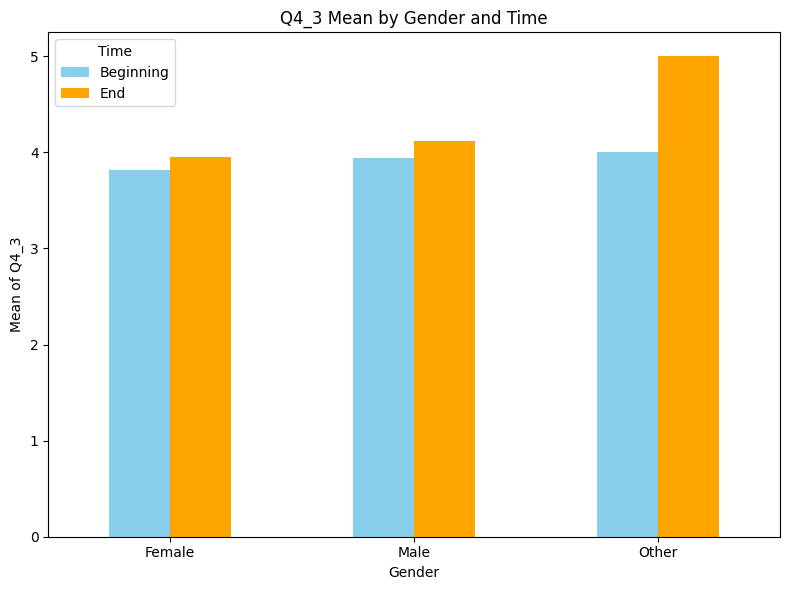

In [ ]:
# Q4_3: Bar plot to compare genders mean
grouped = data.groupby(["Gender", "B/E?"])["Q4_3"].mean().unstack()

# Plot
grouped.plot(kind='bar', figsize=(8, 6), color=["skyblue", "orange"])

plt.title("Q4_3 Mean by Gender and Time")
plt.xlabel("Gender")
plt.ylabel("Mean of Q4_3")
plt.legend(title="Time")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# overall Q4_4 Test Beginning vs End
begQ4_4overallALL = data[data["B/E?"] == "Beginning"]["Q4_4"].dropna()

endQ4_4overallALL = data[data["B/E?"] == "End"]["Q4_4"].dropna()

UTest(begQ4_4overallALL, endQ4_4overallALL)

Mann-Whitney U-Value: 1469.0
P-value: 0.3559328151627398
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_4
# mean for Q4_4
Q4_4_result = data.groupby(["Gender", "B/E?"])["Q4_4"].mean()
print("Q4_4 Mean")
print(Q4_4_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()
male_beginning_Q4_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()
other_beginning_Q4_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()

female_end_Q4_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_4"].dropna()
male_end_Q4_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_4"].dropna()
other_end_Q4_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_4"].dropna()

# Q4_4: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_4 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_4, male_beginning_Q4_4, other_beginning_Q4_4)

# Q4_4: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_4 3 Genders in the End:")
kruskalTest(female_end_Q4_4, male_end_Q4_4, other_end_Q4_4)

# Q4_4: U-Test comparing genders in the beginning
print()
print("Q4_4 Genders in the Beginning:")
UTest(female_beginning_Q4_4, male_beginning_Q4_4)

# Q4_4: U-Test comparing genders in the end
print()
print("Q4_4 Genders in the End:")
UTest(female_end_Q4_4, male_end_Q4_4)

# Q4_4 U-Test comparing females in the beginning vs end
print()
print("Q4_4 Females:")
UTest(female_beginning_Q4_4, female_end_Q4_4)

# Q4_4 U-Test comparing males in the beginning vs end
print()
print("Q4_4 Males:")
UTest(male_beginning_Q4_4, male_end_Q4_4)

# Q4_4 U-Test comparing other genders in the beginning vs end
print()
print("Q4_4 Males:")
UTest(other_beginning_Q4_4, other_end_Q4_4)

Q4_4 Mean
Gender  B/E?     
Female  Beginning    3.772727
        End          3.952381
Male    Beginning    4.055556
        End          4.121212
Other   Beginning    4.000000
        End          5.000000
Name: Q4_4, dtype: float64 

Q4_4 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.019333460927876
P-value: 0.36434038289076043
Fail to reject the null hypothesis: No significant differences exists

Q4_4 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.7236376304045677
P-value: 0.4223931281941049
Fail to reject the null hypothesis: No significant differences exists

Q4_4 Genders in the Beginning:
Mann-Whitney U-Value: 314.0
P-value: 0.16216326490125244
Fail to reject the null hypothesis: No significant differences exists

Q4_4 Genders in the End:
Mann-Whitney U-Value: 314.5
P-value: 0.5532104672380669
Fail to reject the null hypothesis: No significant differences exists

Q4_4 Females:
Mann-Whitney U-Value: 201.0
P-value: 0.4480937375044277
Fail to reject the null hypoth

In [ ]:
# overall Q4_5 Test Beginning vs End
begQ4_5overallALL = data[data["B/E?"] == "Beginning"]["Q4_5"].dropna()

endQ4_5overallALL = data[data["B/E?"] == "End"]["Q4_5"].dropna()

UTest(begQ4_5overallALL, endQ4_5overallALL)

Mann-Whitney U-Value: 1396.0
P-value: 0.22008109845629242
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_5
# mean for Q4_5
Q4_5_result = data.groupby(["Gender", "B/E?"])["Q4_5"].mean()
print("Q4_5 Mean")
print(Q4_5_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()
male_beginning_Q4_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()
other_beginning_Q4_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()

female_end_Q4_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_5"].dropna()
male_end_Q4_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_5"].dropna()
other_end_Q4_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_5"].dropna()

# Q4_5: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_5 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_5, male_beginning_Q4_5, other_beginning_Q4_5)

# Q4_5: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_5 3 Genders in the End:")
kruskalTest(female_end_Q4_5, male_end_Q4_5, other_end_Q4_5)

# Q4_5: U-Test comparing genders in the beginning
print()
print("Q4_5 Genders in the Beginning:")
UTest(female_beginning_Q4_5, male_beginning_Q4_5)

# Q4_5: U-Test comparing genders in the end
print()
print("Q4_5 Genders in the End:")
UTest(female_end_Q4_5, male_end_Q4_5)

# Q4_5 U-Test comparing females in the beginning vs end
print()
print("Q4_5 Females:")
UTest(female_beginning_Q4_5, female_end_Q4_5)

# Q4_5 U-Test comparing males in the beginning vs end
print()
print("Q4_5 Males:")
UTest(male_beginning_Q4_5, male_end_Q4_5)

# Q4_5 U-Test comparing other genders in the beginning vs end
print()
print("Q4_5 Males:")
UTest(other_beginning_Q4_5, other_end_Q4_5)

Q4_5 Mean
Gender  B/E?     
Female  Beginning    4.047619
        End          3.952381
Male    Beginning    3.833333
        End          4.121212
Other   Beginning    4.000000
        End          5.000000
Name: Q4_5, dtype: float64 

Q4_5 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.7655570565289979
P-value: 0.6819639182946862
Fail to reject the null hypothesis: No significant differences exists

Q4_5 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.6612126523782793
P-value: 0.4357849783560014
Fail to reject the null hypothesis: No significant differences exists

Q4_5 Genders in the Beginning:
Mann-Whitney U-Value: 425.5
P-value: 0.39350157532483265
Fail to reject the null hypothesis: No significant differences exists

Q4_5 Genders in the End:
Mann-Whitney U-Value: 318.0
P-value: 0.5969210617846721
Fail to reject the null hypothesis: No significant differences exists

Q4_5 Females:
Mann-Whitney U-Value: 225.0
P-value: 0.9146844675974994
Fail to reject the null hypoth

In [ ]:
# overall Q4_6 Test Beginning vs End
begQ4_6overallALL = data[data["B/E?"] == "Beginning"]["Q4_6"].dropna()

endQ4_6overallALL = data[data["B/E?"] == "End"]["Q4_6"].dropna()

UTest(begQ4_6overallALL, endQ4_6overallALL)

Mann-Whitney U-Value: 1308.5
P-value: 0.05964171103467437
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_6
# mean for Q4_6
Q4_6_result = data.groupby(["Gender", "B/E?"])["Q4_6"].mean()
print("Q4_6 Mean")
print(Q4_6_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()
male_beginning_Q4_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()
other_beginning_Q4_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()

female_end_Q4_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_6"].dropna()
male_end_Q4_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_6"].dropna()
other_end_Q4_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_6"].dropna()

# Q4_6: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_6 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_6, male_beginning_Q4_6, other_beginning_Q4_6)

# Q4_6: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_6 3 Genders in the End:")
kruskalTest(female_end_Q4_6, male_end_Q4_6, other_end_Q4_6)

# Q4_6: U-Test comparing genders in the beginning
print()
print("Q4_6 Genders in the Beginning:")
UTest(female_beginning_Q4_6, male_beginning_Q4_6)

# Q4_6: U-Test comparing genders in the end
print()
print("Q4_6 Genders in the End:")
UTest(female_end_Q4_6, male_end_Q4_6)

# Q4_6 U-Test comparing females in the beginning vs end
print()
print("Q4_6 Females:")
UTest(female_beginning_Q4_6, female_end_Q4_6)

# Q4_6 U-Test comparing males in the beginning vs end
print()
print("Q4_6 Males:")
UTest(male_beginning_Q4_6, male_end_Q4_6)

# Q4_6 U-Test comparing other genders in the beginning vs end
print()
print("Q4_6 Males:")
UTest(other_beginning_Q4_6, other_end_Q4_6)

Q4_6 Mean
Gender  B/E?     
Female  Beginning    3.636364
        End          3.857143
Male    Beginning    3.638889
        End          4.000000
Other   Beginning    4.000000
        End          5.000000
Name: Q4_6, dtype: float64 

Q4_6 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.29270438393817566
P-value: 0.8638534073699722
Fail to reject the null hypothesis: No significant differences exists

Q4_6 3 Genders in the End:
Kruskal-Wallis H-Statistic: 2.188503590108239
P-value: 0.33479000479989357
Fail to reject the null hypothesis: No significant differences exists

Q4_6 Genders in the Beginning:
Mann-Whitney U-Value: 384.5
P-value: 0.8507837638512737
Fail to reject the null hypothesis: No significant differences exists

Q4_6 Genders in the End:
Mann-Whitney U-Value: 305.5
P-value: 0.4472376748310368
Fail to reject the null hypothesis: No significant differences exists

Q4_6 Females:
Mann-Whitney U-Value: 199.5
P-value: 0.41949083683921873
Fail to reject the null hypot

In [ ]:
# overall Q4_7 Test Beginning vs End
begQ4_7overallALL = data[data["B/E?"] == "Beginning"]["Q4_7"].dropna()

endQ4_7overallALL = data[data["B/E?"] == "End"]["Q4_7"].dropna()

UTest(begQ4_7overallALL, endQ4_7overallALL)

Mann-Whitney U-Value: 1416.5
P-value: 0.21926130373218555
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_7
# mean for Q4_7
Q4_7_result = data.groupby(["Gender", "B/E?"])["Q4_7"].mean()
print("Q4_7 Mean")
print(Q4_7_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()
male_beginning_Q4_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()
other_beginning_Q4_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()

female_end_Q4_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_7"].dropna()
male_end_Q4_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_7"].dropna()
other_end_Q4_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_7"].dropna()

# Q4_7: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_7 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_7, male_beginning_Q4_7, other_beginning_Q4_7)

# Q4_7: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_7 3 Genders in the End:")
kruskalTest(female_end_Q4_7, male_end_Q4_7, other_end_Q4_7)

# Q4_7: U-Test comparing genders in the beginning
print()
print("Q4_7 Genders in the Beginning:")
UTest(female_beginning_Q4_7, male_beginning_Q4_7)

# Q4_7: U-Test comparing genders in the end
print()
print("Q4_7 Genders in the End:")
UTest(female_end_Q4_7, male_end_Q4_7)

# Q4_7 U-Test comparing females in the beginning vs end
print()
print("Q4_7 Females:")
UTest(female_beginning_Q4_7, female_end_Q4_7)

# Q4_7 U-Test comparing males in the beginning vs end
print()
print("Q4_7 Males:")
UTest(male_beginning_Q4_7, male_end_Q4_7)

# Q4_7 U-Test comparing other genders in the beginning vs end
print()
print("Q4_7 Males:")
UTest(other_beginning_Q4_7, other_end_Q4_7)

Q4_7 Mean
Gender  B/E?     
Female  Beginning    3.727273
        End          3.904762
Male    Beginning    3.861111
        End          4.212121
Other   Beginning    4.000000
        End          4.000000
Name: Q4_7, dtype: float64 

Q4_7 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.24169518720368977
P-value: 0.8861690071280931
Fail to reject the null hypothesis: No significant differences exists

Q4_7 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.1509235907137194
P-value: 0.5624450743018232
Fail to reject the null hypothesis: No significant differences exists

Q4_7 Genders in the Beginning:
Mann-Whitney U-Value: 367.0
P-value: 0.6334871735472738
Fail to reject the null hypothesis: No significant differences exists

Q4_7 Genders in the End:
Mann-Whitney U-Value: 291.5
P-value: 0.30320677406836205
Fail to reject the null hypothesis: No significant differences exists

Q4_7 Females:
Mann-Whitney U-Value: 212.5
P-value: 0.64607851901199
Fail to reject the null hypothe

In [ ]:
# overall Q4_8 Test Beginning vs End
begQ4_8overallALL = data[data["B/E?"] == "Beginning"]["Q4_8"].dropna()

endQ4_8overallALL = data[data["B/E?"] == "End"]["Q4_8"].dropna()

UTest(begQ4_8overallALL, endQ4_8overallALL)

Mann-Whitney U-Value: 1456.0
P-value: 0.30613377970814626
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_8
# mean for Q4_8
Q4_8_result = data.groupby(["Gender", "B/E?"])["Q4_8"].mean()
print("Q4_8 Mean")
print(Q4_8_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()
male_beginning_Q4_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()
other_beginning_Q4_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()

female_end_Q4_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_8"].dropna()
male_end_Q4_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_8"].dropna()
other_end_Q4_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_8"].dropna()

# Q4_8: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_8 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_8, male_beginning_Q4_8, other_beginning_Q4_8)

# Q4_8: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_8 3 Genders in the End:")
kruskalTest(female_end_Q4_8, male_end_Q4_8, other_end_Q4_8)

# Q4_8: U-Test comparing genders in the beginning
print()
print("Q4_8 Genders in the Beginning:")
UTest(female_beginning_Q4_8, male_beginning_Q4_8)

# Q4_8: U-Test comparing genders in the end
print()
print("Q4_8 Genders in the End:")
UTest(female_end_Q4_8, male_end_Q4_8)

# Q4_8 U-Test comparing females in the beginning vs end
print()
print("Q4_8 Females:")
UTest(female_beginning_Q4_8, female_end_Q4_8)

# Q4_8 U-Test comparing males in the beginning vs end
print()
print("Q4_8 Males:")
UTest(male_beginning_Q4_8, male_end_Q4_8)

# Q4_8 U-Test comparing other genders in the beginning vs end
print()
print("Q4_8 Males:")
UTest(other_beginning_Q4_8, other_end_Q4_8)

Q4_8 Mean
Gender  B/E?     
Female  Beginning    3.954545
        End          4.047619
Male    Beginning    4.083333
        End          4.303030
Other   Beginning    4.000000
        End          5.000000
Name: Q4_8, dtype: float64 

Q4_8 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.9961385822689016
P-value: 0.6077028250254315
Fail to reject the null hypothesis: No significant differences exists

Q4_8 3 Genders in the End:
Kruskal-Wallis H-Statistic: 3.341050352166317
P-value: 0.18814822873780843
Fail to reject the null hypothesis: No significant differences exists

Q4_8 Genders in the Beginning:
Mann-Whitney U-Value: 339.5
P-value: 0.3339387188239056
Fail to reject the null hypothesis: No significant differences exists

Q4_8 Genders in the End:
Mann-Whitney U-Value: 276.0
P-value: 0.17238271172833053
Fail to reject the null hypothesis: No significant differences exists

Q4_8 Females:
Mann-Whitney U-Value: 214.5
P-value: 0.6681376505565901
Fail to reject the null hypoth

In [ ]:
# overall Q4_9 Test Beginning vs End
begQ4_9overallALL = data[data["B/E?"] == "Beginning"]["Q4_9"].dropna()

endQ4_9overallALL = data[data["B/E?"] == "End"]["Q4_9"].dropna()

UTest(begQ4_9overallALL, endQ4_9overallALL)

Mann-Whitney U-Value: 1426.5
P-value: 0.2368571190684503
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_9
# mean for Q4_9
Q4_9_result = data.groupby(["Gender", "B/E?"])["Q4_9"].mean()
print("Q4_9 Mean")
print(Q4_9_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()
male_beginning_Q4_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()
other_beginning_Q4_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()

female_end_Q4_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_9"].dropna()
male_end_Q4_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_9"].dropna()
other_end_Q4_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_9"].dropna()

# Q4_9: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_9 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_9, male_beginning_Q4_9, other_beginning_Q4_9)

# Q4_9: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_9 3 Genders in the End:")
kruskalTest(female_end_Q4_9, male_end_Q4_9, other_end_Q4_9)

# Q4_9: U-Test comparing genders in the beginning
print()
print("Q4_9 Genders in the Beginning:")
UTest(female_beginning_Q4_9, male_beginning_Q4_9)

# Q4_9: U-Test comparing genders in the end
print()
print("Q4_9 Genders in the End:")
UTest(female_end_Q4_9, male_end_Q4_9)

# Q4_9 U-Test comparing females in the beginning vs end
print()
print("Q4_9 Females:")
UTest(female_beginning_Q4_9, female_end_Q4_9)

# Q4_9 U-Test comparing males in the beginning vs end
print()
print("Q4_9 Males:")
UTest(male_beginning_Q4_9, male_end_Q4_9)

# Q4_9 U-Test comparing other genders in the beginning vs end
print()
print("Q4_9 Males:")
UTest(other_beginning_Q4_9, other_end_Q4_9)

Q4_9 Mean
Gender  B/E?     
Female  Beginning    3.500000
        End          3.809524
Male    Beginning    3.944444
        End          4.151515
Other   Beginning    4.000000
        End          4.000000
Name: Q4_9, dtype: float64 

Q4_9 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 4.284987147327269
P-value: 0.11736182748356427
Fail to reject the null hypothesis: No significant differences exists

Q4_9 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.5675902006452496
P-value: 0.45666961149365093
Fail to reject the null hypothesis: No significant differences exists

Q4_9 Genders in the Beginning:
Mann-Whitney U-Value: 276.5
P-value: 0.04208841557826136
Reject the null hypothesis: Significant differences exists

Q4_9 Genders in the End:
Mann-Whitney U-Value: 281.0
P-value: 0.2191105447979571
Fail to reject the null hypothesis: No significant differences exists

Q4_9 Females:
Mann-Whitney U-Value: 189.0
P-value: 0.29125497553700586
Fail to reject the null hypothesis: No 

In [ ]:
# overall Q4_10 Test Beginning vs End
begQ4_10overallALL = data[data["B/E?"] == "Beginning"]["Q4_10"].dropna()

endQ4_10overallALL = data[data["B/E?"] == "End"]["Q4_10"].dropna()

UTest(begQ4_10overallALL, endQ4_10overallALL)

Mann-Whitney U-Value: 1513.0
P-value: 0.49285790901730453
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_10
# mean for Q4_10
Q4_10_result = data.groupby(["Gender", "B/E?"])["Q4_10"].mean()
print("Q4_10 Mean")
print(Q4_10_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()
male_beginning_Q4_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()
other_beginning_Q4_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()

female_end_Q4_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_10"].dropna()
male_end_Q4_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_10"].dropna()
other_end_Q4_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_10"].dropna()

# Q4_10: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_10 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_10, male_beginning_Q4_10, other_beginning_Q4_10)

# Q4_10: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_10 3 Genders in the End:")
kruskalTest(female_end_Q4_10, male_end_Q4_10, other_end_Q4_10)

# Q4_10: U-Test comparing genders in the beginning
print()
print("Q4_10 Genders in the Beginning:")
UTest(female_beginning_Q4_10, male_beginning_Q4_10)

# Q4_10: U-Test comparing genders in the end
print()
print("Q4_10 Genders in the End:")
UTest(female_end_Q4_10, male_end_Q4_10)

# Q4_10 U-Test comparing females in the beginning vs end
print()
print("Q4_10 Females:")
UTest(female_beginning_Q4_10, female_end_Q4_10)

# Q4_10 U-Test comparing males in the beginning vs end
print()
print("Q4_10 Males:")
UTest(male_beginning_Q4_10, male_end_Q4_10)

# Q4_10 U-Test comparing other genders in the beginning vs end
print()
print("Q4_10 Males:")
UTest(other_beginning_Q4_10, other_end_Q4_10)

Q4_10 Mean
Gender  B/E?     
Female  Beginning    4.181818
        End          4.333333
Male    Beginning    4.305556
        End          4.303030
Other   Beginning    4.000000
        End          5.000000
Name: Q4_10, dtype: float64 

Q4_10 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.9297561105185425
P-value: 0.6282117076327235
Fail to reject the null hypothesis: No significant differences exists

Q4_10 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.1756025409744846
P-value: 0.5555474414008543
Fail to reject the null hypothesis: No significant differences exists

Q4_10 Genders in the Beginning:
Mann-Whitney U-Value: 350.0
P-value: 0.41465524770831597
Fail to reject the null hypothesis: No significant differences exists

Q4_10 Genders in the End:
Mann-Whitney U-Value: 353.0
P-value: 0.9065471791705312
Fail to reject the null hypothesis: No significant differences exists

Q4_10 Females:
Mann-Whitney U-Value: 199.0
P-value: 0.3871762992148484
Fail to reject the null

In [ ]:
# overall Q4_11 Test Beginning vs End
begQ4_11overallALL = data[data["B/E?"] == "Beginning"]["Q4_11"].dropna()

endQ4_11overallALL = data[data["B/E?"] == "End"]["Q4_11"].dropna()

UTest(begQ4_11overallALL, endQ4_11overallALL)

Mann-Whitney U-Value: 1584.0
P-value: 0.8145904889220611
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_11
# mean for Q4_11
Q4_11_result = data.groupby(["Gender", "B/E?"])["Q4_11"].mean()
print("Q4_11 Mean")
print(Q4_11_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()
male_beginning_Q4_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()
other_beginning_Q4_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()

female_end_Q4_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_11"].dropna()
male_end_Q4_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_11"].dropna()
other_end_Q4_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_11"].dropna()

# Q4_11: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_11 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_11, male_beginning_Q4_11, other_beginning_Q4_11)

# Q4_11: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_11 3 Genders in the End:")
kruskalTest(female_end_Q4_11, male_end_Q4_11, other_end_Q4_11)

# Q4_11: U-Test comparing genders in the beginning
print()
print("Q4_11 Genders in the Beginning:")
UTest(female_beginning_Q4_11, male_beginning_Q4_11)

# Q4_11: U-Test comparing genders in the end
print()
print("Q4_11 Genders in the End:")
UTest(female_end_Q4_11, male_end_Q4_11)

# Q4_11 U-Test comparing females in the beginning vs end
print()
print("Q4_11 Females:")
UTest(female_beginning_Q4_11, female_end_Q4_11)

# Q4_11 U-Test comparing males in the beginning vs end
print()
print("Q4_11 Males:")
UTest(male_beginning_Q4_11, male_end_Q4_11)

# Q4_11 U-Test comparing other genders in the beginning vs end
print()
print("Q4_11 Males:")
UTest(other_beginning_Q4_11, other_end_Q4_11)

Q4_11 Mean
Gender  B/E?     
Female  Beginning    4.136364
        End          4.333333
Male    Beginning    4.333333
        End          4.272727
Other   Beginning    4.000000
        End          5.000000
Name: Q4_11, dtype: float64 

Q4_11 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.1391077772991425
P-value: 0.3431615715486749
Fail to reject the null hypothesis: No significant differences exists

Q4_11 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.0577408883684476
P-value: 0.5892702074859362
Fail to reject the null hypothesis: No significant differences exists

Q4_11 Genders in the Beginning:
Mann-Whitney U-Value: 318.5
P-value: 0.17953058697413737
Fail to reject the null hypothesis: No significant differences exists

Q4_11 Genders in the End:
Mann-Whitney U-Value: 360.0
P-value: 0.8019377970994256
Fail to reject the null hypothesis: No significant differences exists

Q4_11 Females:
Mann-Whitney U-Value: 195.0
P-value: 0.34896597749442415
Fail to reject the nul

In [ ]:
# overall Q4_12 Test Beginning vs End
begQ4_12overallALL = data[data["B/E?"] == "Beginning"]["Q4_12"].dropna()

endQ4_12overallALL = data[data["B/E?"] == "End"]["Q4_12"].dropna()

UTest(begQ4_12overallALL, endQ4_12overallALL)

Mann-Whitney U-Value: 1316.5
P-value: 0.06565619982541857
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_12
# mean for Q4_12
Q4_12_result = data.groupby(["Gender", "B/E?"])["Q4_12"].mean()
print("Q4_12 Mean")
print(Q4_12_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()
male_beginning_Q4_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()
other_beginning_Q4_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()

female_end_Q4_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_12"].dropna()
male_end_Q4_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_12"].dropna()
other_end_Q4_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_12"].dropna()

# Q4_12: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_12 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_12, male_beginning_Q4_12, other_beginning_Q4_12)

# Q4_12: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_12 3 Genders in the End:")
kruskalTest(female_end_Q4_12, male_end_Q4_12, other_end_Q4_12)

# Q4_12: U-Test comparing genders in the beginning
print()
print("Q4_12 Genders in the Beginning:")
UTest(female_beginning_Q4_12, male_beginning_Q4_12)

# Q4_12: U-Test comparing genders in the end
print()
print("Q4_12 Genders in the End:")
UTest(female_end_Q4_12, male_end_Q4_12)

# Q4_12 U-Test comparing females in the beginning vs end
print()
print("Q4_12 Females:")
UTest(female_beginning_Q4_12, female_end_Q4_12)

# Q4_12 U-Test comparing males in the beginning vs end
print()
print("Q4_12 Males:")
UTest(male_beginning_Q4_12, male_end_Q4_12)

# Q4_12 U-Test comparing other genders in the beginning vs end
print()
print("Q4_12 Males:")
UTest(other_beginning_Q4_12, other_end_Q4_12)

Q4_12 Mean
Gender  B/E?     
Female  Beginning    3.545455
        End          4.095238
Male    Beginning    3.833333
        End          4.090909
Other   Beginning    4.000000
        End          5.000000
Name: Q4_12, dtype: float64 

Q4_12 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.1058567677750115
P-value: 0.575262751235882
Fail to reject the null hypothesis: No significant differences exists

Q4_12 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.577748210306362
P-value: 0.454356064562335
Fail to reject the null hypothesis: No significant differences exists

Q4_12 Genders in the Beginning:
Mann-Whitney U-Value: 335.0
P-value: 0.3081649081130845
Fail to reject the null hypothesis: No significant differences exists

Q4_12 Genders in the End:
Mann-Whitney U-Value: 346.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Q4_12 Females:
Mann-Whitney U-Value: 165.5
P-value: 0.09214090283387621
Fail to reject the null hypothesis: No si

In [ ]:
# overall Q4_13 Test Beginning vs End
begQ4_13overallALL = data[data["B/E?"] == "Beginning"]["Q4_13"].dropna()

endQ4_13overallALL = data[data["B/E?"] == "End"]["Q4_13"].dropna()

UTest(begQ4_13overallALL, endQ4_13overallALL)

Mann-Whitney U-Value: 1324.5
P-value: 0.07537730763852282
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_13
# mean for Q4_13
Q4_13_result = data.groupby(["Gender", "B/E?"])["Q4_13"].mean()
print("Q4_13 Mean")
print(Q4_13_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()
male_beginning_Q4_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()
other_beginning_Q4_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()

female_end_Q4_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_13"].dropna()
male_end_Q4_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_13"].dropna()
other_end_Q4_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_13"].dropna()

# Q4_13: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_13 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_13, male_beginning_Q4_13, other_beginning_Q4_13)

# Q4_13: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_13 3 Genders in the End:")
kruskalTest(female_end_Q4_13, male_end_Q4_13, other_end_Q4_13)

# Q4_13: U-Test comparing genders in the beginning
print()
print("Q4_13 Genders in the Beginning:")
UTest(female_beginning_Q4_13, male_beginning_Q4_13)

# Q4_13: U-Test comparing genders in the end
print()
print("Q4_13 Genders in the End:")
UTest(female_end_Q4_13, male_end_Q4_13)

# Q4_13 U-Test comparing females in the beginning vs end
print()
print("Q4_13 Females:")
UTest(female_beginning_Q4_13, female_end_Q4_13)

# Q4_13 U-Test comparing males in the beginning vs end
print()
print("Q4_13 Males:")
UTest(male_beginning_Q4_13, male_end_Q4_13)

# Q4_13 U-Test comparing other genders in the beginning vs end
print()
print("Q4_13 Males:")
UTest(other_beginning_Q4_13, other_end_Q4_13)

Q4_13 Mean
Gender  B/E?     
Female  Beginning    3.681818
        End          3.666667
Male    Beginning    3.527778
        End          4.060606
Other   Beginning    4.000000
        End          5.000000
Name: Q4_13, dtype: float64 

Q4_13 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.4575801429636414
P-value: 0.7954955131718822
Fail to reject the null hypothesis: No significant differences exists

Q4_13 3 Genders in the End:
Kruskal-Wallis H-Statistic: 5.230549209062202
P-value: 0.07314769924812861
Fail to reject the null hypothesis: No significant differences exists

Q4_13 Genders in the Beginning:
Mann-Whitney U-Value: 423.5
P-value: 0.6501974111838453
Fail to reject the null hypothesis: No significant differences exists

Q4_13 Genders in the End:
Mann-Whitney U-Value: 247.5
P-value: 0.06305045660580404
Fail to reject the null hypothesis: No significant differences exists

Q4_13 Females:
Mann-Whitney U-Value: 235.5
P-value: 0.917399039036314
Fail to reject the null 

In [ ]:
# overall Q4_14 Test Beginning vs End
begQ4_14overallALL = data[data["B/E?"] == "Beginning"]["Q4_14"].dropna()

endQ4_14overallALL = data[data["B/E?"] == "End"]["Q4_14"].dropna()

UTest(begQ4_14overallALL, endQ4_14overallALL)

Mann-Whitney U-Value: 1582.0
P-value: 0.8096374829747957
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_14
# mean for Q4_14
Q4_14_result = data.groupby(["Gender", "B/E?"])["Q4_14"].mean()
print("Q4_14 Mean")
print(Q4_14_result, "\n")

# creates dataframes for all genders
female_beginning_Q4_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()
male_beginning_Q4_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()
other_beginning_Q4_14 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()

female_end_Q4_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_14"].dropna()
male_end_Q4_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_14"].dropna()
other_end_Q4_14 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q4_14"].dropna()

# Q4_14: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q4_14 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q4_14, male_beginning_Q4_14, other_beginning_Q4_14)

# Q4_14: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q4_14 3 Genders in the End:")
kruskalTest(female_end_Q4_14, male_end_Q4_14, other_end_Q4_14)

# Q4_14: U-Test comparing genders in the beginning
print()
print("Q4_14 Genders in the Beginning:")
UTest(female_beginning_Q4_14, male_beginning_Q4_14)

# Q4_14: U-Test comparing genders in the end
print()
print("Q4_14 Genders in the End:")
UTest(female_end_Q4_14, male_end_Q4_14)

# Q4_14 U-Test comparing females in the beginning vs end
print()
print("Q4_14 Females:")
UTest(female_beginning_Q4_14, female_end_Q4_14)

# Q4_14 U-Test comparing males in the beginning vs end
print()
print("Q4_14 Males:")
UTest(male_beginning_Q4_14, male_end_Q4_14)

# Q4_14 U-Test comparing other genders in the beginning vs end
print()
print("Q4_14 Males:")
UTest(other_beginning_Q4_14, other_end_Q4_14)

Q4_14 Mean
Gender  B/E?     
Female  Beginning    3.818182
        End          3.714286
Male    Beginning    4.027778
        End          4.151515
Other   Beginning    4.000000
        End          4.000000
Name: Q4_14, dtype: float64 

Q4_14 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.6372768727166844
P-value: 0.7271384085942946
Fail to reject the null hypothesis: No significant differences exists

Q4_14 3 Genders in the End:
Kruskal-Wallis H-Statistic: 1.5320004542815258
P-value: 0.46486872404211976
Fail to reject the null hypothesis: No significant differences exists

Q4_14 Genders in the Beginning:
Mann-Whitney U-Value: 349.5
P-value: 0.43625210544308146
Fail to reject the null hypothesis: No significant differences exists

Q4_14 Genders in the End:
Mann-Whitney U-Value: 282.0
P-value: 0.22668409500850217
Fail to reject the null hypothesis: No significant differences exists

Q4_14 Females:
Mann-Whitney U-Value: 236.5
P-value: 0.898660511541355
Fail to reject the nul

In [ ]:
# START OF QUESTION 25

In [ ]:
# overall Q25_1 Test Beginning vs End
begQ25_1overallALL = data[data["B/E?"] == "Beginning"]["Q25_1"].dropna()

endQ25_1overallALL = data[data["B/E?"] == "End"]["Q25_1"].dropna()

UTest(begQ25_1overallALL, endQ25_1overallALL)

Mann-Whitney U-Value: 1166.0
P-value: 0.11725372459711057
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_1
# mean for Q25_1
Q25_1_result = data.groupby(["Gender", "B/E?"])["Q25_1"].mean()
print("Q25_1 Mean")
print(Q25_1_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()
male_beginning_Q25_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()
other_beginning_Q25_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()

female_end_Q25_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_1"].dropna()
male_end_Q25_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_1"].dropna()
other_end_Q25_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_1"].dropna()

# Q25_1: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_1 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_1, male_beginning_Q25_1, other_beginning_Q25_1)

# Q25_1: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_1 3 Genders in the End:")
kruskalTest(female_end_Q25_1, male_end_Q25_1, other_end_Q25_1)

# Q25_1: U-Test comparing genders in the beginning
print()
print("Q25_1 Genders in the Beginning:")
UTest(female_beginning_Q25_1, male_beginning_Q25_1)

# Q25_1: U-Test comparing genders in the end
print()
print("Q25_1 Genders in the End:")
UTest(female_end_Q25_1, male_end_Q25_1)

# Q25_1 U-Test comparing females in the beginning vs end
print()
print("Q25_1 Females:")
UTest(female_beginning_Q25_1, female_end_Q25_1)

# Q25_1 U-Test comparing males in the beginning vs end
print()
print("Q25_1 Males:")
UTest(male_beginning_Q25_1, male_end_Q25_1)

# Q25_1 U-Test comparing other genders in the beginning vs end
print()
print("Q25_1 Males:")
UTest(other_beginning_Q25_1, other_end_Q25_1)

Q25_1 Mean
Gender  B/E?     
Female  Beginning    2.045455
        End          2.105263
Male    Beginning    1.818182
        End          2.366667
Other   Beginning    2.000000
        End               NaN
Name: Q25_1, dtype: float64 

Q25_1 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.9761316872428069
P-value: 0.6138124560772612
Fail to reject the null hypothesis: No significant differences exists

Q25_1 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_1 Genders in the Beginning:
Mann-Whitney U-Value: 414.5
P-value: 0.33515107905299657
Fail to reject the null hypothesis: No significant differences exists

Q25_1 Genders in the End:
Mann-Whitney U-Value: 254.0
P-value: 0.5066989333967207
Fail to reject the null hypothesis: No significant differences exists

Q25_1 Females:
Mann-Whitney U-Value: 208.0
P-value: 0.9887992845641935
Fail to reject the null hypothesis: No significant di

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_2 Test Beginning vs End
begQ25_2overallALL = data[data["B/E?"] == "Beginning"]["Q25_2"].dropna()

endQ25_2overallALL = data[data["B/E?"] == "End"]["Q25_2"].dropna()

UTest(begQ25_2overallALL, endQ25_2overallALL)

Mann-Whitney U-Value: 1242.5
P-value: 0.2333283098186194
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_2
# mean for Q25_2
Q25_2_result = data.groupby(["Gender", "B/E?"])["Q25_2"].mean()
print("Q25_2 Mean")
print(Q25_2_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()
male_beginning_Q25_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()
other_beginning_Q25_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()

female_end_Q25_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_2"].dropna()
male_end_Q25_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_2"].dropna()
other_end_Q25_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_2"].dropna()

# Q25_2: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_2 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_2, male_beginning_Q25_2, other_beginning_Q25_2)

# Q25_2: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_2 3 Genders in the End:")
kruskalTest(female_end_Q25_2, male_end_Q25_2, other_end_Q25_2)

# Q25_2: U-Test comparing genders in the beginning
print()
print("Q25_2 Genders in the Beginning:")
UTest(female_beginning_Q25_2, male_beginning_Q25_2)

# Q25_2: U-Test comparing genders in the end
print()
print("Q25_2 Genders in the End:")
UTest(female_end_Q25_2, male_end_Q25_2)

# Q25_2 U-Test comparing females in the beginning vs end
print()
print("Q25_2 Females:")
UTest(female_beginning_Q25_2, female_end_Q25_2)

# Q25_2 U-Test comparing males in the beginning vs end
print()
print("Q25_2 Males:")
UTest(male_beginning_Q25_2, male_end_Q25_2)

# Q25_2 U-Test comparing other genders in the beginning vs end
print()
print("Q25_2 Males:")
UTest(other_beginning_Q25_2, other_end_Q25_2)

Q25_2 Mean
Gender  B/E?     
Female  Beginning    2.727273
        End          2.947368
Male    Beginning    2.969697
        End          3.193548
Other   Beginning    2.500000
        End               NaN
Name: Q25_2, dtype: float64 

Q25_2 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.0675575352635482
P-value: 0.5863849653529122
Fail to reject the null hypothesis: No significant differences exists

Q25_2 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_2 Genders in the Beginning:
Mann-Whitney U-Value: 317.5
P-value: 0.4197338593380284
Fail to reject the null hypothesis: No significant differences exists

Q25_2 Genders in the End:
Mann-Whitney U-Value: 231.5
P-value: 0.18730014398145378
Fail to reject the null hypothesis: No significant differences exists

Q25_2 Females:
Mann-Whitney U-Value: 192.0
P-value: 0.6472528916632138
Fail to reject the null hypothesis: No significant di

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_3 Test Beginning vs End
begQ25_3overallALL = data[data["B/E?"] == "Beginning"]["Q25_3"].dropna()

endQ25_3overallALL = data[data["B/E?"] == "End"]["Q25_3"].dropna()

UTest(begQ25_3overallALL, endQ25_3overallALL)

Mann-Whitney U-Value: 1213.0
P-value: 0.12990980607049873
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_3
# mean for Q25_3
Q25_3_result = data.groupby(["Gender", "B/E?"])["Q25_3"].mean()
print("Q25_3 Mean")
print(Q25_3_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()
male_beginning_Q25_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()
other_beginning_Q25_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()

female_end_Q25_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_3"].dropna()
male_end_Q25_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_3"].dropna()
other_end_Q25_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_3"].dropna()

# Q25_3: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_3 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_3, male_beginning_Q25_3, other_beginning_Q25_3)

# Q25_3: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_3 3 Genders in the End:")
kruskalTest(female_end_Q25_3, male_end_Q25_3, other_end_Q25_3)

# Q25_3: U-Test comparing genders in the beginning
print()
print("Q25_3 Genders in the Beginning:")
UTest(female_beginning_Q25_3, male_beginning_Q25_3)

# Q25_3: U-Test comparing genders in the end
print()
print("Q25_3 Genders in the End:")
UTest(female_end_Q25_3, male_end_Q25_3)

# Q25_3 U-Test comparing females in the beginning vs end
print()
print("Q25_3 Females:")
UTest(female_beginning_Q25_3, female_end_Q25_3)

# Q25_3 U-Test comparing males in the beginning vs end
print()
print("Q25_3 Males:")
UTest(male_beginning_Q25_3, male_end_Q25_3)

# Q25_3 U-Test comparing other genders in the beginning vs end
print()
print("Q25_3 Males:")
UTest(other_beginning_Q25_3, other_end_Q25_3)

Q25_3 Mean
Gender  B/E?     
Female  Beginning    3.909091
        End          4.105263
Male    Beginning    3.848485
        End          4.032258
Other   Beginning    4.000000
        End               NaN
Name: Q25_3, dtype: float64 

Q25_3 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.2248829761024529
P-value: 0.8936496347604251
Fail to reject the null hypothesis: No significant differences exists

Q25_3 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_3 Genders in the Beginning:
Mann-Whitney U-Value: 380.0
P-value: 0.7526338170486817
Fail to reject the null hypothesis: No significant differences exists

Q25_3 Genders in the End:
Mann-Whitney U-Value: 310.5
P-value: 0.7115749765870649
Fail to reject the null hypothesis: No significant differences exists

Q25_3 Females:
Mann-Whitney U-Value: 175.0
P-value: 0.2968578173115003
Fail to reject the null hypothesis: No significant dif

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_4 Test Beginning vs End
begQ25_4overallALL = data[data["B/E?"] == "Beginning"]["Q25_4"].dropna()

endQ25_4overallALL = data[data["B/E?"] == "End"]["Q25_4"].dropna()

UTest(begQ25_4overallALL, endQ25_4overallALL)

Mann-Whitney U-Value: 1448.5
P-value: 0.8727903841993178
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_4
# mean for Q25_4
Q25_4_result = data.groupby(["Gender", "B/E?"])["Q25_4"].mean()
print("Q25_4 Mean")
print(Q25_4_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()
male_beginning_Q25_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()
other_beginning_Q25_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()

female_end_Q25_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_4"].dropna()
male_end_Q25_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_4"].dropna()
other_end_Q25_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_4"].dropna()

# Q25_4: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_4 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_4, male_beginning_Q25_4, other_beginning_Q25_4)

# Q25_4: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_4 3 Genders in the End:")
kruskalTest(female_end_Q25_4, male_end_Q25_4, other_end_Q25_4)

# Q25_4: U-Test comparing genders in the beginning
print()
print("Q25_4 Genders in the Beginning:")
UTest(female_beginning_Q25_4, male_beginning_Q25_4)

# Q25_4: U-Test comparing genders in the end
print()
print("Q25_4 Genders in the End:")
UTest(female_end_Q25_4, male_end_Q25_4)

# Q25_4 U-Test comparing females in the beginning vs end
print()
print("Q25_4 Females:")
UTest(female_beginning_Q25_4, female_end_Q25_4)

# Q25_4 U-Test comparing males in the beginning vs end
print()
print("Q25_4 Males:")
UTest(male_beginning_Q25_4, male_end_Q25_4)

# Q25_4 U-Test comparing other genders in the beginning vs end
print()
print("Q25_4 Males:")
UTest(other_beginning_Q25_4, other_end_Q25_4)

Q25_4 Mean
Gender  B/E?     
Female  Beginning    4.000000
        End          4.157895
Male    Beginning    4.060606
        End          3.903226
Other   Beginning    3.500000
        End               NaN
Name: Q25_4, dtype: float64 

Q25_4 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.210504197842137
P-value: 0.5459367792170429
Fail to reject the null hypothesis: No significant differences exists

Q25_4 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_4 Genders in the Beginning:
Mann-Whitney U-Value: 342.0
P-value: 0.7040478471789346
Fail to reject the null hypothesis: No significant differences exists

Q25_4 Genders in the End:
Mann-Whitney U-Value: 349.0
P-value: 0.19838917041335558
Fail to reject the null hypothesis: No significant differences exists

Q25_4 Females:
Mann-Whitney U-Value: 185.0
P-value: 0.4867523039768529
Fail to reject the null hypothesis: No significant dif

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_5 Test Beginning vs End
begQ25_5overallALL = data[data["B/E?"] == "Beginning"]["Q25_5"].dropna()

endQ25_5overallALL = data[data["B/E?"] == "End"]["Q25_5"].dropna()

UTest(begQ25_5overallALL, endQ25_5overallALL)

Mann-Whitney U-Value: 1441.0
P-value: 0.9141675790940895
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_5
# mean for Q25_5
Q25_5_result = data.groupby(["Gender", "B/E?"])["Q25_5"].mean()
print("Q25_5 Mean")
print(Q25_5_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()
male_beginning_Q25_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()
other_beginning_Q25_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()

female_end_Q25_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_5"].dropna()
male_end_Q25_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_5"].dropna()
other_end_Q25_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_5"].dropna()

# Q25_5: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_5 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_5, male_beginning_Q25_5, other_beginning_Q25_5)

# Q25_5: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_5 3 Genders in the End:")
kruskalTest(female_end_Q25_5, male_end_Q25_5, other_end_Q25_5)

# Q25_5: U-Test comparing genders in the beginning
print()
print("Q25_5 Genders in the Beginning:")
UTest(female_beginning_Q25_5, male_beginning_Q25_5)

# Q25_5: U-Test comparing genders in the end
print()
print("Q25_5 Genders in the End:")
UTest(female_end_Q25_5, male_end_Q25_5)

# Q25_5 U-Test comparing females in the beginning vs end
print()
print("Q25_5 Females:")
UTest(female_beginning_Q25_5, female_end_Q25_5)

# Q25_5 U-Test comparing males in the beginning vs end
print()
print("Q25_5 Males:")
UTest(male_beginning_Q25_5, male_end_Q25_5)

# Q25_5 U-Test comparing other genders in the beginning vs end
print()
print("Q25_5 Males:")
UTest(other_beginning_Q25_5, other_end_Q25_5)

Q25_5 Mean
Gender  B/E?     
Female  Beginning    4.136364
        End          4.157895
Male    Beginning    4.090909
        End          4.032258
Other   Beginning    4.000000
        End               NaN
Name: Q25_5, dtype: float64 

Q25_5 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.17458991303999782
P-value: 0.9164067556182965
Fail to reject the null hypothesis: No significant differences exists

Q25_5 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_5 Genders in the Beginning:
Mann-Whitney U-Value: 355.5
P-value: 0.8927238928172587
Fail to reject the null hypothesis: No significant differences exists

Q25_5 Genders in the End:
Mann-Whitney U-Value: 327.0
P-value: 0.4826351167751871
Fail to reject the null hypothesis: No significant differences exists

Q25_5 Females:
Mann-Whitney U-Value: 194.0
P-value: 0.6665150997258382
Fail to reject the null hypothesis: No significant di

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_6 Test Beginning vs End
begQ25_6overallALL = data[data["B/E?"] == "Beginning"]["Q25_6"].dropna()

endQ25_6overallALL = data[data["B/E?"] == "End"]["Q25_6"].dropna()

UTest(begQ25_6overallALL, endQ25_6overallALL)

Mann-Whitney U-Value: 1485.5
P-value: 0.6992858408442478
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_6
# mean for Q25_6
Q25_6_result = data.groupby(["Gender", "B/E?"])["Q25_6"].mean()
print("Q25_6 Mean")
print(Q25_6_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()
male_beginning_Q25_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()
other_beginning_Q25_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()

female_end_Q25_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_6"].dropna()
male_end_Q25_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_6"].dropna()
other_end_Q25_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_6"].dropna()

# Q25_6: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_6 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_6, male_beginning_Q25_6, other_beginning_Q25_6)

# Q25_6: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_6 3 Genders in the End:")
kruskalTest(female_end_Q25_6, male_end_Q25_6, other_end_Q25_6)

# Q25_6: U-Test comparing genders in the beginning
print()
print("Q25_6 Genders in the Beginning:")
UTest(female_beginning_Q25_6, male_beginning_Q25_6)

# Q25_6: U-Test comparing genders in the end
print()
print("Q25_6 Genders in the End:")
UTest(female_end_Q25_6, male_end_Q25_6)

# Q25_6 U-Test comparing females in the beginning vs end
print()
print("Q25_6 Females:")
UTest(female_beginning_Q25_6, female_end_Q25_6)

# Q25_6 U-Test comparing males in the beginning vs end
print()
print("Q25_6 Males:")
UTest(male_beginning_Q25_6, male_end_Q25_6)

# Q25_6 U-Test comparing other genders in the beginning vs end
print()
print("Q25_6 Males:")
UTest(other_beginning_Q25_6, other_end_Q25_6)

Q25_6 Mean
Gender  B/E?     
Female  Beginning    2.409091
        End          2.105263
Male    Beginning    2.666667
        End          2.677419
Other   Beginning    2.500000
        End               NaN
Name: Q25_6, dtype: float64 

Q25_6 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.4605677629374188
P-value: 0.7943080811494976
Fail to reject the null hypothesis: No significant differences exists

Q25_6 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_6 Genders in the Beginning:
Mann-Whitney U-Value: 325.5
P-value: 0.5077335636952222
Fail to reject the null hypothesis: No significant differences exists

Q25_6 Genders in the End:
Mann-Whitney U-Value: 214.5
P-value: 0.100349767559587
Fail to reject the null hypothesis: No significant differences exists

Q25_6 Females:
Mann-Whitney U-Value: 244.0
P-value: 0.34609440080625353
Fail to reject the null hypothesis: No significant dif

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_7 Test Beginning vs End
begQ25_7overallALL = data[data["B/E?"] == "Beginning"]["Q25_7"].dropna()

endQ25_7overallALL = data[data["B/E?"] == "End"]["Q25_7"].dropna()

UTest(begQ25_7overallALL, endQ25_7overallALL)

Mann-Whitney U-Value: 1276.0
P-value: 0.42332489176007104
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_7
# mean for Q25_7
Q25_7_result = data.groupby(["Gender", "B/E?"])["Q25_7"].mean()
print("Q25_7 Mean")
print(Q25_7_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()
male_beginning_Q25_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()
other_beginning_Q25_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()

female_end_Q25_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_7"].dropna()
male_end_Q25_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_7"].dropna()
other_end_Q25_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_7"].dropna()

# Q25_7: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_7 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_7, male_beginning_Q25_7, other_beginning_Q25_7)

# Q25_7: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_7 3 Genders in the End:")
kruskalTest(female_end_Q25_7, male_end_Q25_7, other_end_Q25_7)

# Q25_7: U-Test comparing genders in the beginning
print()
print("Q25_7 Genders in the Beginning:")
UTest(female_beginning_Q25_7, male_beginning_Q25_7)

# Q25_7: U-Test comparing genders in the end
print()
print("Q25_7 Genders in the End:")
UTest(female_end_Q25_7, male_end_Q25_7)

# Q25_7 U-Test comparing females in the beginning vs end
print()
print("Q25_7 Females:")
UTest(female_beginning_Q25_7, female_end_Q25_7)

# Q25_7 U-Test comparing males in the beginning vs end
print()
print("Q25_7 Males:")
UTest(male_beginning_Q25_7, male_end_Q25_7)

# Q25_7 U-Test comparing other genders in the beginning vs end
print()
print("Q25_7 Males:")
UTest(other_beginning_Q25_7, other_end_Q25_7)

Q25_7 Mean
Gender  B/E?     
Female  Beginning    2.818182
        End          2.777778
Male    Beginning    2.969697
        End          3.258065
Other   Beginning    2.500000
        End               NaN
Name: Q25_7, dtype: float64 

Q25_7 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.5717950397344846
P-value: 0.7513396093845855
Fail to reject the null hypothesis: No significant differences exists

Q25_7 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_7 Genders in the Beginning:
Mann-Whitney U-Value: 342.0
P-value: 0.7106873251656503
Fail to reject the null hypothesis: No significant differences exists

Q25_7 Genders in the End:
Mann-Whitney U-Value: 192.0
P-value: 0.05888675235354819
Fail to reject the null hypothesis: No significant differences exists

Q25_7 Females:
Mann-Whitney U-Value: 218.0
P-value: 0.5681943409488959
Fail to reject the null hypothesis: No significant di

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_8 Test Beginning vs End
begQ25_8overallALL = data[data["B/E?"] == "Beginning"]["Q25_8"].dropna()

endQ25_8overallALL = data[data["B/E?"] == "End"]["Q25_8"].dropna()

UTest(begQ25_8overallALL, endQ25_8overallALL)

Mann-Whitney U-Value: 1287.5
P-value: 0.3503943546246373
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_8
# mean for Q25_8
Q25_8_result = data.groupby(["Gender", "B/E?"])["Q25_8"].mean()
print("Q25_8 Mean")
print(Q25_8_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()
male_beginning_Q25_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()
other_beginning_Q25_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()

female_end_Q25_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_8"].dropna()
male_end_Q25_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_8"].dropna()
other_end_Q25_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_8"].dropna()

# Q25_8: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_8 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_8, male_beginning_Q25_8, other_beginning_Q25_8)

# Q25_8: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_8 3 Genders in the End:")
kruskalTest(female_end_Q25_8, male_end_Q25_8, other_end_Q25_8)

# Q25_8: U-Test comparing genders in the beginning
print()
print("Q25_8 Genders in the Beginning:")
UTest(female_beginning_Q25_8, male_beginning_Q25_8)

# Q25_8: U-Test comparing genders in the end
print()
print("Q25_8 Genders in the End:")
UTest(female_end_Q25_8, male_end_Q25_8)

# Q25_8 U-Test comparing females in the beginning vs end
print()
print("Q25_8 Females:")
UTest(female_beginning_Q25_8, female_end_Q25_8)

# Q25_8 U-Test comparing males in the beginning vs end
print()
print("Q25_8 Males:")
UTest(male_beginning_Q25_8, male_end_Q25_8)

# Q25_8 U-Test comparing other genders in the beginning vs end
print()
print("Q25_8 Males:")
UTest(other_beginning_Q25_8, other_end_Q25_8)

Q25_8 Mean
Gender  B/E?     
Female  Beginning    1.500000
        End          1.473684
Male    Beginning    1.909091
        End          2.193548
Other   Beginning    1.500000
        End               NaN
Name: Q25_8, dtype: float64 

Q25_8 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.3751998095432483
P-value: 0.30495230099916215
Fail to reject the null hypothesis: No significant differences exists

Q25_8 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_8 Genders in the Beginning:
Mann-Whitney U-Value: 283.5
P-value: 0.1308631669280472
Fail to reject the null hypothesis: No significant differences exists

Q25_8 Genders in the End:
Mann-Whitney U-Value: 185.5
P-value: 0.019947440356704312
Reject the null hypothesis: Significant differences exists

Q25_8 Females:
Mann-Whitney U-Value: 209.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Q25_8 

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_9 Test Beginning vs End
begQ25_9overallALL = data[data["B/E?"] == "Beginning"]["Q25_9"].dropna()

endQ25_9overallALL = data[data["B/E?"] == "End"]["Q25_9"].dropna()

UTest(begQ25_9overallALL, endQ25_9overallALL)

Mann-Whitney U-Value: 1435.5
P-value: 0.9484680702369896
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_9
# mean for Q25_9
Q25_9_result = data.groupby(["Gender", "B/E?"])["Q25_9"].mean()
print("Q25_9 Mean")
print(Q25_9_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()
male_beginning_Q25_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()
other_beginning_Q25_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()

female_end_Q25_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_9"].dropna()
male_end_Q25_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_9"].dropna()
other_end_Q25_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_9"].dropna()

# Q25_9: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_9 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_9, male_beginning_Q25_9, other_beginning_Q25_9)

# Q25_9: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_9 3 Genders in the End:")
kruskalTest(female_end_Q25_9, male_end_Q25_9, other_end_Q25_9)

# Q25_9: U-Test comparing genders in the beginning
print()
print("Q25_9 Genders in the Beginning:")
UTest(female_beginning_Q25_9, male_beginning_Q25_9)

# Q25_9: U-Test comparing genders in the end
print()
print("Q25_9 Genders in the End:")
UTest(female_end_Q25_9, male_end_Q25_9)

# Q25_9 U-Test comparing females in the beginning vs end
print()
print("Q25_9 Females:")
UTest(female_beginning_Q25_9, female_end_Q25_9)

# Q25_9 U-Test comparing males in the beginning vs end
print()
print("Q25_9 Males:")
UTest(male_beginning_Q25_9, male_end_Q25_9)

# Q25_9 U-Test comparing other genders in the beginning vs end
print()
print("Q25_9 Males:")
UTest(other_beginning_Q25_9, other_end_Q25_9)

Q25_9 Mean
Gender  B/E?     
Female  Beginning    2.272727
        End          2.157895
Male    Beginning    2.878788
        End          2.870968
Other   Beginning    2.000000
        End               NaN
Name: Q25_9, dtype: float64 

Q25_9 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 4.048658538641862
P-value: 0.13208240520521533
Fail to reject the null hypothesis: No significant differences exists

Q25_9 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_9 Genders in the Beginning:
Mann-Whitney U-Value: 257.0
P-value: 0.06063776180017671
Fail to reject the null hypothesis: No significant differences exists

Q25_9 Genders in the End:
Mann-Whitney U-Value: 196.0
P-value: 0.0427915363318304
Reject the null hypothesis: Significant differences exists

Q25_9 Females:
Mann-Whitney U-Value: 226.5
P-value: 0.6411202953712375
Fail to reject the null hypothesis: No significant differences e

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_10 Test Beginning vs End
begQ25_10overallALL = data[data["B/E?"] == "Beginning"]["Q25_10"].dropna()

endQ25_10overallALL = data[data["B/E?"] == "End"]["Q25_10"].dropna()

UTest(begQ25_10overallALL, endQ25_10overallALL)

Mann-Whitney U-Value: 1343.0
P-value: 0.5705662747587263
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_10
# mean for Q25_10
Q25_10_result = data.groupby(["Gender", "B/E?"])["Q25_10"].mean()
print("Q25_10 Mean")
print(Q25_10_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()
male_beginning_Q25_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()
other_beginning_Q25_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()

female_end_Q25_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_10"].dropna()
male_end_Q25_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_10"].dropna()
other_end_Q25_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_10"].dropna()

# Q25_10: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_10 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_10, male_beginning_Q25_10, other_beginning_Q25_10)

# Q25_10: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_10 3 Genders in the End:")
kruskalTest(female_end_Q25_10, male_end_Q25_10, other_end_Q25_10)

# Q25_10: U-Test comparing genders in the beginning
print()
print("Q25_10 Genders in the Beginning:")
UTest(female_beginning_Q25_10, male_beginning_Q25_10)

# Q25_10: U-Test comparing genders in the end
print()
print("Q25_10 Genders in the End:")
UTest(female_end_Q25_10, male_end_Q25_10)

# Q25_10 U-Test comparing females in the beginning vs end
print()
print("Q25_10 Females:")
UTest(female_beginning_Q25_10, female_end_Q25_10)

# Q25_10 U-Test comparing males in the beginning vs end
print()
print("Q25_10 Males:")
UTest(male_beginning_Q25_10, male_end_Q25_10)

# Q25_10 U-Test comparing other genders in the beginning vs end
print()
print("Q25_10 Males:")
UTest(other_beginning_Q25_10, other_end_Q25_10)

Q25_10 Mean
Gender  B/E?     
Female  Beginning    1.454545
        End          1.368421
Male    Beginning    1.909091
        End          2.225806
Other   Beginning    1.500000
        End               NaN
Name: Q25_10, dtype: float64 

Q25_10 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 2.064168503551301
P-value: 0.3562636430771503
Fail to reject the null hypothesis: No significant differences exists

Q25_10 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_10 Genders in the Beginning:
Mann-Whitney U-Value: 289.0
P-value: 0.15594355638564594
Fail to reject the null hypothesis: No significant differences exists

Q25_10 Genders in the End:
Mann-Whitney U-Value: 167.0
P-value: 0.0049424281459149845
Reject the null hypothesis: Significant differences exists

Q25_10 Females:
Mann-Whitney U-Value: 237.0
P-value: 0.3391456291288215
Fail to reject the null hypothesis: No significant diff

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


Q25_10: Male end Avg: 2.225806451612903
Q25_10 Female end Average: 1.368421052631579
1.2104298735028205
0.9296590385608261


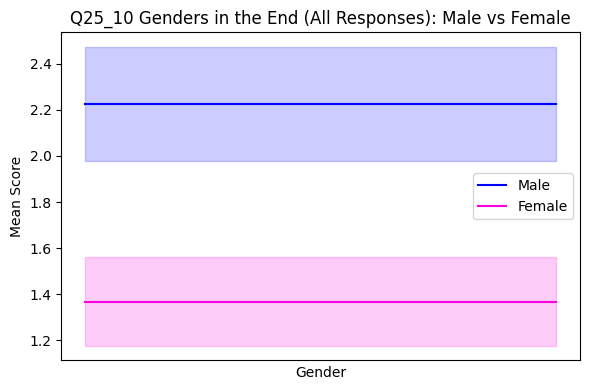

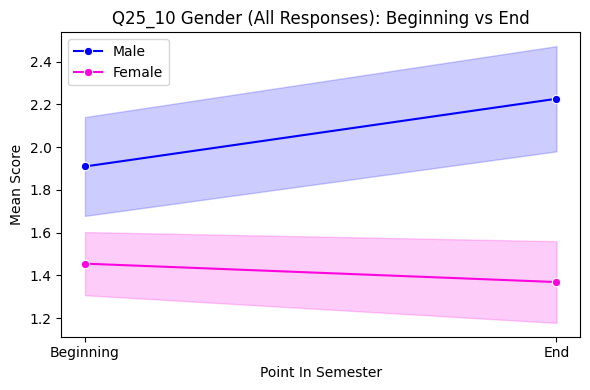

In [ ]:
# Q25_10: graphs and calculates mean and standard deviation for gender
male_end_Q25_10 = male_end_Q25_10.tolist()
female_end_Q25_10 = female_end_Q25_10.tolist()

Q25_10_MalelendAvg   = average_list(male_end_Q25_10)
Q25_10_FemaleendAvg   = average_list(female_end_Q25_10)

Q25_10_MaleendSTD = np.std(male_end_Q25_10)
Q25_10_FemaleendSTD = np.std(female_end_Q25_10)

print(f"Q25_10: Male end Avg: {Q25_10_MalelendAvg}")
print(f"Q25_10 Female end Average: {Q25_10_FemaleendAvg}")
print(Q25_10_MaleendSTD)
print(Q25_10_FemaleendSTD)

lineplot_gender("Q25_10 Genders in the End (All Responses)",
    begOverall=male_end_Q25_10,
    endOverall=female_end_Q25_10, band_factor=0.20
)
lineplot_beg_to_end_two("Q25_10 Gender (All Responses)", male_beginning_Q25_10, male_end_Q25_10, female_beginning_Q25_10, female_end_Q25_10, band_factor=0.2)


In [ ]:
# overall Q25_11 Test Beginning vs End
begQ25_11overallALL = data[data["B/E?"] == "Beginning"]["Q25_11"].dropna()

endQ25_11overallALL = data[data["B/E?"] == "End"]["Q25_11"].dropna()

UTest(begQ25_11overallALL, endQ25_11overallALL)

Mann-Whitney U-Value: 1280.5
P-value: 0.4484692165759139
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_11
# mean for Q25_11
Q25_11_result = data.groupby(["Gender", "B/E?"])["Q25_11"].mean()
print("Q25_11 Mean")
print(Q25_11_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()
male_beginning_Q25_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()
other_beginning_Q25_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()

female_end_Q25_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_11"].dropna()
male_end_Q25_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_11"].dropna()
other_end_Q25_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_11"].dropna()

# Q25_11: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_11 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_11, male_beginning_Q25_11, other_beginning_Q25_11)

# Q25_11: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_11 3 Genders in the End:")
kruskalTest(female_end_Q25_11, male_end_Q25_11, other_end_Q25_11)

# Q25_11: U-Test comparing genders in the beginning
print()
print("Q25_11 Genders in the Beginning:")
UTest(female_beginning_Q25_11, male_beginning_Q25_11)

# Q25_11: U-Test comparing genders in the end
print()
print("Q25_11 Genders in the End:")
UTest(female_end_Q25_11, male_end_Q25_11)

# Q25_11 U-Test comparing females in the beginning vs end
print()
print("Q25_11 Females:")
UTest(female_beginning_Q25_11, female_end_Q25_11)

# Q25_11 U-Test comparing males in the beginning vs end
print()
print("Q25_11 Males:")
UTest(male_beginning_Q25_11, male_end_Q25_11)

# Q25_11 U-Test comparing other genders in the beginning vs end
print()
print("Q25_11 Males:")
UTest(other_beginning_Q25_11, other_end_Q25_11)

Q25_11 Mean
Gender  B/E?     
Female  Beginning    1.200000
        End          1.052632
Male    Beginning    1.696970
        End          2.000000
Other   Beginning    1.000000
        End               NaN
Name: Q25_11, dtype: float64 

Q25_11 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.363556879971287
P-value: 0.1860428156698437
Fail to reject the null hypothesis: No significant differences exists

Q25_11 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_11 Genders in the Beginning:
Mann-Whitney U-Value: 261.5
P-value: 0.10704253489114128
Fail to reject the null hypothesis: No significant differences exists

Q25_11 Genders in the End:
Mann-Whitney U-Value: 162.5
P-value: 0.0014665988706603888
Reject the null hypothesis: Significant differences exists

Q25_11 Females:
Mann-Whitney U-Value: 209.0
P-value: 0.3232595637726261
Fail to reject the null hypothesis: No significant diff

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_12 Test Beginning vs End
begQ25_12overallALL = data[data["B/E?"] == "Beginning"]["Q25_12"].dropna()

endQ25_12overallALL = data[data["B/E?"] == "End"]["Q25_12"].dropna()

UTest(begQ25_12overallALL, endQ25_12overallALL)

Mann-Whitney U-Value: 1303.0
P-value: 0.3928067277446181
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_12
# mean for Q25_12
Q25_12_result = data.groupby(["Gender", "B/E?"])["Q25_12"].mean()
print("Q25_12 Mean")
print(Q25_12_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()
male_beginning_Q25_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()
other_beginning_Q25_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()

female_end_Q25_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_12"].dropna()
male_end_Q25_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_12"].dropna()
other_end_Q25_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_12"].dropna()

# Q25_12: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_12 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_12, male_beginning_Q25_12, other_beginning_Q25_12)

# Q25_12: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_12 3 Genders in the End:")
kruskalTest(female_end_Q25_12, male_end_Q25_12, other_end_Q25_12)

# Q25_12: U-Test comparing genders in the beginning
print()
print("Q25_12 Genders in the Beginning:")
UTest(female_beginning_Q25_12, male_beginning_Q25_12)

# Q25_12: U-Test comparing genders in the end
print()
print("Q25_12 Genders in the End:")
UTest(female_end_Q25_12, male_end_Q25_12)

# Q25_12 U-Test comparing females in the beginning vs end
print()
print("Q25_12 Females:")
UTest(female_beginning_Q25_12, female_end_Q25_12)

# Q25_12 U-Test comparing males in the beginning vs end
print()
print("Q25_12 Males:")
UTest(male_beginning_Q25_12, male_end_Q25_12)

# Q25_12 U-Test comparing other genders in the beginning vs end
print()
print("Q25_12 Males:")
UTest(other_beginning_Q25_12, other_end_Q25_12)

Q25_12 Mean
Gender  B/E?     
Female  Beginning    4.136364
        End          4.473684
Male    Beginning    4.272727
        End          4.258065
Other   Beginning    4.000000
        End               NaN
Name: Q25_12, dtype: float64 

Q25_12 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.5841068130082665
P-value: 0.7467286547414222
Fail to reject the null hypothesis: No significant differences exists

Q25_12 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_12 Genders in the Beginning:
Mann-Whitney U-Value: 346.5
P-value: 0.7555516485860531
Fail to reject the null hypothesis: No significant differences exists

Q25_12 Genders in the End:
Mann-Whitney U-Value: 340.0
P-value: 0.31483676373189806
Fail to reject the null hypothesis: No significant differences exists

Q25_12 Females:
Mann-Whitney U-Value: 166.5
P-value: 0.2091577823291495
Fail to reject the null hypothesis: No signifi

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_13 Test Beginning vs End
begQ25_13overallALL = data[data["B/E?"] == "Beginning"]["Q25_13"].dropna()

endQ25_13overallALL = data[data["B/E?"] == "End"]["Q25_13"].dropna()

UTest(begQ25_13overallALL, endQ25_13overallALL)

Mann-Whitney U-Value: 1301.5
P-value: 0.34183499820773156
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_13
# mean for Q25_13
Q25_13_result = data.groupby(["Gender", "B/E?"])["Q25_13"].mean()
print("Q25_13 Mean")
print(Q25_13_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()
male_beginning_Q25_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()
other_beginning_Q25_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()

female_end_Q25_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_13"].dropna()
male_end_Q25_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_13"].dropna()
other_end_Q25_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_13"].dropna()

# Q25_13: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_13 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_13, male_beginning_Q25_13, other_beginning_Q25_13)

# Q25_13: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_13 3 Genders in the End:")
kruskalTest(female_end_Q25_13, male_end_Q25_13, other_end_Q25_13)

# Q25_13: U-Test comparing genders in the beginning
print()
print("Q25_13 Genders in the Beginning:")
UTest(female_beginning_Q25_13, male_beginning_Q25_13)

# Q25_13: U-Test comparing genders in the end
print()
print("Q25_13 Genders in the End:")
UTest(female_end_Q25_13, male_end_Q25_13)

# Q25_13 U-Test comparing females in the beginning vs end
print()
print("Q25_13 Females:")
UTest(female_beginning_Q25_13, female_end_Q25_13)

# Q25_13 U-Test comparing males in the beginning vs end
print()
print("Q25_13 Males:")
UTest(male_beginning_Q25_13, male_end_Q25_13)

# Q25_13 U-Test comparing other genders in the beginning vs end
print()
print("Q25_13 Males:")
UTest(other_beginning_Q25_13, other_end_Q25_13)

Q25_13 Mean
Gender  B/E?     
Female  Beginning    1.545455
        End          1.368421
Male    Beginning    1.636364
        End          2.032258
Other   Beginning    1.000000
        End               NaN
Name: Q25_13, dtype: float64 

Q25_13 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.7118994826312003
P-value: 0.7005078259522927
Fail to reject the null hypothesis: No significant differences exists

Q25_13 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_13 Genders in the Beginning:
Mann-Whitney U-Value: 360.0
P-value: 0.9562551784116327
Fail to reject the null hypothesis: No significant differences exists

Q25_13 Genders in the End:
Mann-Whitney U-Value: 222.0
P-value: 0.08719411600226494
Fail to reject the null hypothesis: No significant differences exists

Q25_13 Females:
Mann-Whitney U-Value: 223.5
P-value: 0.626662494039651
Fail to reject the null hypothesis: No signific

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q25_14 Test Beginning vs End
begQ25_14overallALL = data[data["B/E?"] == "Beginning"]["Q25_14"].dropna()

endQ25_14overallALL = data[data["B/E?"] == "End"]["Q25_14"].dropna()

UTest(begQ25_14overallALL, endQ25_14overallALL)

Mann-Whitney U-Value: 313.0
P-value: 0.793226884049183
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_14
# mean for Q25_14
Q25_14_result = data.groupby(["Gender", "B/E?"])["Q25_14"].mean()
print("Q25_14 Mean")
print(Q25_14_result, "\n")

# creates dataframes for all genders
female_beginning_Q25_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()
male_beginning_Q25_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()
other_beginning_Q25_14 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()

female_end_Q25_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_14"].dropna()
male_end_Q25_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_14"].dropna()
other_end_Q25_14 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q25_14"].dropna()

# Q25_14: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q25_14 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q25_14, male_beginning_Q25_14, other_beginning_Q25_14)

# Q25_14: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q25_14 3 Genders in the End:")
kruskalTest(female_end_Q25_14, male_end_Q25_14, other_end_Q25_14)

# Q25_14: U-Test comparing genders in the beginning
print()
print("Q25_14 Genders in the Beginning:")
UTest(female_beginning_Q25_14, male_beginning_Q25_14)

# Q25_14: U-Test comparing genders in the end
print()
print("Q25_14 Genders in the End:")
UTest(female_end_Q25_14, male_end_Q25_14)

# Q25_14 U-Test comparing females in the beginning vs end
print()
print("Q25_14 Females:")
UTest(female_beginning_Q25_14, female_end_Q25_14)

# Q25_14 U-Test comparing males in the beginning vs end
print()
print("Q25_14 Males:")
UTest(male_beginning_Q25_14, male_end_Q25_14)

# Q25_14 U-Test comparing other genders in the beginning vs end
print()
print("Q25_14 Males:")
UTest(other_beginning_Q25_14, other_end_Q25_14)

Q25_14 Mean
Gender  B/E?     
Female  Beginning    2.875000
        End          2.166667
Male    Beginning    2.714286
        End          2.578947
Other   Beginning    1.000000
        End               NaN
Name: Q25_14, dtype: float64 

Q25_14 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.099993270977732
P-value: 0.2122486879386155
Fail to reject the null hypothesis: No significant differences exists

Q25_14 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q25_14 Genders in the Beginning:
Mann-Whitney U-Value: 60.0
P-value: 0.8041235569808654
Fail to reject the null hypothesis: No significant differences exists

Q25_14 Genders in the End:
Mann-Whitney U-Value: 47.0
P-value: 0.5194282605040466
Fail to reject the null hypothesis: No significant differences exists

Q25_14 Females:
Mann-Whitney U-Value: 30.5
P-value: 0.4081406042018485
Fail to reject the null hypothesis: No significant 

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# START OF QUESTION 26

In [ ]:
# overall Q26_1 Test Beginning vs End
begQ26_1overallALL = data[data["B/E?"] == "Beginning"]["Q26_1"].dropna()

endQ26_1overallALL = data[data["B/E?"] == "End"]["Q26_1"].dropna()

UTest(begQ26_1overallALL, endQ26_1overallALL)

Mann-Whitney U-Value: 1330.5
P-value: 0.6486213039878967
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_1
# mean for Q26_1
Q26_1_result = data.groupby(["Gender", "B/E?"])["Q26_1"].mean()
print("Q26_1 Mean")
print(Q26_1_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()
male_beginning_Q26_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()
other_beginning_Q26_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()

female_end_Q26_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_1"].dropna()
male_end_Q26_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_1"].dropna()
other_end_Q26_1 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_1"].dropna()

# Q26_1: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_1 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_1, male_beginning_Q26_1, other_beginning_Q26_1)

# Q26_1: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_1 3 Genders in the End:")
kruskalTest(female_end_Q26_1, male_end_Q26_1, other_end_Q26_1)

# Q26_1: U-Test comparing genders in the beginning
print()
print("Q26_1 Genders in the Beginning:")
UTest(female_beginning_Q26_1, male_beginning_Q26_1)

# Q26_1: U-Test comparing genders in the end
print()
print("Q26_1 Genders in the End:")
UTest(female_end_Q26_1, male_end_Q26_1)

# Q26_1 U-Test comparing females in the beginning vs end
print()
print("Q26_1 Females:")
UTest(female_beginning_Q26_1, female_end_Q26_1)

# Q26_1 U-Test comparing males in the beginning vs end
print()
print("Q26_1 Males:")
UTest(male_beginning_Q26_1, male_end_Q26_1)

# Q26_1 U-Test comparing other genders in the beginning vs end
print()
print("Q26_1 Males:")
UTest(other_beginning_Q26_1, other_end_Q26_1)

Q26_1 Mean
Gender  B/E?     
Female  Beginning    3.318182
        End          3.631579
Male    Beginning    3.437500
        End          3.419355
Other   Beginning    2.500000
        End               NaN
Name: Q26_1, dtype: float64 

Q26_1 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.7788223140495721
P-value: 0.6774556720855891
Fail to reject the null hypothesis: No significant differences exists

Q26_1 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_1 Genders in the Beginning:
Mann-Whitney U-Value: 323.0
P-value: 0.6020908764845817
Fail to reject the null hypothesis: No significant differences exists

Q26_1 Genders in the End:
Mann-Whitney U-Value: 324.0
P-value: 0.5401049922355773
Fail to reject the null hypothesis: No significant differences exists

Q26_1 Females:
Mann-Whitney U-Value: 172.5
P-value: 0.31401494604968216
Fail to reject the null hypothesis: No significant di

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_2 Test Beginning vs End
begQ26_2overallALL = data[data["B/E?"] == "Beginning"]["Q26_2"].dropna()

endQ26_2overallALL = data[data["B/E?"] == "End"]["Q26_2"].dropna()

UTest(begQ26_2overallALL, endQ26_2overallALL)

Mann-Whitney U-Value: 1305.0
P-value: 0.4166231373253465
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_2
# mean for Q26_2
Q26_2_result = data.groupby(["Gender", "B/E?"])["Q26_2"].mean()
print("Q26_2 Mean")
print(Q26_2_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()
male_beginning_Q26_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()
other_beginning_Q26_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()

female_end_Q26_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_2"].dropna()
male_end_Q26_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_2"].dropna()
other_end_Q26_2 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_2"].dropna()

# Q26_2: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_2 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_2, male_beginning_Q26_2, other_beginning_Q26_2)

# Q26_2: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_2 3 Genders in the End:")
kruskalTest(female_end_Q26_2, male_end_Q26_2, other_end_Q26_2)

# Q26_2: U-Test comparing genders in the beginning
print()
print("Q26_2 Genders in the Beginning:")
UTest(female_beginning_Q26_2, male_beginning_Q26_2)

# Q26_2: U-Test comparing genders in the end
print()
print("Q26_2 Genders in the End:")
UTest(female_end_Q26_2, male_end_Q26_2)

# Q26_2 U-Test comparing females in the beginning vs end
print()
print("Q26_2 Females:")
UTest(female_beginning_Q26_2, female_end_Q26_2)

# Q26_2 U-Test comparing males in the beginning vs end
print()
print("Q26_2 Males:")
UTest(male_beginning_Q26_2, male_end_Q26_2)

# Q26_2 U-Test comparing other genders in the beginning vs end
print()
print("Q26_2 Males:")
UTest(other_beginning_Q26_2, other_end_Q26_2)

Q26_2 Mean
Gender  B/E?     
Female  Beginning    4.000000
        End          4.315789
Male    Beginning    4.151515
        End          4.129032
Other   Beginning    4.000000
        End               NaN
Name: Q26_2, dtype: float64 

Q26_2 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.6290491118077249
P-value: 0.7301359305771538
Fail to reject the null hypothesis: No significant differences exists

Q26_2 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_2 Genders in the Beginning:
Mann-Whitney U-Value: 323.0
P-value: 0.4629323387387413
Fail to reject the null hypothesis: No significant differences exists

Q26_2 Genders in the End:
Mann-Whitney U-Value: 335.5
P-value: 0.3768370296244553
Fail to reject the null hypothesis: No significant differences exists

Q26_2 Females:
Mann-Whitney U-Value: 161.0
P-value: 0.17894045394728575
Fail to reject the null hypothesis: No significant di

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_3 Test Beginning vs End
begQ26_3overallALL = data[data["B/E?"] == "Beginning"]["Q26_3"].dropna()

endQ26_3overallALL = data[data["B/E?"] == "End"]["Q26_3"].dropna()

UTest(begQ26_3overallALL, endQ26_3overallALL)

Mann-Whitney U-Value: 1593.0
P-value: 0.06797634394063082
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_3
# mean for Q26_3
Q26_3_result = data.groupby(["Gender", "B/E?"])["Q26_3"].mean()
print("Q26_3 Mean")
print(Q26_3_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()
male_beginning_Q26_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()
other_beginning_Q26_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()

female_end_Q26_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_3"].dropna()
male_end_Q26_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_3"].dropna()
other_end_Q26_3 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_3"].dropna()

# Q26_3: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_3 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_3, male_beginning_Q26_3, other_beginning_Q26_3)

# Q26_3: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_3 3 Genders in the End:")
kruskalTest(female_end_Q26_3, male_end_Q26_3, other_end_Q26_3)

# Q26_3: U-Test comparing genders in the beginning
print()
print("Q26_3 Genders in the Beginning:")
UTest(female_beginning_Q26_3, male_beginning_Q26_3)

# Q26_3: U-Test comparing genders in the end
print()
print("Q26_3 Genders in the End:")
UTest(female_end_Q26_3, male_end_Q26_3)

# Q26_3 U-Test comparing females in the beginning vs end
print()
print("Q26_3 Females:")
UTest(female_beginning_Q26_3, female_end_Q26_3)

# Q26_3 U-Test comparing males in the beginning vs end
print()
print("Q26_3 Males:")
UTest(male_beginning_Q26_3, male_end_Q26_3)

# Q26_3 U-Test comparing other genders in the beginning vs end
print()
print("Q26_3 Males:")
UTest(other_beginning_Q26_3, other_end_Q26_3)

Q26_3 Mean
Gender  B/E?     
Female  Beginning    4.909091
        End          4.736842
Male    Beginning    4.818182
        End          4.633333
Other   Beginning    4.500000
        End               NaN
Name: Q26_3, dtype: float64 

Q26_3 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.6476795931341686
P-value: 0.16140479794119644
Fail to reject the null hypothesis: No significant differences exists

Q26_3 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_3 Genders in the Beginning:
Mann-Whitney U-Value: 399.5
P-value: 0.25282275797939835
Fail to reject the null hypothesis: No significant differences exists

Q26_3 Genders in the End:
Mann-Whitney U-Value: 310.0
P-value: 0.5145495103196827
Fail to reject the null hypothesis: No significant differences exists

Q26_3 Females:
Mann-Whitney U-Value: 242.0
P-value: 0.13473764873057048
Fail to reject the null hypothesis: No significant 

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_4 Test Beginning vs End
begQ26_4overallALL = data[data["B/E?"] == "Beginning"]["Q26_4"].dropna()

endQ26_4overallALL = data[data["B/E?"] == "End"]["Q26_4"].dropna()

UTest(begQ26_4overallALL, endQ26_4overallALL)

Mann-Whitney U-Value: 1479.0
P-value: 0.5581487507335512
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_4
# mean for Q26_4
Q26_4_result = data.groupby(["Gender", "B/E?"])["Q26_4"].mean()
print("Q26_4 Mean")
print(Q26_4_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()
male_beginning_Q26_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()
other_beginning_Q26_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()

female_end_Q26_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_4"].dropna()
male_end_Q26_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_4"].dropna()
other_end_Q26_4 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_4"].dropna()

# Q26_4: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_4 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_4, male_beginning_Q26_4, other_beginning_Q26_4)

# Q26_4: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_4 3 Genders in the End:")
kruskalTest(female_end_Q26_4, male_end_Q26_4, other_end_Q26_4)

# Q26_4: U-Test comparing genders in the beginning
print()
print("Q26_4 Genders in the Beginning:")
UTest(female_beginning_Q26_4, male_beginning_Q26_4)

# Q26_4: U-Test comparing genders in the end
print()
print("Q26_4 Genders in the End:")
UTest(female_end_Q26_4, male_end_Q26_4)

# Q26_4 U-Test comparing females in the beginning vs end
print()
print("Q26_4 Females:")
UTest(female_beginning_Q26_4, female_end_Q26_4)

# Q26_4 U-Test comparing males in the beginning vs end
print()
print("Q26_4 Males:")
UTest(male_beginning_Q26_4, male_end_Q26_4)

# Q26_4 U-Test comparing other genders in the beginning vs end
print()
print("Q26_4 Males:")
UTest(other_beginning_Q26_4, other_end_Q26_4)

Q26_4 Mean
Gender  B/E?     
Female  Beginning    4.363636
        End          4.631579
Male    Beginning    4.606061
        End          4.300000
Other   Beginning    3.500000
        End               NaN
Name: Q26_4, dtype: float64 

Q26_4 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 4.876457469713041
P-value: 0.0873153732491802
Fail to reject the null hypothesis: No significant differences exists

Q26_4 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_4 Genders in the Beginning:
Mann-Whitney U-Value: 307.0
P-value: 0.2684618990121389
Fail to reject the null hypothesis: No significant differences exists

Q26_4 Genders in the End:
Mann-Whitney U-Value: 366.0
P-value: 0.06460587421717279
Fail to reject the null hypothesis: No significant differences exists

Q26_4 Females:
Mann-Whitney U-Value: 173.0
P-value: 0.2846897468514824
Fail to reject the null hypothesis: No significant dif

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_5 Test Beginning vs End
begQ26_5overallALL = data[data["B/E?"] == "Beginning"]["Q26_5"].dropna()

endQ26_5overallALL = data[data["B/E?"] == "End"]["Q26_5"].dropna()

UTest(begQ26_5overallALL, endQ26_5overallALL)

Mann-Whitney U-Value: 1563.5
P-value: 0.27661818237502966
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_5
# mean for Q26_5
Q26_5_result = data.groupby(["Gender", "B/E?"])["Q26_5"].mean()
print("Q26_5 Mean")
print(Q26_5_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()
male_beginning_Q26_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()
other_beginning_Q26_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()

female_end_Q26_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_5"].dropna()
male_end_Q26_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_5"].dropna()
other_end_Q26_5 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_5"].dropna()

# Q26_5: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_5 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_5, male_beginning_Q26_5, other_beginning_Q26_5)

# Q26_5: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_5 3 Genders in the End:")
kruskalTest(female_end_Q26_5, male_end_Q26_5, other_end_Q26_5)

# Q26_5: U-Test comparing genders in the beginning
print()
print("Q26_5 Genders in the Beginning:")
UTest(female_beginning_Q26_5, male_beginning_Q26_5)

# Q26_5: U-Test comparing genders in the end
print()
print("Q26_5 Genders in the End:")
UTest(female_end_Q26_5, male_end_Q26_5)

# Q26_5 U-Test comparing females in the beginning vs end
print()
print("Q26_5 Females:")
UTest(female_beginning_Q26_5, female_end_Q26_5)

# Q26_5 U-Test comparing males in the beginning vs end
print()
print("Q26_5 Males:")
UTest(male_beginning_Q26_5, male_end_Q26_5)

# Q26_5 U-Test comparing other genders in the beginning vs end
print()
print("Q26_5 Males:")
UTest(other_beginning_Q26_5, other_end_Q26_5)

Q26_5 Mean
Gender  B/E?     
Female  Beginning    4.727273
        End          4.842105
Male    Beginning    4.727273
        End          4.451613
Other   Beginning    4.500000
        End               NaN
Name: Q26_5, dtype: float64 

Q26_5 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.6187450260177534
P-value: 0.7339073290718798
Fail to reject the null hypothesis: No significant differences exists

Q26_5 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_5 Genders in the Beginning:
Mann-Whitney U-Value: 367.0
P-value: 0.935191245874349
Fail to reject the null hypothesis: No significant differences exists

Q26_5 Genders in the End:
Mann-Whitney U-Value: 400.5
P-value: 0.011168994226527739
Reject the null hypothesis: Significant differences exists

Q26_5 Females:
Mann-Whitney U-Value: 185.0
P-value: 0.3476935840270876
Fail to reject the null hypothesis: No significant differences e

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_6 Test Beginning vs End
begQ26_6overallALL = data[data["B/E?"] == "Beginning"]["Q26_6"].dropna()

endQ26_6overallALL = data[data["B/E?"] == "End"]["Q26_6"].dropna()

UTest(begQ26_6overallALL, endQ26_6overallALL)

Mann-Whitney U-Value: 1397.5
P-value: 0.8603883662753931
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_6
# mean for Q26_6
Q26_6_result = data.groupby(["Gender", "B/E?"])["Q26_6"].mean()
print("Q26_6 Mean")
print(Q26_6_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()
male_beginning_Q26_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()
other_beginning_Q26_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()

female_end_Q26_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_6"].dropna()
male_end_Q26_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_6"].dropna()
other_end_Q26_6 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_6"].dropna()

# Q26_6: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_6 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_6, male_beginning_Q26_6, other_beginning_Q26_6)

# Q26_6: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_6 3 Genders in the End:")
kruskalTest(female_end_Q26_6, male_end_Q26_6, other_end_Q26_6)

# Q26_6: U-Test comparing genders in the beginning
print()
print("Q26_6 Genders in the Beginning:")
UTest(female_beginning_Q26_6, male_beginning_Q26_6)

# Q26_6: U-Test comparing genders in the end
print()
print("Q26_6 Genders in the End:")
UTest(female_end_Q26_6, male_end_Q26_6)

# Q26_6 U-Test comparing females in the beginning vs end
print()
print("Q26_6 Females:")
UTest(female_beginning_Q26_6, female_end_Q26_6)

# Q26_6 U-Test comparing males in the beginning vs end
print()
print("Q26_6 Males:")
UTest(male_beginning_Q26_6, male_end_Q26_6)

# Q26_6 U-Test comparing other genders in the beginning vs end
print()
print("Q26_6 Males:")
UTest(other_beginning_Q26_6, other_end_Q26_6)

Q26_6 Mean
Gender  B/E?     
Female  Beginning    3.409091
        End          3.789474
Male    Beginning    3.727273
        End          3.483871
Other   Beginning    3.000000
        End               NaN
Name: Q26_6, dtype: float64 

Q26_6 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.8272708016406134
P-value: 0.4010635438271136
Fail to reject the null hypothesis: No significant differences exists

Q26_6 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_6 Genders in the Beginning:
Mann-Whitney U-Value: 300.0
P-value: 0.2607161944027403
Fail to reject the null hypothesis: No significant differences exists

Q26_6 Genders in the End:
Mann-Whitney U-Value: 328.0
P-value: 0.48628786542519187
Fail to reject the null hypothesis: No significant differences exists

Q26_6 Females:
Mann-Whitney U-Value: 167.0
P-value: 0.2524805304219431
Fail to reject the null hypothesis: No significant di

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_7 Test Beginning vs End
begQ26_7overallALL = data[data["B/E?"] == "Beginning"]["Q26_7"].dropna()

endQ26_7overallALL = data[data["B/E?"] == "End"]["Q26_7"].dropna()

UTest(begQ26_7overallALL, endQ26_7overallALL)

Mann-Whitney U-Value: 1445.5
P-value: 0.893930882339026
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_7
# mean for Q26_7
Q26_7_result = data.groupby(["Gender", "B/E?"])["Q26_7"].mean()
print("Q26_7 Mean")
print(Q26_7_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()
male_beginning_Q26_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()
other_beginning_Q26_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()

female_end_Q26_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_7"].dropna()
male_end_Q26_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_7"].dropna()
other_end_Q26_7 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_7"].dropna()

# Q26_7: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_7 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_7, male_beginning_Q26_7, other_beginning_Q26_7)

# Q26_7: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_7 3 Genders in the End:")
kruskalTest(female_end_Q26_7, male_end_Q26_7, other_end_Q26_7)

# Q26_7: U-Test comparing genders in the beginning
print()
print("Q26_7 Genders in the Beginning:")
UTest(female_beginning_Q26_7, male_beginning_Q26_7)

# Q26_7: U-Test comparing genders in the end
print()
print("Q26_7 Genders in the End:")
UTest(female_end_Q26_7, male_end_Q26_7)

# Q26_7 U-Test comparing females in the beginning vs end
print()
print("Q26_7 Females:")
UTest(female_beginning_Q26_7, female_end_Q26_7)

# Q26_7 U-Test comparing males in the beginning vs end
print()
print("Q26_7 Males:")
UTest(male_beginning_Q26_7, male_end_Q26_7)

# Q26_7 U-Test comparing other genders in the beginning vs end
print()
print("Q26_7 Males:")
UTest(other_beginning_Q26_7, other_end_Q26_7)

Q26_7 Mean
Gender  B/E?     
Female  Beginning    3.681818
        End          3.947368
Male    Beginning    4.030303
        End          3.903226
Other   Beginning    4.000000
        End               NaN
Name: Q26_7, dtype: float64 

Q26_7 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.502384945464202
P-value: 0.47180360422440115
Fail to reject the null hypothesis: No significant differences exists

Q26_7 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_7 Genders in the Beginning:
Mann-Whitney U-Value: 296.5
P-value: 0.23191350289368828
Fail to reject the null hypothesis: No significant differences exists

Q26_7 Genders in the End:
Mann-Whitney U-Value: 305.0
P-value: 0.8285807381467296
Fail to reject the null hypothesis: No significant differences exists

Q26_7 Females:
Mann-Whitney U-Value: 183.0
P-value: 0.4715999673082788
Fail to reject the null hypothesis: No significant di

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_8 Test Beginning vs End
begQ26_8overallALL = data[data["B/E?"] == "Beginning"]["Q26_8"].dropna()

endQ26_8overallALL = data[data["B/E?"] == "End"]["Q26_8"].dropna()

UTest(begQ26_8overallALL, endQ26_8overallALL)

Mann-Whitney U-Value: 1152.0
P-value: 0.06349430611700889
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_8
# mean for Q26_8
Q26_8_result = data.groupby(["Gender", "B/E?"])["Q26_8"].mean()
print("Q26_8 Mean")
print(Q26_8_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()
male_beginning_Q26_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()
other_beginning_Q26_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()

female_end_Q26_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_8"].dropna()
male_end_Q26_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_8"].dropna()
other_end_Q26_8 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_8"].dropna()

# Q26_8: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_8 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_8, male_beginning_Q26_8, other_beginning_Q26_8)

# Q26_8: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_8 3 Genders in the End:")
kruskalTest(female_end_Q26_8, male_end_Q26_8, other_end_Q26_8)

# Q26_8: U-Test comparing genders in the beginning
print()
print("Q26_8 Genders in the Beginning:")
UTest(female_beginning_Q26_8, male_beginning_Q26_8)

# Q26_8: U-Test comparing genders in the end
print()
print("Q26_8 Genders in the End:")
UTest(female_end_Q26_8, male_end_Q26_8)

# Q26_8 U-Test comparing females in the beginning vs end
print()
print("Q26_8 Females:")
UTest(female_beginning_Q26_8, female_end_Q26_8)

# Q26_8 U-Test comparing males in the beginning vs end
print()
print("Q26_8 Males:")
UTest(male_beginning_Q26_8, male_end_Q26_8)

# Q26_8 U-Test comparing other genders in the beginning vs end
print()
print("Q26_8 Males:")
UTest(other_beginning_Q26_8, other_end_Q26_8)

Q26_8 Mean
Gender  B/E?     
Female  Beginning    2.772727
        End          3.421053
Male    Beginning    3.060606
        End          3.129032
Other   Beginning    2.500000
        End               NaN
Name: Q26_8, dtype: float64 

Q26_8 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.3038372512794522
P-value: 0.8590581832070473
Fail to reject the null hypothesis: No significant differences exists

Q26_8 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_8 Genders in the Beginning:
Mann-Whitney U-Value: 338.5
P-value: 0.6477420798348239
Fail to reject the null hypothesis: No significant differences exists

Q26_8 Genders in the End:
Mann-Whitney U-Value: 333.5
P-value: 0.40129790251805797
Fail to reject the null hypothesis: No significant differences exists

Q26_8 Females:
Mann-Whitney U-Value: 136.0
P-value: 0.024403353283957336
Reject the null hypothesis: Significant differences

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_9 Test Beginning vs End
begQ26_9overallALL = data[data["B/E?"] == "Beginning"]["Q26_9"].dropna()

endQ26_9overallALL = data[data["B/E?"] == "End"]["Q26_9"].dropna()

UTest(begQ26_9overallALL, endQ26_9overallALL)

Mann-Whitney U-Value: 1426.0
P-value: 0.9973442484609895
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_9
# mean for Q26_9
Q26_9_result = data.groupby(["Gender", "B/E?"])["Q26_9"].mean()
print("Q26_9 Mean")
print(Q26_9_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()
male_beginning_Q26_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()
other_beginning_Q26_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()

female_end_Q26_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_9"].dropna()
male_end_Q26_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_9"].dropna()
other_end_Q26_9 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_9"].dropna()

# Q26_9: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_9 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_9, male_beginning_Q26_9, other_beginning_Q26_9)

# Q26_9: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_9 3 Genders in the End:")
kruskalTest(female_end_Q26_9, male_end_Q26_9, other_end_Q26_9)

# Q26_9: U-Test comparing genders in the beginning
print()
print("Q26_9 Genders in the Beginning:")
UTest(female_beginning_Q26_9, male_beginning_Q26_9)

# Q26_9: U-Test comparing genders in the end
print()
print("Q26_9 Genders in the End:")
UTest(female_end_Q26_9, male_end_Q26_9)

# Q26_9 U-Test comparing females in the beginning vs end
print()
print("Q26_9 Females:")
UTest(female_beginning_Q26_9, female_end_Q26_9)

# Q26_9 U-Test comparing males in the beginning vs end
print()
print("Q26_9 Males:")
UTest(male_beginning_Q26_9, male_end_Q26_9)

# Q26_9 U-Test comparing other genders in the beginning vs end
print()
print("Q26_9 Males:")
UTest(other_beginning_Q26_9, other_end_Q26_9)

Q26_9 Mean
Gender  B/E?     
Female  Beginning    3.772727
        End          4.105263
Male    Beginning    4.181818
        End          4.000000
Other   Beginning    3.500000
        End               NaN
Name: Q26_9, dtype: float64 

Q26_9 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 3.8779943065035347
P-value: 0.14384813510225367
Fail to reject the null hypothesis: No significant differences exists

Q26_9 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_9 Genders in the Beginning:
Mann-Whitney U-Value: 268.0
P-value: 0.08551028163844526
Fail to reject the null hypothesis: No significant differences exists

Q26_9 Genders in the End:
Mann-Whitney U-Value: 307.5
P-value: 0.7872365112082589
Fail to reject the null hypothesis: No significant differences exists

Q26_9 Females:
Mann-Whitney U-Value: 172.0
P-value: 0.29957841140186414
Fail to reject the null hypothesis: No significant 

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_10 Test Beginning vs End
begQ26_10overallALL = data[data["B/E?"] == "Beginning"]["Q26_10"].dropna()

endQ26_10overallALL = data[data["B/E?"] == "End"]["Q26_10"].dropna()

UTest(begQ26_10overallALL, endQ26_10overallALL)

Mann-Whitney U-Value: 1300.5
P-value: 0.41312965854276973
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_10
# mean for Q26_10
Q26_10_result = data.groupby(["Gender", "B/E?"])["Q26_10"].mean()
print("Q26_10 Mean")
print(Q26_10_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()
male_beginning_Q26_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()
other_beginning_Q26_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()

female_end_Q26_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_10"].dropna()
male_end_Q26_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_10"].dropna()
other_end_Q26_10 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_10"].dropna()

# Q26_10: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_10 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_10, male_beginning_Q26_10, other_beginning_Q26_10)

# Q26_10: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_10 3 Genders in the End:")
kruskalTest(female_end_Q26_10, male_end_Q26_10, other_end_Q26_10)

# Q26_10: U-Test comparing genders in the beginning
print()
print("Q26_10 Genders in the Beginning:")
UTest(female_beginning_Q26_10, male_beginning_Q26_10)

# Q26_10: U-Test comparing genders in the end
print()
print("Q26_10 Genders in the End:")
UTest(female_end_Q26_10, male_end_Q26_10)

# Q26_10 U-Test comparing females in the beginning vs end
print()
print("Q26_10 Females:")
UTest(female_beginning_Q26_10, female_end_Q26_10)

# Q26_10 U-Test comparing males in the beginning vs end
print()
print("Q26_10 Males:")
UTest(male_beginning_Q26_10, male_end_Q26_10)

# Q26_10 U-Test comparing other genders in the beginning vs end
print()
print("Q26_10 Males:")
UTest(other_beginning_Q26_10, other_end_Q26_10)

Q26_10 Mean
Gender  B/E?     
Female  Beginning    3.181818
        End          3.684211
Male    Beginning    3.333333
        End          3.387097
Other   Beginning    4.000000
        End               NaN
Name: Q26_10, dtype: float64 



/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


Q26_10 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.6500864225434337
P-value: 0.4382160561827473
Fail to reject the null hypothesis: No significant differences exists

Q26_10 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_10 Genders in the Beginning:
Mann-Whitney U-Value: 332.5
P-value: 0.5861362573125728
Fail to reject the null hypothesis: No significant differences exists

Q26_10 Genders in the End:
Mann-Whitney U-Value: 322.0
P-value: 0.5671126578643302
Fail to reject the null hypothesis: No significant differences exists

Q26_10 Females:
Mann-Whitney U-Value: 163.5
P-value: 0.20916931362682134
Fail to reject the null hypothesis: No significant differences exists

Q26_10 Males:
Mann-Whitney U-Value: 497.5
P-value: 0.8485502908039118
Fail to reject the null hypothesis: No significant differences exists

Q26_10 Males:
Mann-Whitney U-Value: nan
P-value: nan
Fail to reject the nul

In [ ]:
# overall Q26_11 Test Beginning vs End
begQ26_11overallALL = data[data["B/E?"] == "Beginning"]["Q26_11"].dropna()

endQ26_11overallALL = data[data["B/E?"] == "End"]["Q26_11"].dropna()

UTest(begQ26_11overallALL, endQ26_11overallALL)

Mann-Whitney U-Value: 1383.0
P-value: 0.7772608518914438
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_11
# mean for Q26_11
Q26_11_result = data.groupby(["Gender", "B/E?"])["Q26_11"].mean()
print("Q26_11 Mean")
print(Q26_11_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()
male_beginning_Q26_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()
other_beginning_Q26_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()

female_end_Q26_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_11"].dropna()
male_end_Q26_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_11"].dropna()
other_end_Q26_11 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_11"].dropna()

# Q26_11: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_11 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_11, male_beginning_Q26_11, other_beginning_Q26_11)

# Q26_11: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_11 3 Genders in the End:")
kruskalTest(female_end_Q26_11, male_end_Q26_11, other_end_Q26_11)

# Q26_11: U-Test comparing genders in the beginning
print()
print("Q26_11 Genders in the Beginning:")
UTest(female_beginning_Q26_11, male_beginning_Q26_11)

# Q26_11: U-Test comparing genders in the end
print()
print("Q26_11 Genders in the End:")
UTest(female_end_Q26_11, male_end_Q26_11)

# Q26_11 U-Test comparing females in the beginning vs end
print()
print("Q26_11 Females:")
UTest(female_beginning_Q26_11, female_end_Q26_11)

# Q26_11 U-Test comparing males in the beginning vs end
print()
print("Q26_11 Males:")
UTest(male_beginning_Q26_11, male_end_Q26_11)

# Q26_11 U-Test comparing other genders in the beginning vs end
print()
print("Q26_11 Males:")
UTest(other_beginning_Q26_11, other_end_Q26_11)

Q26_11 Mean
Gender  B/E?     
Female  Beginning    2.954545
        End          3.157895
Male    Beginning    3.030303
        End          3.032258
Other   Beginning    3.500000
        End               NaN
Name: Q26_11, dtype: float64 

Q26_11 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.7151129864824293
P-value: 0.6993831874035648
Fail to reject the null hypothesis: No significant differences exists

Q26_11 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_11 Genders in the Beginning:
Mann-Whitney U-Value: 346.0
P-value: 0.7579125598091503
Fail to reject the null hypothesis: No significant differences exists

Q26_11 Genders in the End:
Mann-Whitney U-Value: 308.5
P-value: 0.7666944021562512
Fail to reject the null hypothesis: No significant differences exists

Q26_11 Females:
Mann-Whitney U-Value: 184.5
P-value: 0.46482288327040544
Fail to reject the null hypothesis: No signifi

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_12 Test Beginning vs End
begQ26_12overallALL = data[data["B/E?"] == "Beginning"]["Q26_12"].dropna()

endQ26_12overallALL = data[data["B/E?"] == "End"]["Q26_12"].dropna()

UTest(begQ26_12overallALL, endQ26_12overallALL)

Mann-Whitney U-Value: 1483.0
P-value: 0.5025236761001923
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_12
# mean for Q26_12
Q26_12_result = data.groupby(["Gender", "B/E?"])["Q26_12"].mean()
print("Q26_12 Mean")
print(Q26_12_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()
male_beginning_Q26_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()
other_beginning_Q26_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()

female_end_Q26_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_12"].dropna()
male_end_Q26_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_12"].dropna()
other_end_Q26_12 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_12"].dropna()

# Q26_12: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_12 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_12, male_beginning_Q26_12, other_beginning_Q26_12)

# Q26_12: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_12 3 Genders in the End:")
kruskalTest(female_end_Q26_12, male_end_Q26_12, other_end_Q26_12)

# Q26_12: U-Test comparing genders in the beginning
print()
print("Q26_12 Genders in the Beginning:")
UTest(female_beginning_Q26_12, male_beginning_Q26_12)

# Q26_12: U-Test comparing genders in the end
print()
print("Q26_12 Genders in the End:")
UTest(female_end_Q26_12, male_end_Q26_12)

# Q26_12 U-Test comparing females in the beginning vs end
print()
print("Q26_12 Females:")
UTest(female_beginning_Q26_12, female_end_Q26_12)

# Q26_12 U-Test comparing males in the beginning vs end
print()
print("Q26_12 Males:")
UTest(male_beginning_Q26_12, male_end_Q26_12)

# Q26_12 U-Test comparing other genders in the beginning vs end
print()
print("Q26_12 Males:")
UTest(other_beginning_Q26_12, other_end_Q26_12)

Q26_12 Mean
Gender  B/E?     
Female  Beginning    4.761905
        End          4.684211
Male    Beginning    4.727273
        End          4.580645
Other   Beginning    4.000000
        End               NaN
Name: Q26_12, dtype: float64 

Q26_12 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 5.62633134061707
P-value: 0.06001470458867014
Fail to reject the null hypothesis: No significant differences exists

Q26_12 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_12 Genders in the Beginning:
Mann-Whitney U-Value: 362.5
P-value: 0.7037975144125606
Fail to reject the null hypothesis: No significant differences exists

Q26_12 Genders in the End:
Mann-Whitney U-Value: 345.5
P-value: 0.20922053779544758
Fail to reject the null hypothesis: No significant differences exists

Q26_12 Females:
Mann-Whitney U-Value: 197.5
P-value: 0.9510150195721123
Fail to reject the null hypothesis: No signific

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_13 Test Beginning vs End
begQ26_13overallALL = data[data["B/E?"] == "Beginning"]["Q26_13"].dropna()

endQ26_13overallALL = data[data["B/E?"] == "End"]["Q26_13"].dropna()

UTest(begQ26_13overallALL, endQ26_13overallALL)

Mann-Whitney U-Value: 1321.0
P-value: 0.46914893344913877
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_13
# mean for Q26_13
Q26_13_result = data.groupby(["Gender", "B/E?"])["Q26_13"].mean()
print("Q26_13 Mean")
print(Q26_13_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()
male_beginning_Q26_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()
other_beginning_Q26_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()

female_end_Q26_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_13"].dropna()
male_end_Q26_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_13"].dropna()
other_end_Q26_13 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_13"].dropna()

# Q26_13: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_13 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_13, male_beginning_Q26_13, other_beginning_Q26_13)

# Q26_13: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_13 3 Genders in the End:")
kruskalTest(female_end_Q26_13, male_end_Q26_13, other_end_Q26_13)

# Q26_13: U-Test comparing genders in the beginning
print()
print("Q26_13 Genders in the Beginning:")
UTest(female_beginning_Q26_13, male_beginning_Q26_13)

# Q26_13: U-Test comparing genders in the end
print()
print("Q26_13 Genders in the End:")
UTest(female_end_Q26_13, male_end_Q26_13)

# Q26_13 U-Test comparing females in the beginning vs end
print()
print("Q26_13 Females:")
UTest(female_beginning_Q26_13, female_end_Q26_13)

# Q26_13 U-Test comparing males in the beginning vs end
print()
print("Q26_13 Males:")
UTest(male_beginning_Q26_13, male_end_Q26_13)

# Q26_13 U-Test comparing other genders in the beginning vs end
print()
print("Q26_13 Males:")
UTest(other_beginning_Q26_13, other_end_Q26_13)

Q26_13 Mean
Gender  B/E?     
Female  Beginning    2.818182
        End          3.263158
Male    Beginning    2.969697
        End          2.870968
Other   Beginning    3.000000
        End               NaN
Name: Q26_13, dtype: float64 

Q26_13 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 0.1443657597216877
P-value: 0.9303607360103435
Fail to reject the null hypothesis: No significant differences exists

Q26_13 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_13 Genders in the Beginning:
Mann-Whitney U-Value: 343.5
P-value: 0.7146785340571917
Fail to reject the null hypothesis: No significant differences exists

Q26_13 Genders in the End:
Mann-Whitney U-Value: 346.5
P-value: 0.25256113079985987
Fail to reject the null hypothesis: No significant differences exists

Q26_13 Females:
Mann-Whitney U-Value: 162.5
P-value: 0.16130446503287155
Fail to reject the null hypothesis: No signif

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)


In [ ]:
# overall Q26_14 Test Beginning vs End
begQ26_14overallALL = data[data["B/E?"] == "Beginning"]["Q26_14"].dropna()

endQ26_14overallALL = data[data["B/E?"] == "End"]["Q26_14"].dropna()

UTest(begQ26_14overallALL, endQ26_14overallALL)

Mann-Whitney U-Value: 192.0
P-value: 0.4666816108544455
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_14
# mean for Q26_14
Q26_14_result = data.groupby(["Gender", "B/E?"])["Q26_14"].mean()
print("Q26_14 Mean")
print(Q26_14_result, "\n")

# creates dataframes for all genders
female_beginning_Q26_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()
male_beginning_Q26_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()
other_beginning_Q26_14 = data[(data["Gender"] == "Other") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()

female_end_Q26_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_14"].dropna()
male_end_Q26_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_14"].dropna()
other_end_Q26_14 = data[(data["Gender"] == "Other") & (data["B/E?"] == "End")]["Q26_14"].dropna()

# Q26_14: Kruskal-Wallis Test comparing 3 genders in the beginning
print("Q26_14 3 Genders in the Beginning:")
kruskalTest(female_beginning_Q26_14, male_beginning_Q26_14, other_beginning_Q26_14)

# Q26_14: Kruskal-Wallis Test comparing 3 genders in the end
print()
print("Q26_14 3 Genders in the End:")
kruskalTest(female_end_Q26_14, male_end_Q26_14, other_end_Q26_14)

# Q26_14: U-Test comparing genders in the beginning
print()
print("Q26_14 Genders in the Beginning:")
UTest(female_beginning_Q26_14, male_beginning_Q26_14)

# Q26_14: U-Test comparing genders in the end
print()
print("Q26_14 Genders in the End:")
UTest(female_end_Q26_14, male_end_Q26_14)

# Q26_14 U-Test comparing females in the beginning vs end
print()
print("Q26_14 Females:")
UTest(female_beginning_Q26_14, female_end_Q26_14)

# Q26_14 U-Test comparing males in the beginning vs end
print()
print("Q26_14 Males:")
UTest(male_beginning_Q26_14, male_end_Q26_14)

# Q26_14 U-Test comparing other genders in the beginning vs end
print()
print("Q26_14 Males:")
UTest(other_beginning_Q26_14, other_end_Q26_14)

Q26_14 Mean
Gender  B/E?     
Female  Beginning    3.285714
        End          2.200000
Male    Beginning    3.000000
        End          2.916667
Other   Beginning    3.000000
        End               NaN
Name: Q26_14, dtype: float64 

Q26_14 3 Genders in the Beginning:
Kruskal-Wallis H-Statistic: 1.1607395719545155
P-value: 0.5596913622767572
Fail to reject the null hypothesis: No significant differences exists

Q26_14 3 Genders in the End:
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Q26_14 Genders in the Beginning:
Mann-Whitney U-Value: 48.0
P-value: 0.35290268828453786
Fail to reject the null hypothesis: No significant differences exists

Q26_14 Genders in the End:
Mann-Whitney U-Value: 18.5
P-value: 0.21449520053923465
Fail to reject the null hypothesis: No significant differences exists

Q26_14 Females:
Mann-Whitney U-Value: 27.5
P-value: 0.06504978883306976
Fail to reject the null hypothesis: No signific

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_3712/2371097969.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)
